# Installing packages

In [80]:
pip install wbdata

Note: you may need to restart the kernel to use updated packages.


In [81]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [82]:
#Importing libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

# **Deforestation Data**

In [241]:
deforest_data = pd.read_excel("./Data/Deforest.xlsx")
deforest_data.head()

Country Name Country Code                Indicator Name  \
0                        Aruba          ABW  Forest area (% of land area)   
1  Africa Eastern and Southern          AFE  Forest area (% of land area)   
2                  Afghanistan          AFG  Forest area (% of land area)   
3   Africa Western and Central          AFW  Forest area (% of land area)   
4                       Angola          AGO  Forest area (% of land area)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...       2014  \
0  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   2.333333   
1  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  31.470634   
2  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.852782   
3  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.322187   
4  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  56.098301   

        2015       2016       2017       2018       2019       2020  \
0   2.333333   2.333333   2.333333   2.333333   2.333333   2.333333   
1  31.260420  31.039682  30.824316  30.611512  30.391626  30.174253   
2   1.852782   1.852782   1.852782   1.852782   1.852782   1.852782   
3  20.234231  20.152610  20.071327  19.986100  19.901215  19.816777   
4  55.653076  55.207845  54.762629  54.317406  53.872175  53.426951   

        2021  2022  2023  
0   2.333333   NaN   NaN  
1  29.955194   NaN   NaN  
2   1.852782   NaN   NaN  
3  19.732037   NaN   NaN  
4  52.981722   NaN   NaN  

[5 rows x 68 columns]

In [242]:
# Count the number of zero values in each column
zero_counts = (deforest_data == 0).sum()
#If there are values in a column that are equal to zero, it is equal to 4
zero_counts.unique()

array([0, 4], dtype=int64)

In [245]:
deforest_data = deforest_data.drop(deforest_data[deforest_data["2019"] == 0]["Country Name"].index).reset_index(drop = True)
deforest_data

Country Name Country Code                Indicator Name  \
0                          Aruba          ABW  Forest area (% of land area)   
1    Africa Eastern and Southern          AFE  Forest area (% of land area)   
2                    Afghanistan          AFG  Forest area (% of land area)   
3     Africa Western and Central          AFW  Forest area (% of land area)   
4                         Angola          AGO  Forest area (% of land area)   
..                           ...          ...                           ...   
257                       Kosovo          XKX  Forest area (% of land area)   
258                  Yemen, Rep.          YEM  Forest area (% of land area)   
259                 South Africa          ZAF  Forest area (% of land area)   
260                       Zambia          ZMB  Forest area (% of land area)   
261                     Zimbabwe          ZWE  Forest area (% of land area)   

     Indicator Code  1960  1961  1962  1963  1964  1965  ...       2014  \
0    AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   2.333333   
1    AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  31.470634   
2    AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.852782   
3    AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  20.322187   
4    AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  56.098301   
..              ...   ...   ...   ...   ...   ...   ...  ...        ...   
257  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...        NaN   
258  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   1.039832   
259  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  14.235127   
260  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  61.802392   
261  AG.LND.FRST.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...  45.808453   

          2015       2016       2017       2018       2019       2020  \
0     2.333333   2.333333   2.333333   2.333333   2.333333   2.333333   
1    31.260420  31.039682  30.824316  30.611512  30.391626  30.174253   
2     1.852782   1.852782   1.852782   1.852782   1.852782   1.852782   
3    20.234231  20.152610  20.071327  19.986100  19.901215  19.816777   
4    55.653076  55.207845  54.762629  54.317406  53.872175  53.426951   
..         ...        ...        ...        ...        ...        ...   
257        NaN        NaN        NaN        NaN        NaN        NaN   
258   1.039832   1.039832   1.039832   1.039832   1.039832   1.039832   
259  14.205121  14.175115  14.145109  14.115103  14.085097  14.055091   
260  61.549254  61.295955  61.042885  60.789707  60.536515  60.283337   
261  45.689363  45.570273  45.451183  45.332093  45.213002  45.093912   

          2021  2022  2023  
0     2.333333   NaN   NaN  
1    29.955194   NaN   NaN  
2     1.852782   NaN   NaN  
3    19.732037   NaN   NaN  
4    52.981722   NaN   NaN  
..         ...   ...   ...  
257        NaN   NaN   NaN  
258   1.039832   NaN   NaN  
259  14.025085   NaN   NaN  
260  60.030150   NaN   NaN  
261  44.974822   NaN   NaN  

[262 rows x 68 columns]

In [247]:
print("Number of countries in the deforestation dataset: ",len(deforest_data["Country Name"].unique()))

Number of countries in the deforestation dataset:  262


In [249]:
str_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[1]
float_col_number = (deforest_data.dtypes == 'O').value_counts().iloc[0]
print(f"Number of string columns: {str_col_number}")
print(f"Number of float columns: {float_col_number}")

Number of string columns: 4
Number of float columns: 64


In [251]:
data_topic = deforest_data["Indicator Name"].unique()[0] #Unnecessary column
deforest_data = deforest_data.drop(["Indicator Name","Indicator Code"], axis = 1) #Dropping the column
print(f"Dataset topic: {data_topic}")

Dataset topic: Forest area (% of land area)


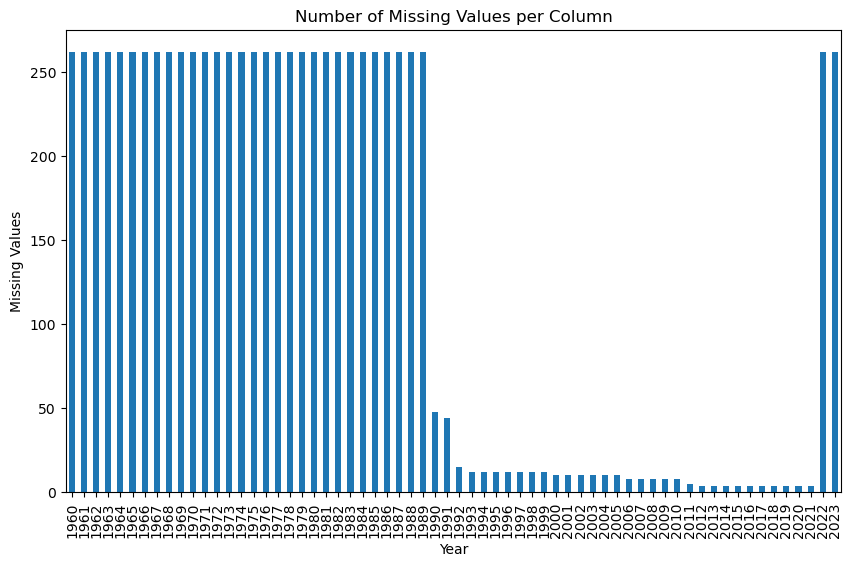

In [253]:
#Columns
# We will use regex to find all columns that represent years (assuming years are 4-digit numbers starting with '19' or '20').
year_columns = [col for col in deforest_data.columns if re.match(r'^\d{4}$', col)]

#Potting the missing values
plt.figure(figsize=(10, 6))  # You can adjust the (width, height) as needed
missing_values = deforest_data[year_columns].isnull().sum()
missing_values.plot(kind='bar', title='Number of Missing Values per Column', xlabel='Year', ylabel='Missing Values')

# Show the plot
plt.show()


In [254]:
all_missing_columns = deforest_data[year_columns].isnull().all()
# Filter out the columns that are entirely missing
columns_with_all_missing = all_missing_columns[all_missing_columns].index.tolist()
# Result: We don't have data for the years: 1960-1989 & 2022,2023

# Drop the columns that have all  
deforest_data = deforest_data.drop(columns_with_all_missing ,axis = 1)

#Converting the years to integers
deforest_data.rename(columns={col: int(col) for col in year_columns}, inplace=True)

#We want the data starting from 2000
columns_from_2000 = [col for col in deforest_data.columns if isinstance(col, int) and col >= 2000]

# Filter the DataFrame to include only the columns from the year 2000 onwards
data_with_desired_years = deforest_data[columns_from_2000]

#Joining the dataframes
final_deforest_data = deforest_data[["Country Name","Country Code"]].join(data_with_desired_years)
final_deforest_data.head()

Country Name Country Code       2000       2001       2002  \
0                        Aruba          ABW   2.333333   2.333333   2.333333   
1  Africa Eastern and Southern          AFE  34.717473  34.537463  34.357452   
2                  Afghanistan          AFG   1.852782   1.852782   1.852782   
3   Africa Western and Central          AFW  21.595284  21.503156  21.411029   
4                       Angola          AGO  62.331443  61.886219  61.440995   

        2003       2004       2005       2006       2007  ...       2012  \
0   2.333333   2.333333   2.333333   2.333333   2.333333  ...   2.333333   
1  34.177441  33.654274  33.475977  33.297802  33.119504  ...  31.890654   
2   1.852782   1.852782   1.852782   1.852782   1.852782  ...   1.852782   
3  21.318902  21.226775  21.134648  21.042520  20.950393  ...  20.498099   
4  60.995770  60.550546  60.105322  59.660098  59.214874  ...  56.988751   

        2013       2014       2015       2016       2017       2018  \
0   2.333333   2.333333   2.333333   2.333333   2.333333   2.333333   
1  31.680635  31.470634  31.260420  31.039682  30.824316  30.611512   
2   1.852782   1.852782   1.852782   1.852782   1.852782   1.852782   
3  20.410143  20.322187  20.234231  20.152610  20.071327  19.986100   
4  56.543526  56.098301  55.653076  55.207845  54.762629  54.317406   

        2019       2020       2021  
0   2.333333   2.333333   2.333333  
1  30.391626  30.174253  29.955194  
2   1.852782   1.852782   1.852782  
3  19.901215  19.816777  19.732037  
4  53.872175  53.426951  52.981722  

[5 rows x 24 columns]

In [255]:
#Preliminary cleaning
final_deforest_data["Country Name"] = final_deforest_data["Country Name"] + " " + final_deforest_data["Country Code"]
final_deforest_data.reset_index(drop = True, inplace = True)

#Dropping some of the columns for clearer structure
df_cleaned = final_deforest_data.drop(columns='Country Code')

# Reshape the data using the melt function to create a long format
df_long = df_cleaned.melt(id_vars=['Country Name'], var_name='Year', value_name='Values')

# Convert 'Year' column to numeric if necessary (remove '.0' from the years)
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')

#Adding the country code
df_long["Country Code"] = df_long["Country Name"].apply(lambda val:val.split(" ")[-1])
df_long["Country Name"] = df_long["Country Name"].apply(lambda val: " ".join(val.split(" ")[:-1]))

#Ordering the columns
df_long = df_long[["Country Name","Country Code","Year","Values"]]

df_long.head()

Country Name Country Code  Year     Values
0                        Aruba          ABW  2000   2.333333
1  Africa Eastern and Southern          AFE  2000  34.717473
2                  Afghanistan          AFG  2000   1.852782
3   Africa Western and Central          AFW  2000  21.595284
4                       Angola          AGO  2000  62.331443

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\3049588538.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]


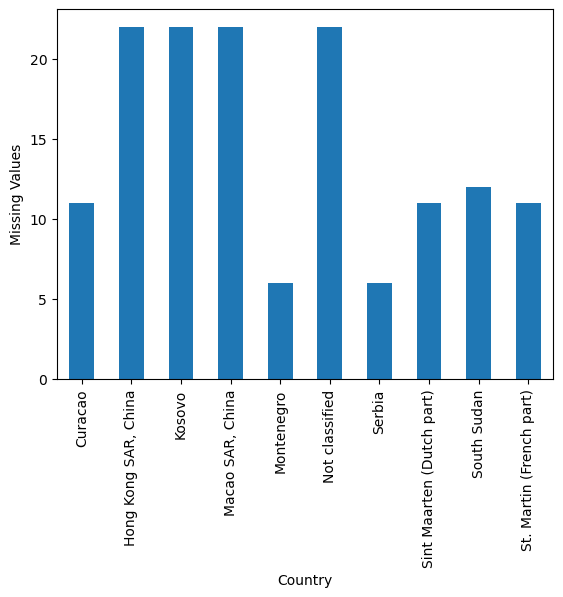

In [259]:
#Number of data points per each country
len_country = len(df_long[df_long["Country Name"] == "Switzerland"])

# Count the number of NaN values for each country
nan_count_per_country = df_long.groupby('Country Name').apply(lambda x: x.isna().sum())["Values"]

# Plot a bar plot of the 'nan_count_per_country' DataFrame
nan_count_per_country[nan_count_per_country > 0].plot(kind = 'bar', xlabel='Country', ylabel='Missing Values')

#These countries can be dropped
countries_dropped = nan_count_per_country[nan_count_per_country > 0].index


In [260]:
country_lst = nan_count_per_country[nan_count_per_country > 0].index.to_list()

#Dropping all the data related to countries above
df_cleaned = df_long[~df_long['Country Name'].isin(country_lst)]
df_cleaned.head()

Country Name Country Code  Year     Values
0                        Aruba          ABW  2000   2.333333
1  Africa Eastern and Southern          AFE  2000  34.717473
2                  Afghanistan          AFG  2000   1.852782
3   Africa Western and Central          AFW  2000  21.595284
4                       Angola          AGO  2000  62.331443

In [263]:
#Data availability per country
data_avl = df_cleaned.groupby("Country Name").count()["Values"].unique()[0] #Data point per country
print(f"Data point per country: {data_avl}")

Data point per country: 22


In [659]:
#without average
df = df_cleaned
df['Def_Rate'] = df.groupby("Country Name")["Values"].transform(lambda x: x.diff().fillna(0)) 
df

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\462766806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Def_Rate'] = df.groupby("Country Name")["Values"].transform(lambda x: x.diff().fillna(0))


Country Name Country Code  Year     Values  Def_Rate
0                           Aruba          ABW  2000   2.333333  0.000000
1     Africa Eastern and Southern          AFE  2000  34.717473  0.000000
2                     Afghanistan          AFG  2000   1.852782  0.000000
3      Africa Western and Central          AFW  2000  21.595284  0.000000
4                          Angola          AGO  2000  62.331443  0.000000
...                           ...          ...   ...        ...       ...
5758                        Samoa          WSM  2021  57.982014 -0.172662
5760                  Yemen, Rep.          YEM  2021   1.039832  0.000000
5761                 South Africa          ZAF  2021  14.025085 -0.030006
5762                       Zambia          ZMB  2021  60.030150 -0.253187
5763                     Zimbabwe          ZWE  2021  44.974822 -0.119090

[5544 rows x 5 columns]

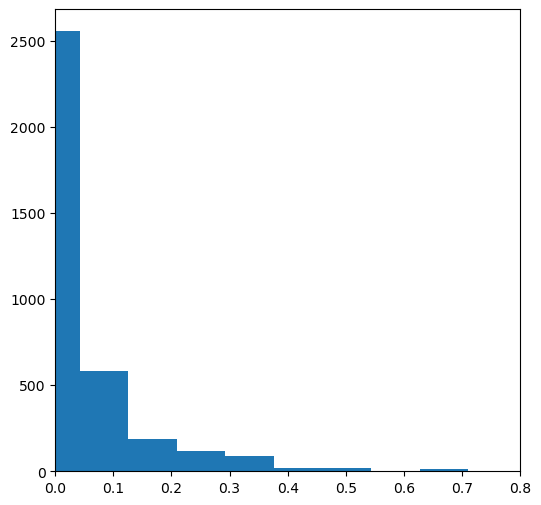

In [660]:
plt.figure(figsize=(6,6))
plt.hist(df['Def_Rate'], bins=200)
plt.xlim(0,0.8)
plt.show()

In [662]:
df_normalized = df #copy of df
df_normalized.tail()

Country Name Country Code  Year     Values  Def_Rate
5758         Samoa          WSM  2021  57.982014 -0.172662
5760   Yemen, Rep.          YEM  2021   1.039832  0.000000
5761  South Africa          ZAF  2021  14.025085 -0.030006
5762        Zambia          ZMB  2021  60.030150 -0.253187
5763      Zimbabwe          ZWE  2021  44.974822 -0.119090

In [663]:
# Function to normalize per country
def normalize_country(group):
    mean_value = group["Def_Rate"].mean()
    std_value = group["Def_Rate"].std()
    group["norm_defrate"] = (group["Def_Rate"] - mean_value) / std_value
    return group

# Apply normalization to each country group
df_normalized = df.groupby("Country Name").apply(normalize_country)

# Check the result
df_normalized.head(23)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1395776191.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_normalized = df.groupby("Country Name").apply(normalize_country)


Country Name Country Code  \
Country Name                                                                 
Afghanistan                 2                     Afghanistan          AFG   
                            264                   Afghanistan          AFG   
                            526                   Afghanistan          AFG   
                            788                   Afghanistan          AFG   
                            1050                  Afghanistan          AFG   
                            1312                  Afghanistan          AFG   
                            1574                  Afghanistan          AFG   
                            1836                  Afghanistan          AFG   
                            2098                  Afghanistan          AFG   
                            2360                  Afghanistan          AFG   
                            2622                  Afghanistan          AFG   
                            2884                  Afghanistan          AFG   
                            3146                  Afghanistan          AFG   
                            3408                  Afghanistan          AFG   
                            3670                  Afghanistan          AFG   
                            3932                  Afghanistan          AFG   
                            4194                  Afghanistan          AFG   
                            4456                  Afghanistan          AFG   
                            4718                  Afghanistan          AFG   
                            4980                  Afghanistan          AFG   
                            5242                  Afghanistan          AFG   
                            5504                  Afghanistan          AFG   
Africa Eastern and Southern 1     Africa Eastern and Southern          AFE   

                                  Year     Values  Def_Rate  norm_defrate  
Country Name                                                               
Afghanistan                 2     2000   1.852782       0.0           NaN  
                            264   2001   1.852782       0.0           NaN  
                            526   2002   1.852782       0.0           NaN  
                            788   2003   1.852782       0.0           NaN  
                            1050  2004   1.852782       0.0           NaN  
                            1312  2005   1.852782       0.0           NaN  
                            1574  2006   1.852782       0.0           NaN  
                            1836  2007   1.852782       0.0           NaN  
                            2098  2008   1.852782       0.0           NaN  
                            2360  2009   1.852782       0.0           NaN  
                            2622  2010   1.852782       0.0           NaN  
                            2884  2011   1.852782       0.0           NaN  
                            3146  2012   1.852782       0.0           NaN  
                            3408  2013   1.852782       0.0           NaN  
                            3670  2014   1.852782       0.0           NaN  
                            3932  2015   1.852782       0.0           NaN  
                            4194  2016   1.852782       0.0           NaN  
                            4456  2017   1.852782       0.0           NaN  
                            4718  2018   1.852782       0.0           NaN  
                            4980  2019   1.852782       0.0           NaN  
                            5242  2020   1.852782       0.0           NaN  
                            5504  2021   1.852782       0.0           NaN  
Africa Eastern and Southern 1     2000  34.717473       0.0      2.098787

In [664]:
df_normalized["Country Name"].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Earl

In [773]:
# Filter the DataFrame for countrytoplot
def plot_hist_country(dataframe, column, country):
    countrytoplot = country
    country_data = dataframe[dataframe["Country Name"] == countrytoplot]

    # Plot the histogram for country's normalized observations
    plt.figure(figsize=(8, 6))
    sns.histplot(country_data[column], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of Normalized Observations for {countrytoplot}')
    plt.xlabel('Normalized Observation')
    #plt.xlim(-4,4)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

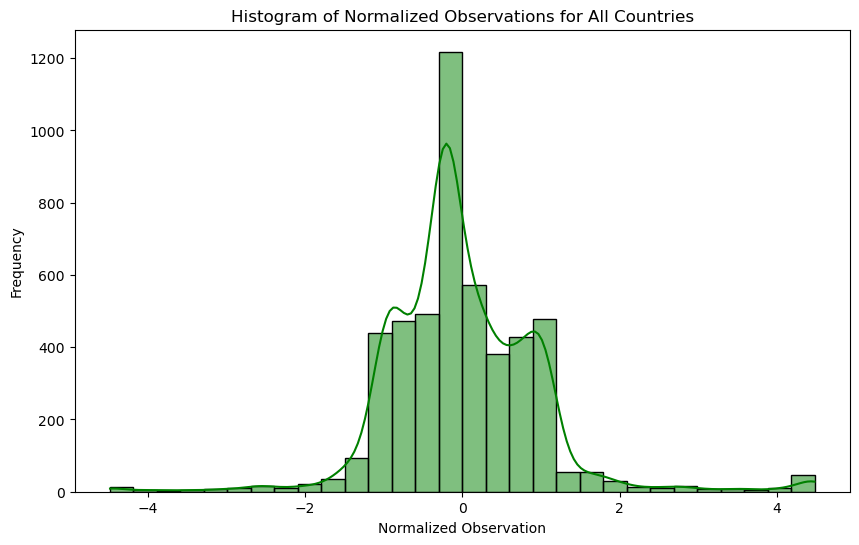

In [666]:
plt.figure(figsize=(10, 6))
sns.histplot(df_normalized["norm_defrate"], bins=30, kde=True, color='green')
plt.title('Histogram of Normalized Observations for All Countries')
plt.xlabel('Normalized Observation')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [667]:
print(df_normalized['Def_Rate'].skew(), df_normalized['norm_defrate'].skew())

-12.746854085189748 0.7561422169439118


df['Log_Def_Rate'] = np.log(df['Def_Rate']+ 1e-6)
df

In [669]:
df_normalized.shape

(5544, 6)

In [670]:
df_normalized

Country Name Country Code  Year     Values  Def_Rate  \
Country Name                                                             
Afghanistan  2     Afghanistan          AFG  2000   1.852782   0.00000   
             264   Afghanistan          AFG  2001   1.852782   0.00000   
             526   Afghanistan          AFG  2002   1.852782   0.00000   
             788   Afghanistan          AFG  2003   1.852782   0.00000   
             1050  Afghanistan          AFG  2004   1.852782   0.00000   
...                        ...          ...   ...        ...       ...   
Zimbabwe     4715     Zimbabwe          ZWE  2017  45.451183  -0.11909   
             4977     Zimbabwe          ZWE  2018  45.332093  -0.11909   
             5239     Zimbabwe          ZWE  2019  45.213002  -0.11909   
             5501     Zimbabwe          ZWE  2020  45.093912  -0.11909   
             5763     Zimbabwe          ZWE  2021  44.974822  -0.11909   

                   norm_defrate  
Country Name                     
Afghanistan  2              NaN  
             264            NaN  
             526            NaN  
             788            NaN  
             1050           NaN  
...                         ...  
Zimbabwe     4715     -0.213201  
             4977     -0.213201  
             5239     -0.213201  
             5501     -0.213201  
             5763     -0.213201  

[5544 rows x 6 columns]

In [672]:
#Just taking the absolute regular difference val[i]-val[i-1] as the data is provided in percentage
deforestation_rate = df_cleaned.groupby("Country Name")["Values"].apply(lambda x: x.diff().fillna(0))
rate_df = pd.DataFrame(deforestation_rate)
rate_df.shape

(5544, 1)

In [674]:
#comparing both df to merge df_rate i-1 i and normalized values
rate_df

Values
Country Name              
Afghanistan  2     0.00000
             264   0.00000
             526   0.00000
             788   0.00000
             1050  0.00000
...                    ...
Zimbabwe     4715 -0.11909
             4977 -0.11909
             5239 -0.11909
             5501 -0.11909
             5763 -0.11909

[5544 rows x 1 columns]

In [675]:
#df['Log_Def_Rate'].skew()

In [678]:
print(df_normalized['Def_Rate'].skew(), df_normalized['norm_defrate'].skew())

-12.746854085189748 0.7561422169439118


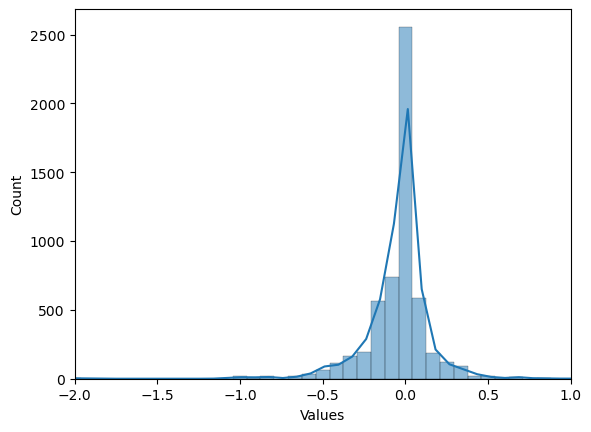

In [679]:
plt.figure()
sns.histplot(rate_df['Values'], bins=200, kde=True)
plt.xlim(-2,1)
plt.show()

In [681]:
#check that only the first years have null values
nan_count_by_country = rate_df.groupby("Country Name")["Values"].apply(lambda x: x.isna().sum())
nan_count_by_country.sum()

0

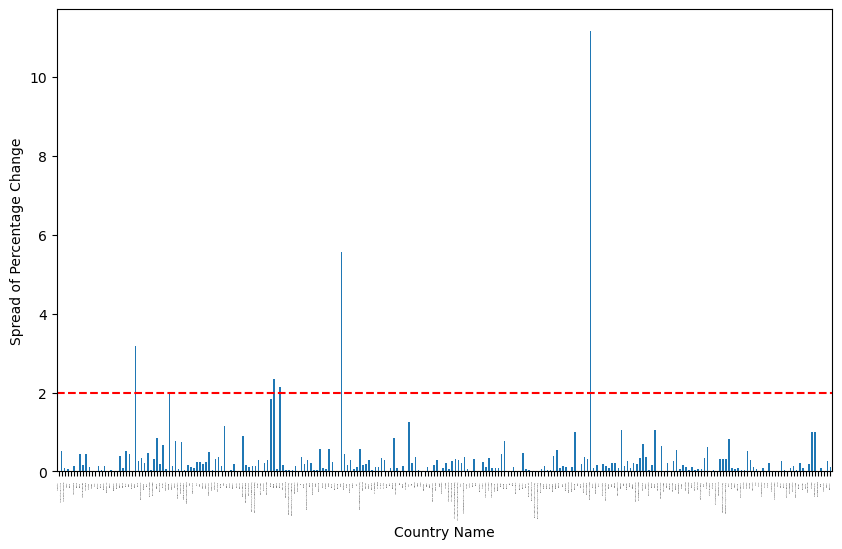

In [682]:
#Outlier analysis
#Calcualte the spread of deforestation rate for countries (max  - min)
spread_df = rate_df.groupby("Country Name")["Values"].agg(lambda x: x.max() - x.min())
#Therefore it is reasonable to take the average per country


plt.figure(figsize=(10, 6))
spread_df.plot(kind = "bar")
plt.xticks(fontsize=0.4)  # Set the font size as desired (e.g., 6)
plt.ylabel('Spread of Percentage Change')
plt.axhline(y=2, color='red', linestyle='--')
plt.show()


In [683]:
#spread_df[spread_df>2] #The difference between maximum percentage change and minimum percentage is larger than %2
#countries_with_large_spread = (spread_df[spread_df>2]).index.to_list()
#df_filtered = rate_df[~rate_df['Country Name'].isin(countries_with_large_spread)]#Removing those countries
#print(spread_df[spread_df>2])

In [687]:
print(rate_df['Values'].skew())

-12.746854085189748


In [689]:
#df_cleaned[df_cleaned["Country Name"] == "Northern Mariana Islands"] #Just tot look at the forest rate coverage 

In [693]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

average_deforestation = rate_df.groupby("Country Name")["Values"].mean().reset_index()  #Taking the average
#Now this becomes the average percentage change at the last 20 years (For example: For Albania the average deforestation rate is 0.035%)
average_deforestation

In [696]:
# Add ISO-3 codes to the DataFrame
#_deforestation['iso3'] = average_deforestation['Country Name'].apply(get_iso3)

In [697]:
df_normalized['iso3'] = df_normalized['Country Name'].apply(get_iso3)
df_normalized

Country Name Country Code  Year     Values  Def_Rate  \
Country Name                                                             
Afghanistan  2     Afghanistan          AFG  2000   1.852782   0.00000   
             264   Afghanistan          AFG  2001   1.852782   0.00000   
             526   Afghanistan          AFG  2002   1.852782   0.00000   
             788   Afghanistan          AFG  2003   1.852782   0.00000   
             1050  Afghanistan          AFG  2004   1.852782   0.00000   
...                        ...          ...   ...        ...       ...   
Zimbabwe     4715     Zimbabwe          ZWE  2017  45.451183  -0.11909   
             4977     Zimbabwe          ZWE  2018  45.332093  -0.11909   
             5239     Zimbabwe          ZWE  2019  45.213002  -0.11909   
             5501     Zimbabwe          ZWE  2020  45.093912  -0.11909   
             5763     Zimbabwe          ZWE  2021  44.974822  -0.11909   

                   norm_defrate iso3  
Country Name                          
Afghanistan  2              NaN  AFG  
             264            NaN  AFG  
             526            NaN  AFG  
             788            NaN  AFG  
             1050           NaN  AFG  
...                         ...  ...  
Zimbabwe     4715     -0.213201  ZWE  
             4977     -0.213201  ZWE  
             5239     -0.213201  ZWE  
             5501     -0.213201  ZWE  
             5763     -0.213201  ZWE  

[5544 rows x 7 columns]

In [699]:
#average_deforestation[average_deforestation['iso3'].isnull()]
df_normalized[df_normalized['iso3'].isnull()]

Country Name Country Code  \
Country Name                                                                 
Africa Eastern and Southern 1     Africa Eastern and Southern          AFE   
                            263   Africa Eastern and Southern          AFE   
                            525   Africa Eastern and Southern          AFE   
                            787   Africa Eastern and Southern          AFE   
                            1049  Africa Eastern and Southern          AFE   
...                                                       ...          ...   
Yemen, Rep.                 4712                  Yemen, Rep.          YEM   
                            4974                  Yemen, Rep.          YEM   
                            5236                  Yemen, Rep.          YEM   
                            5498                  Yemen, Rep.          YEM   
                            5760                  Yemen, Rep.          YEM   

                                  Year     Values  Def_Rate  norm_defrate  \
Country Name                                                                
Africa Eastern and Southern 1     2000  34.717473  0.000000      2.098787   
                            263   2001  34.537463 -0.180011      0.353470   
                            525   2002  34.357452 -0.180011      0.353470   
                            787   2003  34.177441 -0.180011      0.353470   
                            1049  2004  33.654274 -0.523168     -2.973655   
...                                ...        ...       ...           ...   
Yemen, Rep.                 4712  2017   1.039832  0.000000           NaN   
                            4974  2018   1.039832  0.000000           NaN   
                            5236  2019   1.039832  0.000000           NaN   
                            5498  2020   1.039832  0.000000           NaN   
                            5760  2021   1.039832  0.000000           NaN   

                                  iso3  
Country Name                            
Africa Eastern and Southern 1     None  
                            263   None  
                            525   None  
                            787   None  
                            1049  None  
...                                ...  
Yemen, Rep.                 4712  None  
                            4974  None  
                            5236  None  
                            5498  None  
                            5760  None  

[1496 rows x 7 columns]

In [701]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping = {
    'United Republic of Tanzania': 'Tanzania',
    'United States of America': 'United States',
    'Venezuela, RB': 'Venezuela',
    'Bahamas, The': 'Bahamas',
    'Congo, Dem. Rep.':'Congo, The Democratic Republic of the',
    'Congo, Rep.': 'Congo',
    'Turkiye': 'Türkiye',
    "Cote d'Ivoire":"Côte d'Ivoire",
    'St. Lucia':'Saint Lucia',
    "Korea, Dem. People's Rep." : "Korea, Democratic People's Republic of",
    'Korea, Rep.': 'Korea, Republic of',
    'Lao PDR':"Lao People's Democratic Republic",
    'Gambia, The': 'Gambia',
    'Egypt, Arab Rep.': 'Egypt',
    'Iran, Islamic Rep.': 'Iran, Islamic Republic of',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
    'Micronesia, Fed. Sts.': 'Micronesia, Federated States of',
    'Virgin Islands (U.S.)':'Virgin Islands, U.S.',
    'Yemen, Rep.':'Yemen',
    'Macao SAR, China': 'Macao',
    'St. Martin (French part)':'Saint Martin (French part)',
    'Curacao':'Curaçao',
    # You can add more mappings if necessary
}
df_normalized['Country Name'] = df_normalized['Country Name'].replace(country_mapping)

In [702]:
# Lookup the country by ISO3 code
country = pycountry.countries.get(alpha_3='VIR')

# Display the country name
country.name

'Virgin Islands, U.S.'

In [703]:
country_not_country = [
    'Africa Eastern and Southern', 
    'Africa Western and Central',
    'Central Europe and the Baltics',
    'Upper middle income',
    'East Asia & Pacific (IDA & IBRD countries)',
    'East Asia & Pacific',
    'East Asia & Pacific (excluding high income)',
    'Euro area',
    'Europe & Central Asia',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Europe & Central Asia (excluding high income)',
    'European Union',
    'Fragile and conflict affected situations',
    'Heavily indebted poor countries (HIPC)',
    'Early-demographic dividend',
    'High income',
    'IBRD only',
    'IDA & IBRD total',
    'IDA blend',
    'IDA only',
    'IDA total',
    'Late-demographic dividend',
    'Latin America & Caribbean',
    'Latin America & Caribbean (excluding high income)',
    'Least developed countries: UN classification',
    'Low & middle income',
    'Lower middle income',
    'Middle East & North Africa',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle income',
    'Low income',
    'North America',
    'OECD members',
    'Other small states',
    'Pacific island small states',
    'Post-demographic dividend',
    'Small states',
    'South Asia',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Sub-Saharan Africa (excluding high income)',
    'Pre-demographic dividend',
    'South Asia (IDA & IBRD)',
    'Sub-Saharan Africa',
    'West Bank and Gaza',
    'Caribbean small states',
    'Channel Islands',
    'Arab World',
    'Middle East & North Africa (excluding high income)',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'Eastern and Southern Africa',
    'Western and Central Africa',
    'Not classified',
    'World'
]

df_normalized = df_normalized[~df_normalized['Country Name'].isin(country_not_country)]

In [704]:
df_normalized['iso3'] = df_normalized['Country Name'].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1256897723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['iso3'] = df_normalized['Country Name'].apply(get_iso3)


In [705]:
df_normalized[df_normalized['iso3'].isnull()]

Empty DataFrame
Columns: [Country Name, Country Code, Year, Values, Def_Rate, norm_defrate, iso3]
Index: []

In [710]:
df_normalized

Country Name Country Code  Year     Values  Def_Rate  \
Country Name                                                             
Afghanistan  2     Afghanistan          AFG  2000   1.852782   0.00000   
             264   Afghanistan          AFG  2001   1.852782   0.00000   
             526   Afghanistan          AFG  2002   1.852782   0.00000   
             788   Afghanistan          AFG  2003   1.852782   0.00000   
             1050  Afghanistan          AFG  2004   1.852782   0.00000   
...                        ...          ...   ...        ...       ...   
Zimbabwe     4715     Zimbabwe          ZWE  2017  45.451183  -0.11909   
             4977     Zimbabwe          ZWE  2018  45.332093  -0.11909   
             5239     Zimbabwe          ZWE  2019  45.213002  -0.11909   
             5501     Zimbabwe          ZWE  2020  45.093912  -0.11909   
             5763     Zimbabwe          ZWE  2021  44.974822  -0.11909   

                   norm_defrate iso3  
Country Name                          
Afghanistan  2              NaN  AFG  
             264            NaN  AFG  
             526            NaN  AFG  
             788            NaN  AFG  
             1050           NaN  AFG  
...                         ...  ...  
Zimbabwe     4715     -0.213201  ZWE  
             4977     -0.213201  ZWE  
             5239     -0.213201  ZWE  
             5501     -0.213201  ZWE  
             5763     -0.213201  ZWE  

[4444 rows x 7 columns]

In [711]:
df_normalized = df_normalized.dropna()
df_normalized

Country Name Country Code  Year     Values  Def_Rate  \
Country Name                                                             
Albania      5         Albania          ALB  2000  28.076642  0.000000   
             267       Albania          ALB  2001  28.123248  0.046606   
             529       Albania          ALB  2002  28.169854  0.046606   
             791       Albania          ALB  2003  28.216460  0.046606   
             1053      Albania          ALB  2004  28.263066  0.046606   
...                        ...          ...   ...        ...       ...   
Zimbabwe     4715     Zimbabwe          ZWE  2017  45.451183 -0.119090   
             4977     Zimbabwe          ZWE  2018  45.332093 -0.119090   
             5239     Zimbabwe          ZWE  2019  45.213002 -0.119090   
             5501     Zimbabwe          ZWE  2020  45.093912 -0.119090   
             5763     Zimbabwe          ZWE  2021  44.974822 -0.119090   

                   norm_defrate iso3  
Country Name                          
Albania      5        -1.356799  ALB  
             267       0.587992  ALB  
             529       0.587992  ALB  
             791       0.587992  ALB  
             1053      0.587992  ALB  
...                         ...  ...  
Zimbabwe     4715     -0.213201  ZWE  
             4977     -0.213201  ZWE  
             5239     -0.213201  ZWE  
             5501     -0.213201  ZWE  
             5763     -0.213201  ZWE  

[3850 rows x 7 columns]

In [714]:
df_normalized.reset_index(drop=True, inplace=True)
df_normalized

Country Name Country Code  Year     Values  Def_Rate  norm_defrate iso3
0         Albania          ALB  2000  28.076642  0.000000     -1.356799  ALB
1         Albania          ALB  2001  28.123248  0.046606      0.587992  ALB
2         Albania          ALB  2002  28.169854  0.046606      0.587992  ALB
3         Albania          ALB  2003  28.216460  0.046606      0.587992  ALB
4         Albania          ALB  2004  28.263066  0.046606      0.587992  ALB
...           ...          ...   ...        ...       ...           ...  ...
3845     Zimbabwe          ZWE  2017  45.451183 -0.119090     -0.213201  ZWE
3846     Zimbabwe          ZWE  2018  45.332093 -0.119090     -0.213201  ZWE
3847     Zimbabwe          ZWE  2019  45.213002 -0.119090     -0.213201  ZWE
3848     Zimbabwe          ZWE  2020  45.093912 -0.119090     -0.213201  ZWE
3849     Zimbabwe          ZWE  2021  44.974822 -0.119090     -0.213201  ZWE

[3850 rows x 7 columns]

In [725]:
df_normalized.drop('Country Code', axis=1, inplace=True)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\501490864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized.drop('Country Code', axis=1, inplace=True)


In [727]:
df_normalized

Country Name  Year     Values  Def_Rate  norm_defrate iso3
0         Albania  2000  28.076642  0.000000     -1.356799  ALB
1         Albania  2001  28.123248  0.046606      0.587992  ALB
2         Albania  2002  28.169854  0.046606      0.587992  ALB
3         Albania  2003  28.216460  0.046606      0.587992  ALB
4         Albania  2004  28.263066  0.046606      0.587992  ALB
...           ...   ...        ...       ...           ...  ...
3845     Zimbabwe  2017  45.451183 -0.119090     -0.213201  ZWE
3846     Zimbabwe  2018  45.332093 -0.119090     -0.213201  ZWE
3847     Zimbabwe  2019  45.213002 -0.119090     -0.213201  ZWE
3848     Zimbabwe  2020  45.093912 -0.119090     -0.213201  ZWE
3849     Zimbabwe  2021  44.974822 -0.119090     -0.213201  ZWE

[3850 rows x 6 columns]

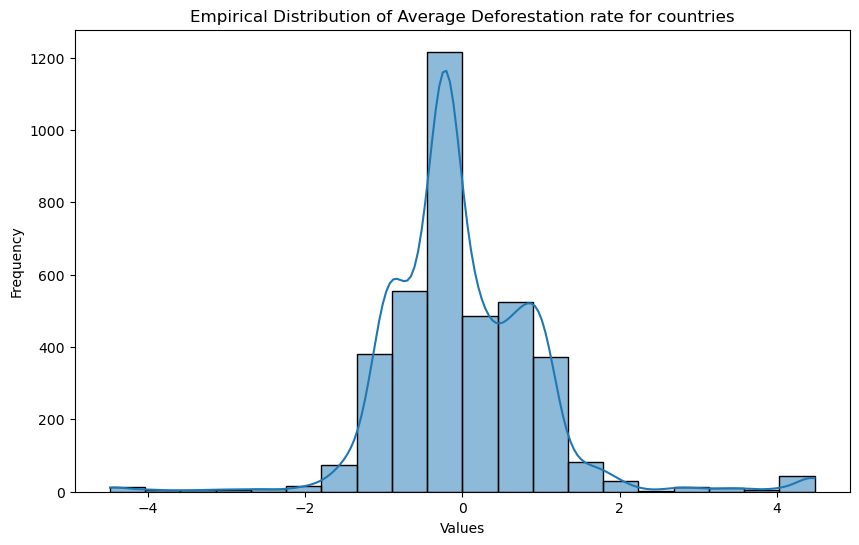

In [735]:
plt.figure(figsize=(10,6))
sns.histplot(df_normalized['norm_defrate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Deforestation rate for countries')

# Show the plot
plt.show()

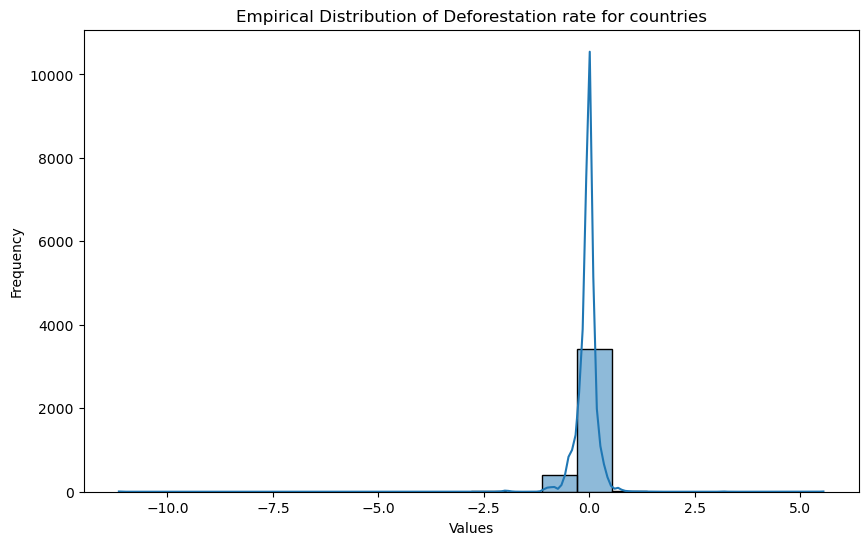

In [1250]:
plt.figure(figsize=(10,6))
sns.histplot(df_normalized['Def_Rate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Deforestation rate for countries')

# Show the plot
plt.show()

In [739]:
print(df_normalized['norm_defrate'].skew(), df_normalized['Def_Rate'].skew())

0.8818256616485379 -11.138827193188803


df['iso3'] = df['Country Name'].apply(get_iso3)
df

df[df['iso3'].isnull()]

df['Country Name'] = df['Country Name'].replace(country_mapping)
df = df[~df['Country Name'].isin(country_not_country)]
df['iso3'] = df['Country Name'].apply(get_iso3)
df[df['iso3'].isnull()]

df

In [745]:
zero_def_rate_count = df_normalized[df_normalized['Def_Rate'] == 0].groupby('Country Name').size()
zero_def_rate_count = zero_def_rate_count[zero_def_rate_count>10]
zero_def_rate_count

Country Name
Brunei Darussalam       12
Burundi                 17
Djibouti                17
Faroe Islands           20
French Polynesia        12
Georgia                 12
Greece                  11
Guam                    16
Iraq                    11
Jordan                  20
Kuwait                  12
Luxembourg              12
Malta                   19
Nepal                   12
Oman                    17
Saint Lucia             12
Tajikistan              14
United Arab Emirates    12
dtype: int64

In [747]:
df_normalized[df_normalized['Country Name'] == 'Oman']

Country Name  Year    Values  Def_Rate  norm_defrate iso3
2706         Oman  2000  0.009693  0.000000      0.482507  OMN
2707         Oman  2001  0.009693  0.000000      0.482507  OMN
2708         Oman  2002  0.009693  0.000000      0.482507  OMN
2709         Oman  2003  0.009693  0.000000      0.482507  OMN
2710         Oman  2004  0.009693  0.000000      0.482507  OMN
2711         Oman  2005  0.009693  0.000000      0.482507  OMN
2712         Oman  2006  0.009693  0.000000      0.482507  OMN
2713         Oman  2007  0.009693  0.000000      0.482507  OMN
2714         Oman  2008  0.009693  0.000000      0.482507  OMN
2715         Oman  2009  0.009693  0.000000      0.482507  OMN
2716         Oman  2010  0.009693  0.000000      0.482507  OMN
2717         Oman  2011  0.009693  0.000000      0.482507  OMN
2718         Oman  2012  0.009693  0.000000      0.482507  OMN
2719         Oman  2013  0.009693  0.000000      0.482507  OMN
2720         Oman  2014  0.009693  0.000000      0.482507  OMN
2721         Oman  2015  0.009693  0.000000      0.482507  OMN
2722         Oman  2016  0.009047 -0.000646     -3.263798  OMN
2723         Oman  2017  0.008724 -0.000323     -1.390646  OMN
2724         Oman  2018  0.008401 -0.000323     -1.390646  OMN
2725         Oman  2019  0.008078 -0.000323     -1.390646  OMN
2726         Oman  2020  0.008078  0.000000      0.482507  OMN
2727         Oman  2021  0.007862 -0.000216     -0.766886  OMN

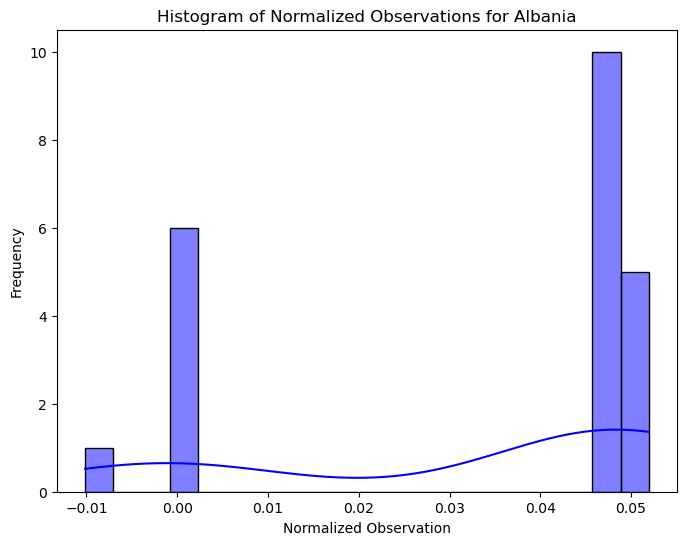

In [1254]:
plot_hist_country(df_normalized, 'Def_Rate', 'Albania')

In [781]:
df_normalized

Country Name  Year     Values  Def_Rate  norm_defrate iso3
0         Albania  2000  28.076642  0.000000     -1.356799  ALB
1         Albania  2001  28.123248  0.046606      0.587992  ALB
2         Albania  2002  28.169854  0.046606      0.587992  ALB
3         Albania  2003  28.216460  0.046606      0.587992  ALB
4         Albania  2004  28.263066  0.046606      0.587992  ALB
...           ...   ...        ...       ...           ...  ...
3845     Zimbabwe  2017  45.451183 -0.119090     -0.213201  ZWE
3846     Zimbabwe  2018  45.332093 -0.119090     -0.213201  ZWE
3847     Zimbabwe  2019  45.213002 -0.119090     -0.213201  ZWE
3848     Zimbabwe  2020  45.093912 -0.119090     -0.213201  ZWE
3849     Zimbabwe  2021  44.974822 -0.119090     -0.213201  ZWE

[3850 rows x 6 columns]

In [779]:
# Step 1: Extract the list of countries from the index of zero_def_rate_count
countries_to_drop = zero_def_rate_count.index

# Step 2: Filter out these countries from the original DataFrame
df_cln = df_normalized[~df_normalized['Country Name'].isin(countries_to_drop)]
df_cln

Country Name  Year     Values  Def_Rate  norm_defrate iso3
0         Albania  2000  28.076642  0.000000     -1.356799  ALB
1         Albania  2001  28.123248  0.046606      0.587992  ALB
2         Albania  2002  28.169854  0.046606      0.587992  ALB
3         Albania  2003  28.216460  0.046606      0.587992  ALB
4         Albania  2004  28.263066  0.046606      0.587992  ALB
...           ...   ...        ...       ...           ...  ...
3845     Zimbabwe  2017  45.451183 -0.119090     -0.213201  ZWE
3846     Zimbabwe  2018  45.332093 -0.119090     -0.213201  ZWE
3847     Zimbabwe  2019  45.213002 -0.119090     -0.213201  ZWE
3848     Zimbabwe  2020  45.093912 -0.119090     -0.213201  ZWE
3849     Zimbabwe  2021  44.974822 -0.119090     -0.213201  ZWE

[3454 rows x 6 columns]

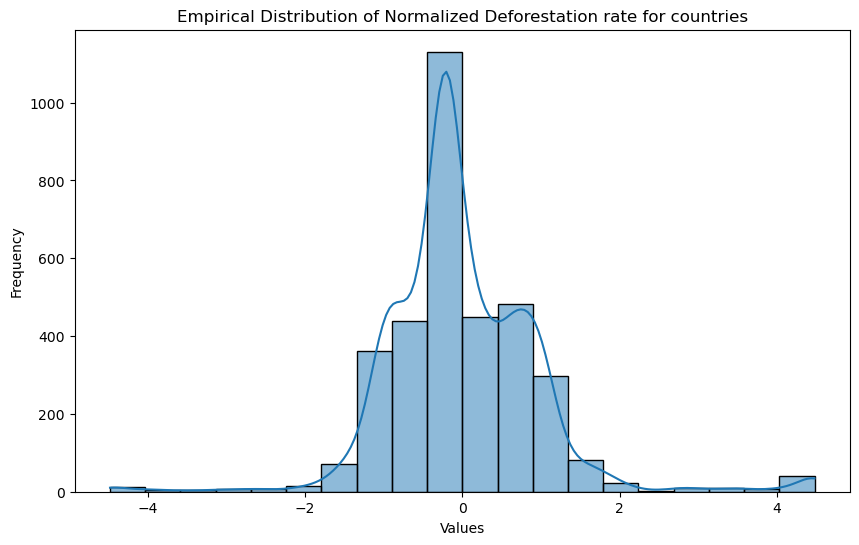

In [801]:
plt.figure(figsize=(10,6))
sns.histplot(df_cln['norm_defrate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Normalized Deforestation rate for countries')

# Show the plot
plt.show()

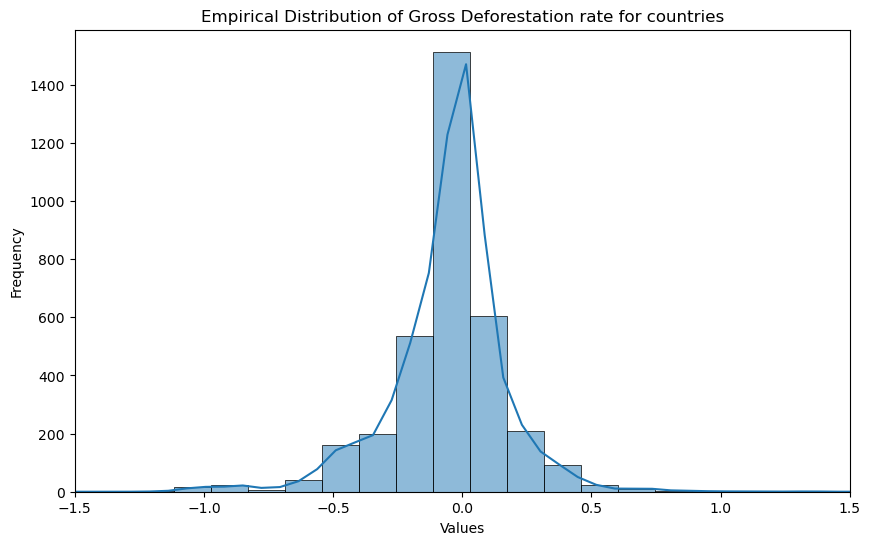

In [803]:
plt.figure(figsize=(10,6))
sns.histplot(df_cln['Def_Rate'], bins=100, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(-1.5,1.5)
plt.title('Empirical Distribution of Gross Deforestation rate for countries')

# Show the plot
plt.show()

In [805]:
#df['Log_Def_Rate'].skew()

In [821]:
print(df_cln['Year'].min(),df_cln['Year'].max())

2000 2021


In [807]:
print(df_cln['norm_defrate'].skew(), df_cln['Def_Rate'].skew())

0.8893063509263682 -14.199371549202521


In [809]:
df_cln['Def_Rate'].min()

-11.15217391304347

### **Research Question**: What is the effect of agricultural land expansion rate of corn fields on deforestation rate of countries by controlling for land size of countries?     

In [811]:
corn_field_data = pd.read_csv('./Data/FAOSTAT_data_en_10-2-2024.csv')
corn_field_data.head()

Domain Code                        Domain  Area Code (M49)         Area  \
0         QCL  Crops and livestock products                4  Afghanistan   
1         QCL  Crops and livestock products                4  Afghanistan   
2         QCL  Crops and livestock products                4  Afghanistan   
3         QCL  Crops and livestock products                4  Afghanistan   
4         QCL  Crops and livestock products                4  Afghanistan   

   Element Code         Element  Item Code (CPC)          Item  Year Code  \
0          5312  Area harvested              112  Maize (corn)       1961   
1          5312  Area harvested              112  Maize (corn)       1962   
2          5312  Area harvested              112  Maize (corn)       1963   
3          5312  Area harvested              112  Maize (corn)       1964   
4          5312  Area harvested              112  Maize (corn)       1965   

   Year Unit   Value Flag Flag Description Note  
0  1961   ha  500000    A  Official figure  NaN  
1  1962   ha  500000    A  Official figure  NaN  
2  1963   ha  500000    A  Official figure  NaN  
3  1964   ha  505000    A  Official figure  NaN  
4  1965   ha  500000    A  Official figure  NaN

In [819]:
#Filtering the data between 2000 and 2021
corn_field_data = corn_field_data[(corn_field_data['Year'] >= 2000) & (corn_field_data['Year'] <= 2021)]
corn_field_data.head()

Domain Code                        Domain  Area Code (M49)         Area  \
39         QCL  Crops and livestock products                4  Afghanistan   
40         QCL  Crops and livestock products                4  Afghanistan   
41         QCL  Crops and livestock products                4  Afghanistan   
42         QCL  Crops and livestock products                4  Afghanistan   
43         QCL  Crops and livestock products                4  Afghanistan   

    Element Code         Element  Item Code (CPC)          Item  Year Code  \
39          5312  Area harvested              112  Maize (corn)       2000   
40          5312  Area harvested              112  Maize (corn)       2001   
41          5312  Area harvested              112  Maize (corn)       2002   
42          5312  Area harvested              112  Maize (corn)       2003   
43          5312  Area harvested              112  Maize (corn)       2004   

    Year Unit   Value Flag Flag Description Note  
39  2000   ha   96000    A  Official figure  NaN  
40  2001   ha   80000    A  Official figure  NaN  
41  2002   ha  100000    A  Official figure  NaN  
42  2003   ha  250000    A  Official figure  NaN  
43  2004   ha  250000    A  Official figure  NaN

In [823]:
#Shape of the data
corn_field_data.shape

(3669, 15)

In [825]:
df_cln.shape

(3454, 6)

In [827]:
corn_field_data["Note"].unique()

array([nan, 'Unofficial figure'], dtype=object)

In [829]:
corn_field_data["Flag Description"].unique()

array(['Official figure', 'Estimated value', 'Imputed value',
       'Figure from international organizations',
       'Missing value (data cannot exist, not applicable)'], dtype=object)

In [831]:
corn_field_data = corn_field_data[(corn_field_data["Flag Description"] == "Official figure") & (corn_field_data["Note"] != "Unofficial figure")]

In [833]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the corn field dataset: ",len(corn_field_data["Area"].unique()))

Number of countries in the corn field dataset:  162


In [837]:
#Unique country amount: Does the number of countires in this data match with deforestation data?
print("Number of countries in the deforestation dataset: ",len(df_cln["Country Name"].unique()))

Number of countries in the deforestation dataset:  157


In [839]:
#not the average dataset
df_corn = corn_field_data
df_corn = df_corn[["Area","Value","Year"]]
df_corn

Area    Value  Year
39    Afghanistan    96000  2000
40    Afghanistan    80000  2001
41    Afghanistan   100000  2002
42    Afghanistan   250000  2003
43    Afghanistan   250000  2004
...           ...      ...   ...
9543     Zimbabwe  1099945  2017
9544     Zimbabwe  1155075  2018
9545     Zimbabwe   991354  2019
9546     Zimbabwe  1018884  2020
9547     Zimbabwe   957793  2021

[2892 rows x 3 columns]

In [841]:
#The two columns are the same
print(len(corn_field_data["Year Code"] == corn_field_data["Year"]) == len(corn_field_data))
print(corn_field_data["Domain"].unique()[0])
print(corn_field_data["Element"].unique()[0])
print(corn_field_data["Item"].unique()[0])

corn_field_data = corn_field_data[["Area","Value"]] #extracting the necessary columns
corn_field_data.head(30)

True
Crops and livestock products
Area harvested
Maize (corn)


Area   Value
39   Afghanistan   96000
40   Afghanistan   80000
41   Afghanistan  100000
42   Afghanistan  250000
43   Afghanistan  250000
44   Afghanistan  261000
45   Afghanistan  137000
46   Afghanistan  137000
47   Afghanistan  137000
48   Afghanistan  140000
49   Afghanistan  183000
50   Afghanistan  183000
51   Afghanistan  141000
52   Afghanistan  142000
53   Afghanistan  127000
54   Afghanistan  147273
55   Afghanistan  151900
56   Afghanistan  134225
57   Afghanistan   72433
58   Afghanistan   94910
59   Afghanistan  140498
60   Afghanistan  139080
101      Albania   53000
102      Albania   52000
103      Albania   50000
104      Albania   48336
105      Albania   46800
106      Albania   48391
107      Albania   48971
108      Albania   46200

In [843]:
areas_to_exclude = corn_field_data[corn_field_data["Value"] == 0]["Area"].unique() #These countries include 0 values
#Exclude these countries completely
corn_field_data = corn_field_data[~corn_field_data['Area'].isin(areas_to_exclude)]
corn_field_data.head()

Area   Value
39  Afghanistan   96000
40  Afghanistan   80000
41  Afghanistan  100000
42  Afghanistan  250000
43  Afghanistan  250000

In [845]:
corn_field_data.dtypes #No need to convert the year column

Area     object
Value     int64
dtype: object

In [847]:
#Missing values
corn_field_data.isna().sum()

Area     0
Value    0
dtype: int64

In [857]:
#Calculating the corn field expansion rate
corn_field_exp_rt= corn_field_data.groupby("Area")["Value"].apply(lambda x: (x.pct_change()*100).fillna(0))
corn_field_exp_rt_df = pd.DataFrame(corn_field_exp_rt).reset_index().drop("level_1", axis = 1)

#Dropping na values due to percentange change calculation
corn_field_exp_rt_df = corn_field_exp_rt_df.dropna()
corn_field_exp_rt_df.rename(columns={'Value':'CornExp_rate'}, inplace=True)
corn_field_exp_rt_df

Area  CornExp_rate
0     Afghanistan      0.000000
1     Afghanistan    -16.666667
2     Afghanistan     25.000000
3     Afghanistan    150.000000
4     Afghanistan      0.000000
...           ...           ...
2870     Zimbabwe     -5.340117
2871     Zimbabwe      5.012069
2872     Zimbabwe    -14.174058
2873     Zimbabwe      2.777010
2874     Zimbabwe     -5.995874

[2875 rows x 2 columns]

In [859]:
value_counts_per_area = corn_field_exp_rt_df.groupby("Area")["CornExp_rate"].count()

# Filter to get only the areas where the count is not equal to 22
areas_not_equal_to_22 = value_counts_per_area[value_counts_per_area != 22].index
areas_not_equal_to_22

Index(['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       'Côte d'Ivoire', 'Democratic People's Republic of Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Eritrea', 'Eswatini',
       'Fiji', 'French Guiana', 'Gambia', 'Ghana', 'Guatemala',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran (Islamic Republic of)', 'Iraq', 'Israel', 'Japan', 'Kuwait',
       'Lebanon', 'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malaysia',
       'Maldives', 'Mauritania', 'Montenegro', 'Mozambique', 'Namibia',
       'New Caledonia', 'Nigeria', 'Oman', 'Papua New Guinea', 'Puerto Rico',
       'Rwanda', 'Saint Vincent and the Grenadines', 'Saudi Arabia', 'Serbia',
       'Serbia and Montenegro', 'Sierra Leone', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Sudan (former)', 'Sweden', 'Tajikistan', 'Thailand',
 

In [861]:
corn_field_exp_rt_df = corn_field_exp_rt_df[~corn_field_exp_rt_df["Area"].isin(areas_not_equal_to_22)]

In [863]:
df_corn = df_corn[~df_corn['Area'].isin(areas_to_exclude)]
df_corn.isna().sum() #check missing values 

Area     0
Value    0
Year     0
dtype: int64

In [887]:
df_corn['Corn_Rate'] = df_corn.groupby("Area")["Value"].transform(lambda x: (x.pct_change()*100).fillna(0))
df_corn[df_corn['Area'] == 'Albania']

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\650232450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['Corn_Rate'] = df_corn.groupby("Area")["Value"].transform(lambda x: (x.pct_change()*100).fillna(0))


Area  Value  Year  Corn_Rate
101  Albania  53000  2000   0.000000
102  Albania  52000  2001  -1.886792
103  Albania  50000  2002  -3.846154
104  Albania  48336  2003  -3.328000
105  Albania  46800  2004  -3.177756
106  Albania  48391  2005   3.399573
107  Albania  48971  2006   1.198570
108  Albania  46200  2007  -5.658451
109  Albania  49000  2008   6.060606
110  Albania  47600  2009  -2.857143
111  Albania  54200  2010  13.865546
112  Albania  61200  2011  12.915129
113  Albania  53500  2012 -12.581699
114  Albania  53500  2013   0.000000
115  Albania  55000  2014   2.803738
116  Albania  54600  2015  -0.727273
117  Albania  58528  2016   7.194139
118  Albania  58060  2017  -0.799617
119  Albania  54115  2018  -6.794695
120  Albania  55148  2019   1.908898
121  Albania  56727  2020   2.863204
122  Albania  58288  2021   2.751776

In [889]:
corn_field_exp_rt_df[corn_field_exp_rt_df['Area'] == 'Albania']

Area  CornExp_rate
22  Albania      0.000000
23  Albania     -1.886792
24  Albania     -3.846154
25  Albania     -3.328000
26  Albania     -3.177756
27  Albania      3.399573
28  Albania      1.198570
29  Albania     -5.658451
30  Albania      6.060606
31  Albania     -2.857143
32  Albania     13.865546
33  Albania     12.915129
34  Albania    -12.581699
35  Albania      0.000000
36  Albania      2.803738
37  Albania     -0.727273
38  Albania      7.194139
39  Albania     -0.799617
40  Albania     -6.794695
41  Albania      1.908898
42  Albania      2.863204
43  Albania      2.751776

In [891]:
df_corn = df_corn[~df_corn["Area"].isin(areas_not_equal_to_22)]

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1409675126.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  max_min_values = corn_field_exp_rt_df.groupby("Area")["CornExp_rate"].agg([max, min])
C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1409675126.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  max_min_values = corn_field_exp_rt_df.groupby("Area")["CornExp_rate"].agg([max, min])


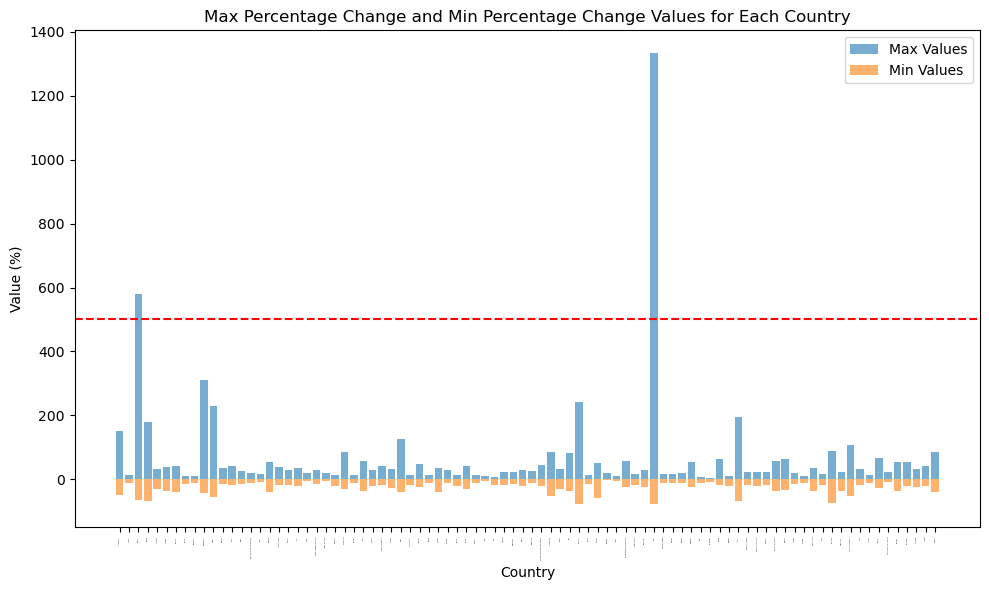

In [895]:
#Calcualtin gthe max-min percentage changes in corn field expansion rate
max_min_values = corn_field_exp_rt_df.groupby("Area")["CornExp_rate"].agg([max, min])


# Plotting the max and min values for each country
plt.figure(figsize=(10, 6))

# Plot the max values
plt.bar(max_min_values.index, max_min_values['max'], label='Max Values', alpha=0.6)

# Plot the min values
plt.bar(max_min_values.index, max_min_values['min'], label='Min Values', alpha=0.6)

plt.xticks(fontsize=0.4)
# Add labels and title
plt.xlabel('Country')
plt.ylabel('Value (%)')
plt.title('Max Percentage Change and Min Percentage Change Values for Each Country')
plt.xticks(rotation=90)
plt.axhline(y=500, color='red', linestyle='--')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [897]:
#Excluding the outliers (Excluding %500 times expansion)
#outlier_countries = max_min_values[(max_min_values["max"] > 500)].index
#outlier_countries

#Calculating the average corn field expansion rate
avg_cornf_field_exp = corn_field_exp_rt_df.groupby("Area")["Value"].mean().reset_index()
#Excluding outliers
#cleaned_cornf_field_exp = avg_cornf_field_exp[~avg_cornf_field_exp.index.isin(outlier_countries)]
cleaned_cornf_field_exp = avg_cornf_field_exp
cleaned_cornf_field_exp

In [899]:
corn_cleandf = df_corn
corn_cleandf['iso3'] = corn_cleandf["Area"].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\2563299464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_cleandf['iso3'] = corn_cleandf["Area"].apply(get_iso3)


In [901]:
corn_cleandf[corn_cleandf['iso3'].isnull()]

Area   Value  Year  Corn_Rate  iso3
1057  Bolivia (Plurinational State of)  307292  2000   0.000000  None
1058  Bolivia (Plurinational State of)  306118  2001  -0.382047  None
1059  Bolivia (Plurinational State of)  310465  2002   1.420041  None
1060  Bolivia (Plurinational State of)  295509  2003  -4.817290  None
1061  Bolivia (Plurinational State of)  313849  2004   6.206241  None
...                                ...     ...   ...        ...   ...
7175                 Republic of Korea   15074  2017  -0.717908  None
7176                 Republic of Korea   15472  2018   2.640308  None
7177                 Republic of Korea   14840  2019  -4.084798  None
7178                 Republic of Korea   15633  2020   5.343666  None
7179                 Republic of Korea   16145  2021   3.275123  None

[110 rows x 5 columns]

In [903]:
# Reverting to previous data before dropping and then manually resolving country mismatches
country_mapping_corn = {
    'Bolivia (Plurinational State of)':'Bolivia, Plurinational State of',
    'China, Taiwan Province of':'Taiwan, Province of China',
    'China, mainland':'China',
    'Democratic Republic of the Congo':'Congo, The Democratic Republic of the',
    'Iran (Islamic Republic of)':'Iran, Islamic Republic of',
    'Micronesia (Federated States of)': 'Micronesia, Federated States of',
    'Netherlands (Kingdom of the)':'Netherlands',
    'Republic of Korea': 'Korea, Republic of',
    'Venezuela (Bolivarian Republic of)':'Venezuela, Bolivarian Republic of',
    # You can add more mappings if necessary
}

corn_cleandf['Area'] = corn_cleandf['Area'].replace(country_mapping_corn)


C:\Users\simon\AppData\Local\Temp\ipykernel_2272\3445402136.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_cleandf['Area'] = corn_cleandf['Area'].replace(country_mapping_corn)


In [905]:
corn_cleandf['iso3'] = corn_cleandf['Area'].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\4123673440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corn_cleandf['iso3'] = corn_cleandf['Area'].apply(get_iso3)


In [907]:
corn_cleandf[corn_cleandf['iso3'].isnull()]

Empty DataFrame
Columns: [Area, Value, Year, Corn_Rate, iso3]
Index: []

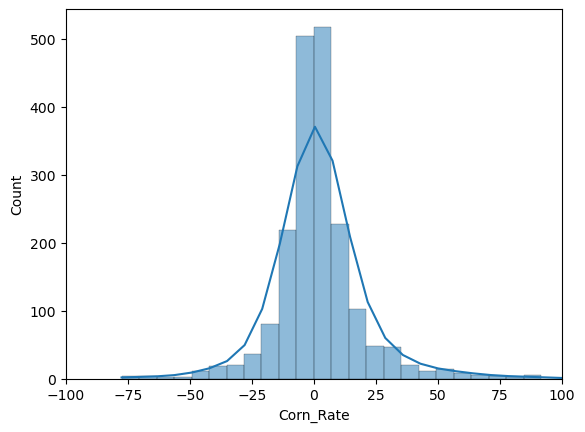

In [919]:
plt.figure()
sns.histplot(corn_cleandf['Corn_Rate'], bins=200, kde=True, edgecolor='black')
plt.xlim(-100,100)
plt.show()

In [923]:
print(corn_cleandf['Corn_Rate'].skew())

18.759840149604635


In [925]:
df_corn['iso3'] = df_corn["Area"].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\2249268677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['iso3'] = df_corn["Area"].apply(get_iso3)


In [927]:
df_corn[df_corn['iso3'].isnull()]

Empty DataFrame
Columns: [Area, Value, Year, Corn_Rate, iso3]
Index: []

In [929]:
df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)
df_corn['iso3'] = df_corn["Area"].apply(get_iso3)
df_corn[df_corn['iso3'].isnull()]

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\554161499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['Area'] = df_corn['Area'].replace(country_mapping_corn)
C:\Users\simon\AppData\Local\Temp\ipykernel_2272\554161499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corn['iso3'] = df_corn["Area"].apply(get_iso3)


Empty DataFrame
Columns: [Area, Value, Year, Corn_Rate, iso3]
Index: []

In [931]:
df_corn

Area    Value  Year   Corn_Rate iso3
39    Afghanistan    96000  2000    0.000000  AFG
40    Afghanistan    80000  2001  -16.666667  AFG
41    Afghanistan   100000  2002   25.000000  AFG
42    Afghanistan   250000  2003  150.000000  AFG
43    Afghanistan   250000  2004    0.000000  AFG
...           ...      ...   ...         ...  ...
9481       Zambia  1433944  2017   23.855672  ZMB
9482       Zambia  1086006  2018  -24.264406  ZMB
9483       Zambia   841693  2019  -22.496469  ZMB
9484       Zambia  1333519  2020   58.432944  ZMB
9485       Zambia  1410102  2021    5.742925  ZMB

[1936 rows x 5 columns]

<Axes: xlabel='Corn_Rate', ylabel='Count'>

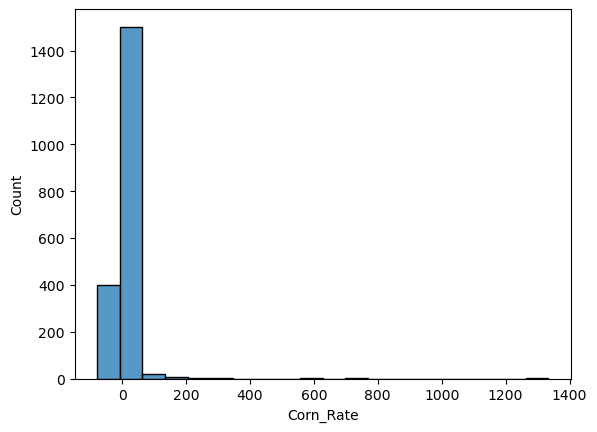

In [933]:
sns.histplot(df_corn['Corn_Rate'], bins=20, kde=False, edgecolor='black')

In [935]:
df_corn['Corn_Rate'].skew()

18.759840149604635

In [937]:
#df_corn['Log_Corn_Rate'] = np.log(df_corn['Corn_Rate'] + 1e-6)
#df_corn = df_corn.dropna()
#df_corn

In [943]:
# Function to normalize per country
def normalize_countryCorn(group):
    mean_value = group["Corn_Rate"].mean()
    std_value = group["Corn_Rate"].std()
    group["norm_cornrate"] = (group["Corn_Rate"] - mean_value) / std_value
    return group

# Apply normalization to each country group
df_normcorn = corn_cleandf.groupby("Area").apply(normalize_countryCorn)

# Check the result
df_normcorn.head(23)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\3154429928.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_normcorn = corn_cleandf.groupby("Area").apply(normalize_countryCorn)


Area   Value  Year   Corn_Rate iso3  norm_cornrate
Area                                                                      
Afghanistan 39   Afghanistan   96000  2000    0.000000  AFG      -0.180357
            40   Afghanistan   80000  2001  -16.666667  AFG      -0.607531
            41   Afghanistan  100000  2002   25.000000  AFG       0.460403
            42   Afghanistan  250000  2003  150.000000  AFG       3.664205
            43   Afghanistan  250000  2004    0.000000  AFG      -0.180357
            44   Afghanistan  261000  2005    4.400000  AFG      -0.067583
            45   Afghanistan  137000  2006  -47.509579  AFG      -1.398048
            46   Afghanistan  137000  2007    0.000000  AFG      -0.180357
            47   Afghanistan  137000  2008    0.000000  AFG      -0.180357
            48   Afghanistan  140000  2009    2.189781  AFG      -0.124232
            49   Afghanistan  183000  2010   30.714286  AFG       0.606863
            50   Afghanistan  183000  2011    0.000000  AFG      -0.180357
            51   Afghanistan  141000  2012  -22.950820  AFG      -0.768596
            52   Afghanistan  142000  2013    0.709220  AFG      -0.162180
            53   Afghanistan  127000  2014  -10.563380  AFG      -0.451101
            54   Afghanistan  147273  2015   15.962992  AFG       0.228781
            55   Afghanistan  151900  2016    3.141784  AFG      -0.099832
            56   Afghanistan  134225  2017  -11.635945  AFG      -0.478591
            57   Afghanistan   72433  2018  -46.036133  AFG      -1.360283
            58   Afghanistan   94910  2019   31.031436  AFG       0.614991
            59   Afghanistan  140498  2020   48.032873  AFG       1.050745
            60   Afghanistan  139080  2021   -1.009267  AFG      -0.206225
Albania     101      Albania   53000  2000    0.000000  ALB      -0.100183

<Axes: xlabel='norm_cornrate', ylabel='Count'>

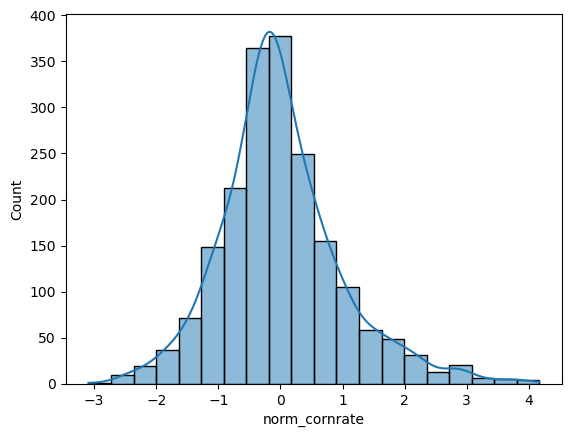

In [945]:
sns.histplot(df_normcorn['norm_cornrate'], bins=20, kde=True, edgecolor='black')

In [951]:
print(df_normcorn['norm_cornrate'].skew(), df_normcorn.shape)

0.6836610065425305 (1936, 6)


In [1061]:
df_normcorn

Area    Value  Year   Corn_Rate iso3  norm_cornrate
Area                                                                        
Afghanistan 39    Afghanistan    96000  2000    0.000000  AFG      -0.180357
            40    Afghanistan    80000  2001  -16.666667  AFG      -0.607531
            41    Afghanistan   100000  2002   25.000000  AFG       0.460403
            42    Afghanistan   250000  2003  150.000000  AFG       3.664205
            43    Afghanistan   250000  2004    0.000000  AFG      -0.180357
...                       ...      ...   ...         ...  ...            ...
Zambia      9481       Zambia  1433944  2017   23.855672  ZMB       0.485618
            9482       Zambia  1086006  2018  -24.264406  ZMB      -1.011804
            9483       Zambia   841693  2019  -22.496469  ZMB      -0.956788
            9484       Zambia  1333519  2020   58.432944  ZMB       1.561608
            9485       Zambia  1410102  2021    5.742925  ZMB      -0.078023

[1936 rows x 6 columns]

# Land Size

In [949]:
# Get data for 'Land area (sq. km)' for all countries
indicators = {'AG.LND.TOTL.K2': 'Land area (sq. km)'}
data = wbdata.get_dataframe(indicators)

# Display the land area for all countries
org_data = data.reset_index()

#Converting the year column to integer
org_data['date'] = org_data['date'].astype(int)

org_data.head()


country  date  Land area (sq. km)
0  Africa Eastern and Southern  2023                 NaN
1  Africa Eastern and Southern  2022                 NaN
2  Africa Eastern and Southern  2021        1.484509e+07
3  Africa Eastern and Southern  2020        1.484509e+07
4  Africa Eastern and Southern  2019        1.484513e+07

In [1012]:
filtered_data = org_data[(org_data['date'] >= 2000) & (org_data['date'] <= 2021)]
#avg_land_size_df = filtered_data.groupby('country').agg(  # Count of unique values per country
    #Average_Land_Size=('Land area (sq. km)', 'mean')     # Average of the values per country
#).reset_index()
avg_land_size_df = filtered_data
avg_land_size_df

country  date  Land area (sq. km)
2      Africa Eastern and Southern  2021        1.484509e+07
3      Africa Eastern and Southern  2020        1.484509e+07
4      Africa Eastern and Southern  2019        1.484513e+07
5      Africa Eastern and Southern  2018        1.484512e+07
6      Africa Eastern and Southern  2017        1.484510e+07
...                            ...   ...                 ...
16979                     Zimbabwe  2004        3.868500e+05
16980                     Zimbabwe  2003        3.868500e+05
16981                     Zimbabwe  2002        3.868500e+05
16982                     Zimbabwe  2001        3.868500e+05
16983                     Zimbabwe  2000        3.868500e+05

[5852 rows x 3 columns]

In [1014]:
avg_land_size_df.columns

Index(['country', 'date', 'Land area (sq. km)'], dtype='object')

In [1016]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1108197642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)


In [1018]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

country  date  Land area (sq. km)  iso3
2      Africa Eastern and Southern  2021        1.484509e+07  None
3      Africa Eastern and Southern  2020        1.484509e+07  None
4      Africa Eastern and Southern  2019        1.484513e+07  None
5      Africa Eastern and Southern  2018        1.484512e+07  None
6      Africa Eastern and Southern  2017        1.484510e+07  None
...                            ...   ...                 ...   ...
16851                  Yemen, Rep.  2004        5.279700e+05  None
16852                  Yemen, Rep.  2003        5.279700e+05  None
16853                  Yemen, Rep.  2002        5.279700e+05  None
16854                  Yemen, Rep.  2001        5.279700e+05  None
16855                  Yemen, Rep.  2000        5.279700e+05  None

[1628 rows x 4 columns]

In [1020]:
avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\344355826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['country'] = avg_land_size_df['country'].replace(country_mapping)


In [1022]:
avg_land_size_df = avg_land_size_df[~avg_land_size_df['country'].isin(country_not_country)]

In [1024]:
avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)

C:\Users\simon\AppData\Local\Temp\ipykernel_2272\1108197642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_land_size_df['iso3'] = avg_land_size_df['country'].apply(get_iso3)


In [1026]:
avg_land_size_df[avg_land_size_df['iso3'].isnull()]

country  date  Land area (sq. km)  iso3
8642  Hong Kong SAR, China  2021              1050.0  None
8643  Hong Kong SAR, China  2020              1050.0  None
8644  Hong Kong SAR, China  2019              1050.0  None
8645  Hong Kong SAR, China  2018              1050.0  None
8646  Hong Kong SAR, China  2017              1050.0  None
8647  Hong Kong SAR, China  2016              1050.0  None
8648  Hong Kong SAR, China  2015              1050.0  None
8649  Hong Kong SAR, China  2014              1050.0  None
8650  Hong Kong SAR, China  2013              1050.0  None
8651  Hong Kong SAR, China  2012              1050.0  None
8652  Hong Kong SAR, China  2011              1050.0  None
8653  Hong Kong SAR, China  2010              1050.0  None
8654  Hong Kong SAR, China  2009              1050.0  None
8655  Hong Kong SAR, China  2008              1050.0  None
8656  Hong Kong SAR, China  2007              1050.0  None
8657  Hong Kong SAR, China  2006              1050.0  None
8658  Hong Kong SAR, China  2005              1050.0  None
8659  Hong Kong SAR, China  2004              1050.0  None
8660  Hong Kong SAR, China  2003              1050.0  None
8661  Hong Kong SAR, China  2002              1050.0  None
8662  Hong Kong SAR, China  2001              1050.0  None
8663  Hong Kong SAR, China  2000              1050.0  None
9858                Kosovo  2021                 NaN  None
9859                Kosovo  2020                 NaN  None
9860                Kosovo  2019                 NaN  None
9861                Kosovo  2018                 NaN  None
9862                Kosovo  2017                 NaN  None
9863                Kosovo  2016                 NaN  None
9864                Kosovo  2015                 NaN  None
9865                Kosovo  2014                 NaN  None
9866                Kosovo  2013                 NaN  None
9867                Kosovo  2012                 NaN  None
9868                Kosovo  2011                 NaN  None
9869                Kosovo  2010                 NaN  None
9870                Kosovo  2009                 NaN  None
9871                Kosovo  2008                 NaN  None
9872                Kosovo  2007                 NaN  None
9873                Kosovo  2006                 NaN  None
9874                Kosovo  2005                 NaN  None
9875                Kosovo  2004                 NaN  None
9876                Kosovo  2003                 NaN  None
9877                Kosovo  2002                 NaN  None
9878                Kosovo  2001                 NaN  None
9879                Kosovo  2000                 NaN  None

In [1028]:
avg_land_size_df = avg_land_size_df.dropna(subset=['iso3'])

In [1030]:
avg_land_size_df

country  date  Land area (sq. km) iso3
3138   Afghanistan  2021            652230.0  AFG
3139   Afghanistan  2020            652230.0  AFG
3140   Afghanistan  2019            652230.0  AFG
3141   Afghanistan  2018            652230.0  AFG
3142   Afghanistan  2017            652230.0  AFG
...            ...   ...                 ...  ...
16979     Zimbabwe  2004            386850.0  ZWE
16980     Zimbabwe  2003            386850.0  ZWE
16981     Zimbabwe  2002            386850.0  ZWE
16982     Zimbabwe  2001            386850.0  ZWE
16983     Zimbabwe  2000            386850.0  ZWE

[4686 rows x 4 columns]

# Result

In [1043]:
cleaned_land = avg_land_size_df.reset_index()
cleaned_land.drop('index', axis=1, inplace=True)
cleaned_land.rename(columns={'Land area (sq. km)':'landArea','date':'year'}, inplace=True)
cleaned_land.head()

country  year  landArea iso3
0  Afghanistan  2021  652230.0  AFG
1  Afghanistan  2020  652230.0  AFG
2  Afghanistan  2019  652230.0  AFG
3  Afghanistan  2018  652230.0  AFG
4  Afghanistan  2017  652230.0  AFG

In [1065]:
cleaned_corn = pd.DataFrame(df_normcorn).reset_index(drop=True)
cleaned_corn.drop(['Value'], axis=1, inplace=True)
cleaned_corn.rename(columns={'Corn_Rate':'cornExp_Rate', 'Area':'country', 'Year':'year','norm_cornrate':'cornExp_normRate'}, inplace=True)
cleaned_corn.head()

country  year  cornExp_Rate iso3  cornExp_normRate
0  Afghanistan  2000      0.000000  AFG         -0.180357
1  Afghanistan  2001    -16.666667  AFG         -0.607531
2  Afghanistan  2002     25.000000  AFG          0.460403
3  Afghanistan  2003    150.000000  AFG          3.664205
4  Afghanistan  2004      0.000000  AFG         -0.180357

In [1075]:
cleaned_def = pd.DataFrame(df_normalized).reset_index()
cleaned_def.drop(['index', 'Values'], axis=1, inplace=True)
cleaned_def.rename(columns={'Country Name':'country','Year':'year','Def_Rate':'def_Rate','norm_defrate':'def_normRate'}, inplace=True)
cleaned_def.head()

country  year  def_Rate  def_normRate iso3
0  Albania  2000  0.000000     -1.356799  ALB
1  Albania  2001  0.046606      0.587992  ALB
2  Albania  2002  0.046606      0.587992  ALB
3  Albania  2003  0.046606      0.587992  ALB
4  Albania  2004  0.046606      0.587992  ALB

In [1069]:
shapedef = cleaned_def.shape
shapecorn = cleaned_corn.shape
shapeland = cleaned_land.shape

print(f'Shape of deforestation df {shapedef}, Shape of corn df {shapecorn}, Shape of land df {shapeland}')

Shape of deforestation df (3850, 5), Shape of corn df (1936, 5), Shape of land df (4686, 4)


In [988]:
# Reverting to previous data before dropping and then manually resolving country mismatches
#country_mapping = {c
#    'United Republic of Tanzania': 'Tanzania',
#    'United States of America': 'United States',
#    'Venezuela (Bolivarian Republic of)': 'Venezuela',
#    'Türkiye': 'Turkey',
#    'Africa Eastern and Southern': 'Eastern and Southern Africa',
#    'Africa Western and Central': 'Western and Central Africa',
    # You can add more mappings if necessary
#}

# Rename columns again to 'Country'
# cleaned_land.rename(columns={'country': 'Country'}, inplace=True)
# cleaned_corn.rename(columns={'Area': 'Country'}, inplace=True)
# cleaned_def.rename(columns={'Country Name': 'Country'}, inplace=True)



In [1079]:
#avg_land_size_df['Country'] = avg_land_size_df['Country'].replace(country_mapping)
#cleaned_corn_df['Country'] = cleaned_corn_df['Country'].replace(country_mapping)
#cleaned_def['Country'] = cleaned_def['Country'].replace(country_mapping)


# Merging dataframes without dropping any countries, and will handle missing data
final_merged_df = pd.merge(cleaned_land, cleaned_corn, on=['country', 'iso3', 'year'], how='outer')
final_merged_df = pd.merge(final_merged_df, cleaned_def, on=['country', 'iso3', 'year'], how='outer')

final_merged_df.head()

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0  Afghanistan  2000  652230.0  AFG      0.000000         -0.180357       NaN   
1  Afghanistan  2001  652230.0  AFG    -16.666667         -0.607531       NaN   
2  Afghanistan  2002  652230.0  AFG     25.000000          0.460403       NaN   
3  Afghanistan  2003  652230.0  AFG    150.000000          3.664205       NaN   
4  Afghanistan  2004  652230.0  AFG      0.000000         -0.180357       NaN   

   def_normRate  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [1081]:
#merged_df = pd.merge(df, df_corn, on=['iso3', 'Year'], how='inner')
#merged_df

In [100]:
#merged_df = pd.merge(merged_df, avg_land_size_df[['iso3','Average_Land_Size']], on='iso3', how='left')

In [1085]:
final_merged_df.isna().sum().sum()

7933

In [1089]:
df_final = final_merged_df
df_final

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  \
0     Afghanistan  2000  652230.0  AFG      0.000000         -0.180357   
1     Afghanistan  2001  652230.0  AFG    -16.666667         -0.607531   
2     Afghanistan  2002  652230.0  AFG     25.000000          0.460403   
3     Afghanistan  2003  652230.0  AFG    150.000000          3.664205   
4     Afghanistan  2004  652230.0  AFG      0.000000         -0.180357   
...           ...   ...       ...  ...           ...               ...   
4835     Zimbabwe  2017  386850.0  ZWE           NaN               NaN   
4836     Zimbabwe  2018  386850.0  ZWE           NaN               NaN   
4837     Zimbabwe  2019  386850.0  ZWE           NaN               NaN   
4838     Zimbabwe  2020  386850.0  ZWE           NaN               NaN   
4839     Zimbabwe  2021  386850.0  ZWE           NaN               NaN   

      def_Rate  def_normRate  
0          NaN           NaN  
1          NaN           NaN  
2          NaN           NaN  
3          NaN           NaN  
4          NaN           NaN  
...        ...           ...  
4835  -0.11909     -0.213201  
4836  -0.11909     -0.213201  
4837  -0.11909     -0.213201  
4838  -0.11909     -0.213201  
4839  -0.11909     -0.213201  

[4840 rows x 8 columns]

merged_df = merged_df.rename({"Value":"Average_Corn_Field_Expansion_Rate",
                          "Values":"Average_Deforestation_Rate"},axis = 1)
merged_df = merged_df.drop(columns=['Area'])
merged_df

merged_df = merged_df[(merged_df['Def_Rate'] != 0) | (merged_df['Corn_Rate'] != 0)]

merged_df

'Algeria' in cleaned_corn_df['Country']

cleaned_corn_df['Country']

In [1091]:
# Define the function to detect duplicates, group by partition, fill values with zeros, and sum them up
'''def consolidate_duplicates(df, country_column):
    # Make a copy of the dataframe to avoid modifying the original one
    df_copy = df.copy()
    
    # Standardize country names for consistency (can extend this part to include more mappings if necessary)
    df_copy[country_column] = df_copy[country_column].replace({
        "Cote d'Ivoire": "Côte d'Ivoire",
        "Democratic Republic of the Congo": "Congo, Dem. Rep.",
        "Korea, Rep.": "South Korea",
        "Korea, Dem. People's Rep.": "North Korea",
        "Egypt, Arab Rep.": "Egypt",
        "Iran (Islamic Republic of)": "Iran, Islamic Rep.",
        "Netherlands (Kingdom of the)" : "Netherlands",
        "Slovak Republic" : "Slovakia",
        "Turkiye" : "Turkey",
        "Venezuela, RB" : "Veneuzela",
        "Yemen, Rep." : "Yemen",
        "Republic of Korea": "South Korea",
        "Republic of Moldova":"Moldova",
        "Kyrgyz Republic" : "Kyrgyzstan"
    })
    
    # Get the list of unique countries
    unique_countries = df_copy[country_column].unique()
    
    # Loop through unique countries
    result_list = []
    
    for country in unique_countries:
        # Filter the rows for the current country
        partition = df_copy[df_copy[country_column] == country]
        
        # If there are duplicates, group them by the country and sum the numeric values
        if len(partition) > 1:
            # Replace NaNs with zeros for aggregation
            partition = partition.fillna(0)
            
            # Sum the rows and keep the country name intact
            summed_partition = partition.groupby(country_column).sum().reset_index()
            
            # Append the result to the list
            result_list.append(summed_partition)
        else:
            # If there are no duplicates, keep the partition as it is
            result_list.append(partition)
    
    # Concatenate all results into a final dataframe
    final_df = pd.concat(result_list, ignore_index=True)
    
    return final_df

# Applying the function to the example data
final_grouped_df = consolidate_duplicates(final_merged_df, 'Country')

'''


'def consolidate_duplicates(df, country_column):\n    # Make a copy of the dataframe to avoid modifying the original one\n    df_copy = df.copy()\n    \n    # Standardize country names for consistency (can extend this part to include more mappings if necessary)\n    df_copy[country_column] = df_copy[country_column].replace({\n        "Cote d\'Ivoire": "Côte d\'Ivoire",\n        "Democratic Republic of the Congo": "Congo, Dem. Rep.",\n        "Korea, Rep.": "South Korea",\n        "Korea, Dem. People\'s Rep.": "North Korea",\n        "Egypt, Arab Rep.": "Egypt",\n        "Iran (Islamic Republic of)": "Iran, Islamic Rep.",\n        "Netherlands (Kingdom of the)" : "Netherlands",\n        "Slovak Republic" : "Slovakia",\n        "Turkiye" : "Turkey",\n        "Venezuela, RB" : "Veneuzela",\n        "Yemen, Rep." : "Yemen",\n        "Republic of Korea": "South Korea",\n        "Republic of Moldova":"Moldova",\n        "Kyrgyz Republic" : "Kyrgyzstan"\n    })\n    \n    # Get the list of un

In [109]:
#final_grouped_df = final_merged_df

In [110]:
#final_grouped_df[final_grouped_df["Country"] == "Côte d'Ivoire"]

In [111]:
#final_grouped_df[final_grouped_df["Country"] == "Bolivia"]

In [112]:
#final_grouped_df[final_grouped_df["Country"] == "Iran, Islamic Rep."]

In [1093]:
#Now drop the rows with missing data
last_df = df_final.dropna()
last_df = last_df.reset_index(drop = True)

In [1097]:
last_df.shape

(1716, 8)

In [1099]:
last_df.head()

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0  Albania  2000   27400.0  ALB      0.000000         -0.100183  0.000000   
1  Albania  2001   27400.0  ALB     -1.886792         -0.412771  0.046606   
2  Albania  2002   27400.0  ALB     -3.846154         -0.737382  0.046606   
3  Albania  2003   27400.0  ALB     -3.328000         -0.651539  0.046606   
4  Albania  2004   27400.0  ALB     -3.177756         -0.626647  0.046606   

   def_normRate  
0     -1.356799  
1      0.587992  
2      0.587992  
3      0.587992  
4      0.587992

In [1105]:
last_df['iso3'].unique().shape

(77,)

In [1107]:
#last_df = last_df.drop(columns=['index_x','index_y','iso3_y','index','iso3_x' ])
#last_df

In [1109]:
last_df.isna().sum().sum()

0

In [1111]:
#Renaming the columns
#last_df = last_df.rename({"Value":"Average_Corn_Field_Expansion_Rate",
#                          "Values":"Average_Deforestation_Rate"},axis = 1)

#last_df

In [1115]:
# Find duplicate countries
duplicate_countries = last_df[last_df['country'].duplicated(keep=False)]

# Display the rows with duplicate countries
print(duplicate_countries)

      country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0     Albania  2000   27400.0  ALB      0.000000         -0.100183  0.000000   
1     Albania  2001   27400.0  ALB     -1.886792         -0.412771  0.046606   
2     Albania  2002   27400.0  ALB     -3.846154         -0.737382  0.046606   
3     Albania  2003   27400.0  ALB     -3.328000         -0.651539  0.046606   
4     Albania  2004   27400.0  ALB     -3.177756         -0.626647  0.046606   
...       ...   ...       ...  ...           ...               ...       ...   
1711   Zambia  2017  743390.0  ZMB     23.855672          0.485618 -0.253070   
1712   Zambia  2018  743390.0  ZMB    -24.264406         -1.011804 -0.253178   
1713   Zambia  2019  743390.0  ZMB    -22.496469         -0.956788 -0.253191   
1714   Zambia  2020  743390.0  ZMB     58.432944          1.561608 -0.253178   
1715   Zambia  2021  743390.0  ZMB      5.742925         -0.078023 -0.253187   

      def_normRate  
0        -1.356799

In [1117]:
# Remove duplicates and keep the first occurrence --> DO NOT DROP (DUPLICATES DUE TO THE TIME SERIE)
#last_df = last_df.drop_duplicates(subset='Country', keep='first')

# Display the updated DataFrame
last_df.shape

(1716, 8)

In [1125]:
last_df.head()

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0  Albania  2000   27400.0  ALB      0.000000         -0.100183  0.000000   
1  Albania  2001   27400.0  ALB     -1.886792         -0.412771  0.046606   
2  Albania  2002   27400.0  ALB     -3.846154         -0.737382  0.046606   
3  Albania  2003   27400.0  ALB     -3.328000         -0.651539  0.046606   
4  Albania  2004   27400.0  ALB     -3.177756         -0.626647  0.046606   

   def_normRate  
0     -1.356799  
1      0.587992  
2      0.587992  
3      0.587992  
4      0.587992

# **EDA A MODIFIER -> AVG SUR LES ANNEES POUR AVOIR UN DEFRATE/CORNEXPRATE CORRECT**

In [1165]:
df_avg_defrate = pd.DataFrame(last_df.groupby("country")["def_Rate"].mean()).reset_index()
df_avg_defrate['iso3'] = df_avg_defrate['country'].apply(get_iso3)
df_avg_defrate

country  def_Rate iso3
0      Albania  0.032515  ALB
1      Algeria  0.007239  DZA
2       Angola -0.424987  AGO
3    Argentina -0.081624  ARG
4      Armenia -0.006993  ARM
..         ...       ...  ...
72     Ukraine  0.014528  UKR
73     Uruguay  0.177382  URY
74  Uzbekistan  0.074496  UZB
75    Viet Nam  0.412612  VNM
76      Zambia -0.148471  ZMB

[77 rows x 3 columns]

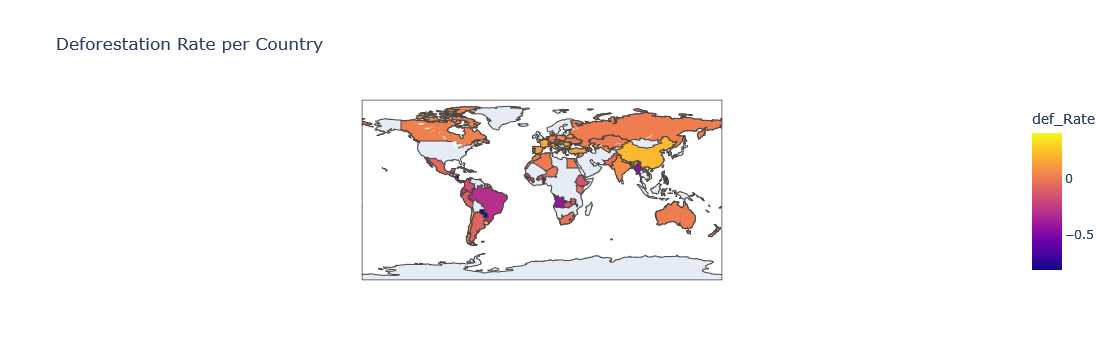

In [1493]:
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_defrate, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='def_Rate',  # Average deforestation rates
                    hover_name='country',
                    title = 'Deforestation Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [1169]:
df_avg_cornExpRate = pd.DataFrame(last_df.groupby("country")["cornExp_Rate"].mean()).reset_index()
df_avg_cornExpRate['iso3'] = df_avg_cornExpRate['country'].apply(get_iso3)
df_avg_cornExpRate

country  cornExp_Rate iso3
0      Albania      0.604709  ALB
1      Algeria     43.622156  DZA
2       Angola     13.153350  AGO
3    Argentina      5.647775  ARG
4      Armenia     -1.558282  ARM
..         ...           ...  ...
72     Ukraine      8.444788  UKR
73     Uruguay      8.289270  URY
74  Uzbekistan      2.320314  UZB
75    Viet Nam      1.427449  VNM
76      Zambia      8.250207  ZMB

[77 rows x 3 columns]

In [1489]:
df_avg_cornExpRate[df_avg_cornExpRate['iso3'] == 'DZA']

country  cornExp_Rate iso3
1  Algeria     43.622156  DZA

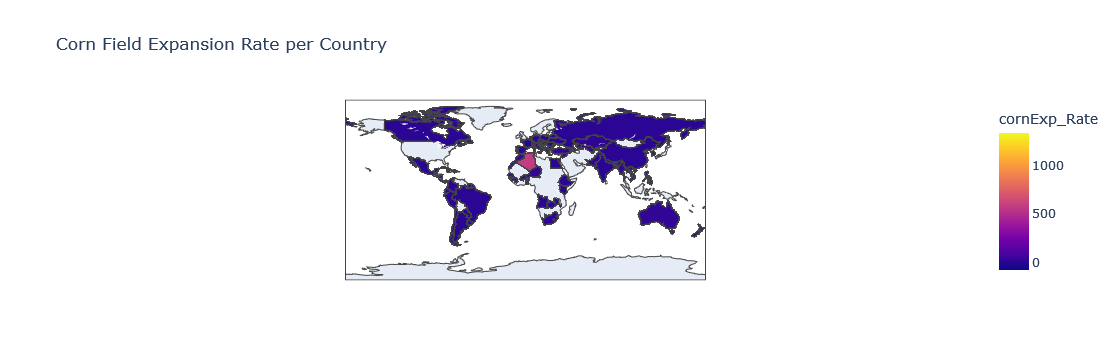

In [1491]:
# Now plot the map with Plotly Express
fig = px.choropleth(last_df, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='cornExp_Rate',  # deforestation rates
                    hover_name='country',
                    title = 'Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

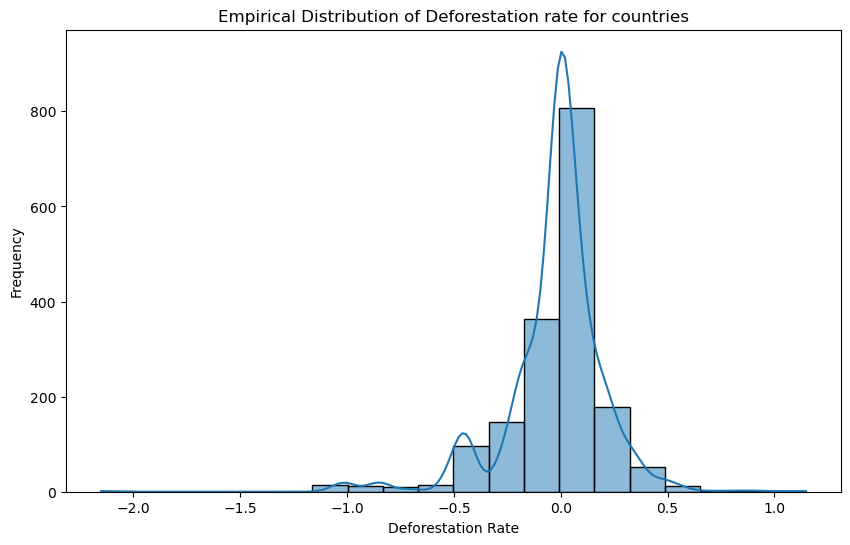

In [1181]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['def_Rate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Deforestation Rate')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Deforestation rate for countries')

# Show the plot
plt.show()

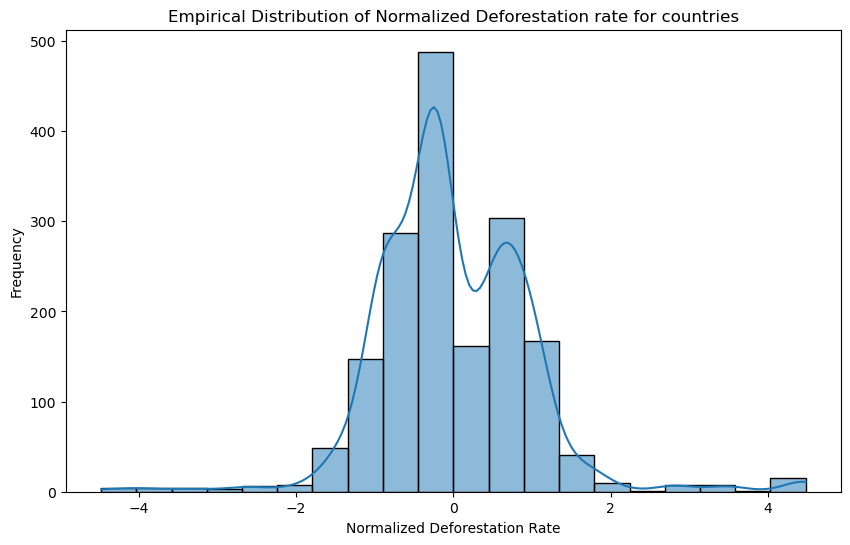

In [1199]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['def_normRate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Normalized Deforestation Rate')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Normalized Deforestation rate for countries')

# Show the plot
plt.show()

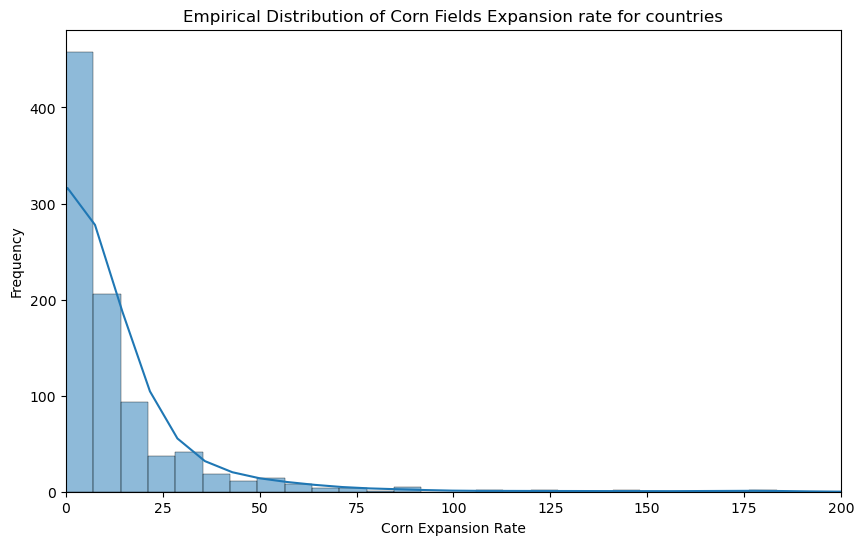

In [1201]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['cornExp_Rate'], bins=200, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Corn Expansion Rate')
plt.xlim(0,200)
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Corn Fields Expansion rate for countries')

# Show the plot
plt.show()

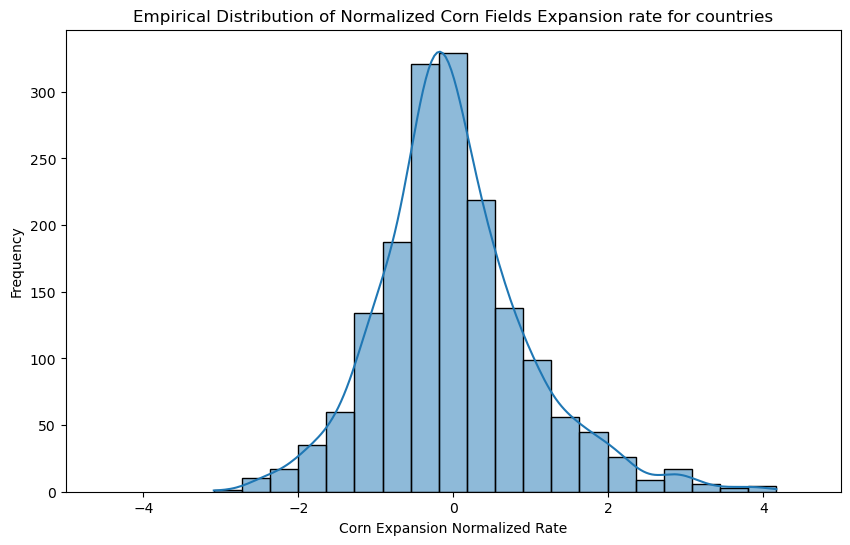

In [1202]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['cornExp_normRate'], bins=20, kde=True, edgecolor='black')

# Add labels and title
plt.xlabel('Corn Expansion Normalized Rate')
plt.xlim(-5,5)
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Normalized Corn Fields Expansion rate for countries')

# Show the plot
plt.show()

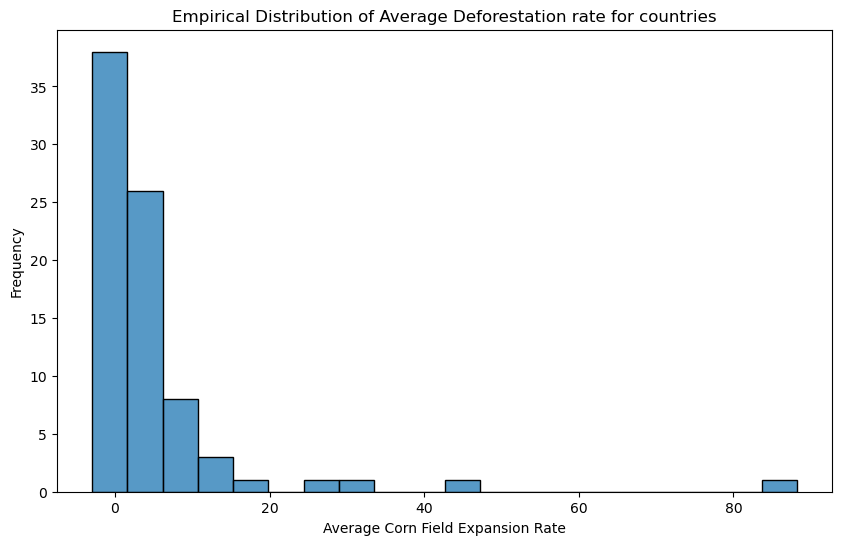

In [124]:
plt.figure(figsize=(10,6))
sns.histplot(last_df['Average_Corn_Field_Expansion_Rate'], bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Average Corn Field Expansion Rate')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Deforestation rate for countries')

# Show the plot
plt.show()

In [126]:
#last_df['Log_Average_Corn_Field_Expansion_Rate'] = np.log(last_df['Average_Corn_Field_Expansion_Rate'] + 1e-6)

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_18239/4097178313.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1205]:
last_df

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0     Albania  2000   27400.0  ALB      0.000000         -0.100183  0.000000   
1     Albania  2001   27400.0  ALB     -1.886792         -0.412771  0.046606   
2     Albania  2002   27400.0  ALB     -3.846154         -0.737382  0.046606   
3     Albania  2003   27400.0  ALB     -3.328000         -0.651539  0.046606   
4     Albania  2004   27400.0  ALB     -3.177756         -0.626647  0.046606   
...       ...   ...       ...  ...           ...               ...       ...   
1711   Zambia  2017  743390.0  ZMB     23.855672          0.485618 -0.253070   
1712   Zambia  2018  743390.0  ZMB    -24.264406         -1.011804 -0.253178   
1713   Zambia  2019  743390.0  ZMB    -22.496469         -0.956788 -0.253191   
1714   Zambia  2020  743390.0  ZMB     58.432944          1.561608 -0.253178   
1715   Zambia  2021  743390.0  ZMB      5.742925         -0.078023 -0.253187   

      def_normRate  
0        -1.356799  
1         0.587992  
2         0.587992  
3         0.587992  
4         0.587992  
...            ...  
1711     -0.971905  
1712     -0.972905  
1713     -0.973030  
1714     -0.972905  
1715     -0.972989  

[1716 rows x 8 columns]

In [1207]:
'''
plt.figure(figsize=(10,6))
sns.histplot(last_df['Log_Average_Corn_Field_Expansion_Rate'], bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Log Average Corn Field Expansion Rate')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Deforestation rate for countries')

# Show the plot
plt.show()
'''

"\nplt.figure(figsize=(10,6))\nsns.histplot(last_df['Log_Average_Corn_Field_Expansion_Rate'], bins=20, kde=False, edgecolor='black')\n\n# Add labels and title\nplt.xlabel('Log Average Corn Field Expansion Rate')\nplt.ylabel('Frequency')\nplt.title('Empirical Distribution of Average Deforestation rate for countries')\n\n# Show the plot\nplt.show()\n"

In [1209]:
#print(last_df['Log_Average_Corn_Field_Expansion_Rate'].skew())

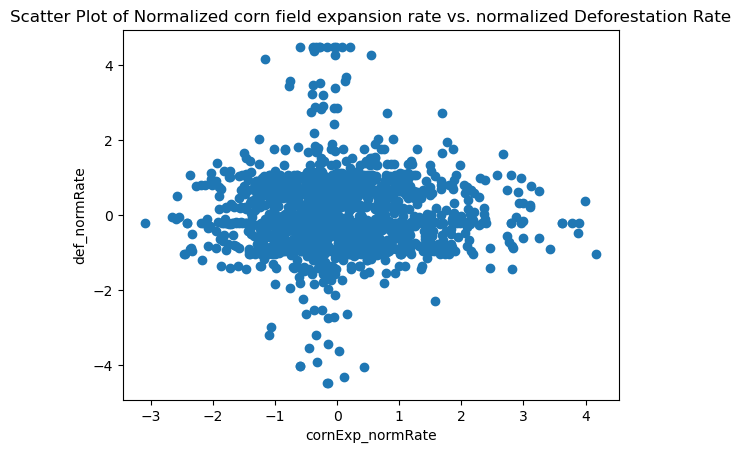

In [1211]:
# Create a scatter plot
plt.scatter(last_df['cornExp_normRate'], last_df['def_normRate'])

# Set the labels for the axes
plt.xlabel('cornExp_normRate')
plt.ylabel('def_normRate')

# Set the title of the plot
plt.title('Scatter Plot of Normalized corn field expansion rate vs. normalized Deforestation Rate')

# Calculate the linear regression
x = last_df['cornExp_normRate']
y = last_df['def_normRate']

# Show the plot
plt.show()

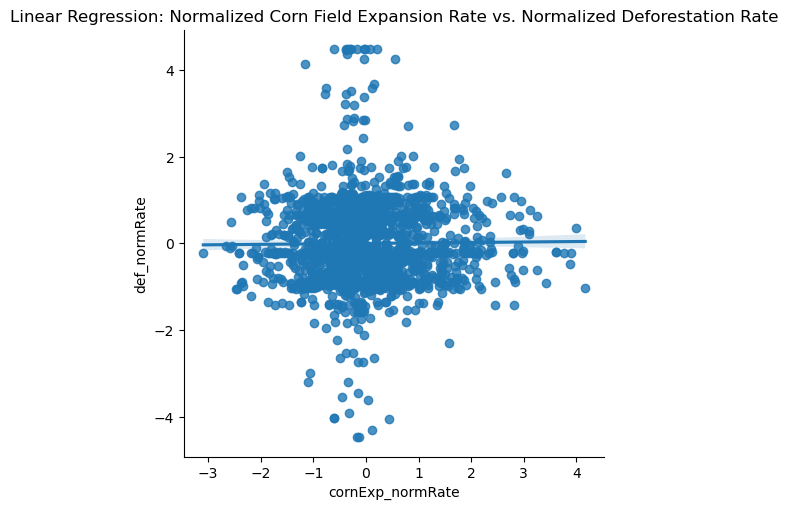

In [1213]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='cornExp_normRate', y='def_normRate', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Normalized Corn Field Expansion Rate vs. Normalized Deforestation Rate')

# Show the plot
plt.show()

In [1217]:
# Finding the median of Land_Size
median_land_size = last_df['landArea'].median()

# Creating a dummy variable for whether the land size is higher than the median
last_df['Higher_Than_Median'] = last_df['landArea'].apply(lambda val: 1 if (val>median_land_size) else 0)

last_df.head()

country  year  landArea iso3  cornExp_Rate  cornExp_normRate  def_Rate  \
0  Albania  2000   27400.0  ALB      0.000000         -0.100183  0.000000   
1  Albania  2001   27400.0  ALB     -1.886792         -0.412771  0.046606   
2  Albania  2002   27400.0  ALB     -3.846154         -0.737382  0.046606   
3  Albania  2003   27400.0  ALB     -3.328000         -0.651539  0.046606   
4  Albania  2004   27400.0  ALB     -3.177756         -0.626647  0.046606   

   def_normRate  Higher_Than_Median  
0     -1.356799                   0  
1      0.587992                   0  
2      0.587992                   0  
3      0.587992                   0  
4      0.587992                   0

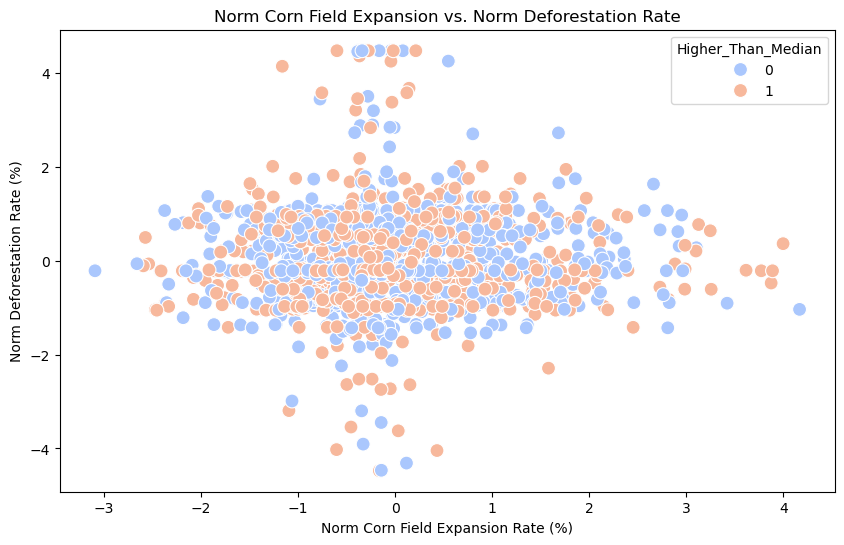

In [1219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='cornExp_normRate', 
                y='def_normRate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Norm Corn Field Expansion vs. Norm Deforestation Rate')
plt.xlabel('Norm Corn Field Expansion Rate (%)')
plt.ylabel('Norm Deforestation Rate (%)')

# Display the plot
plt.show()

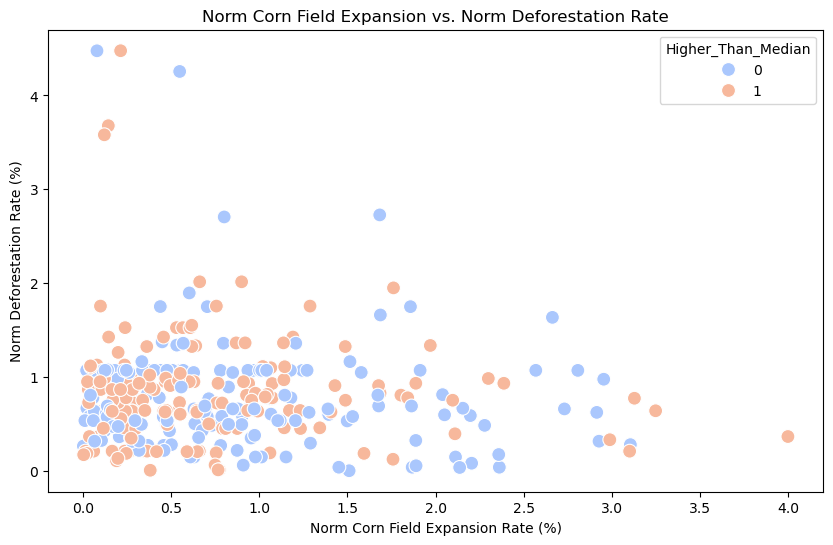

In [1223]:
#Filtered data (only positive values)
positive_df = last_df[(last_df["def_normRate"]>0) &(last_df["cornExp_normRate"]>0)  ]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=positive_df, 
                x='cornExp_normRate', 
                y='def_normRate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Norm Corn Field Expansion vs. Norm Deforestation Rate')
plt.xlabel('Norm Corn Field Expansion Rate (%)')
plt.ylabel('Norm Deforestation Rate (%)')

# Display the plot
plt.show()

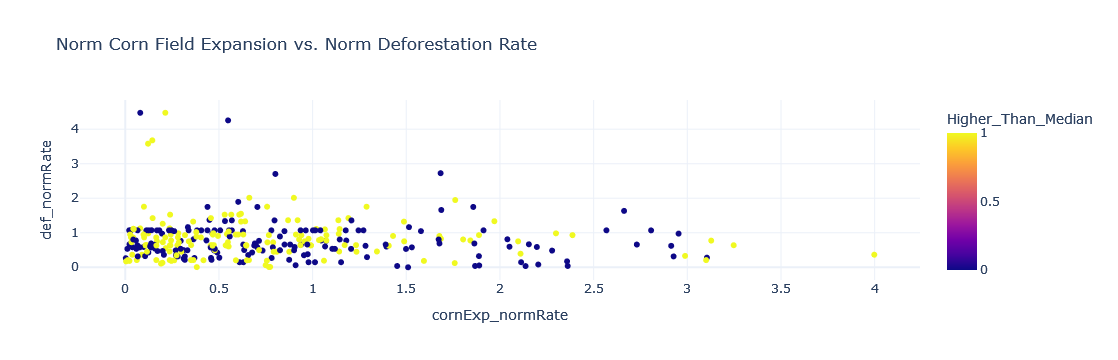

In [1225]:
import plotly.express as px

# Assuming you have your 'positive_df' DataFrame with 'Country', 'Average_Corn_Field_Expansion_Rate(%)',
# 'Average_Deforestation_Rate(%)', and 'Higher_Than_Median'

# Create an interactive scatter plot
fig = px.scatter(
    positive_df, 
    x='cornExp_normRate', 
    y='def_normRate', 
    color='Higher_Than_Median', 
    hover_name='country',  # Display country name on hover
    title='Norm Corn Field Expansion vs. Norm Deforestation Rate',
    labels={
        'Norm_Corn_Field_Expansion_Rate': 'Corn Field Expansion Rate (%)',
        'Norm_Deforestation_Rate': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()


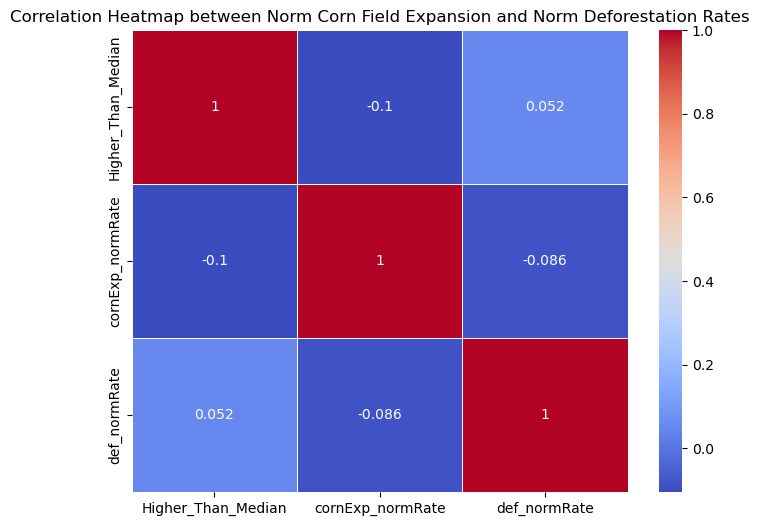

In [1227]:
df_features = positive_df[['Higher_Than_Median','cornExp_normRate', 'def_normRate']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap between Norm Corn Field Expansion and Norm Deforestation Rates')
plt.show()

In [1229]:
last_df.columns

Index(['country', 'year', 'landArea', 'iso3', 'cornExp_Rate',
       'cornExp_normRate', 'def_Rate', 'def_normRate', 'Higher_Than_Median'],
      dtype='object')

In [1235]:
df_avg_landsize = pd.DataFrame(last_df.groupby("country")["landArea"].mean()).reset_index()
df_avg_landsize['iso3'] = df_avg_landsize['country'].apply(get_iso3)
df_avg_landsize

country      landArea iso3
0      Albania  2.740000e+04  ALB
1      Algeria  2.381740e+06  DZA
2       Angola  1.246700e+06  AGO
3    Argentina  2.736690e+06  ARG
4      Armenia  2.847000e+04  ARM
..         ...           ...  ...
72     Ukraine  5.793400e+05  UKR
73     Uruguay  1.750200e+05  URY
74  Uzbekistan  4.373825e+05  UZB
75    Viet Nam  3.125857e+05  VNM
76      Zambia  7.433900e+05  ZMB

[77 rows x 3 columns]

In [1237]:
# Import bokeh plotting package (must have explicit import of submodules)
import bokeh.io
import bokeh.models
import bokeh.plotting

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

# Sorting the data by 'Average_Land_Size' before plotting
last_df_sorted = df_avg_landsize.sort_values(by='landArea', ascending=False)

# Updating the bar plot with the sorted data
bar_grdp_sorted = bokeh.plotting.figure(
    frame_height=1200,
    frame_width=800,
    x_axis_label='landArea',
    y_range = last_df_sorted["country"][::-1],  # Sorting the y-axis based on the sorted data
)

bar_grdp_sorted.hbar(
    source=last_df_sorted,        # our sorted data
    y="country",                  # Country on the y-axis
    right='landArea',    # Average_Land_Size on the x-axis, to the right
    height=0.6                    # height of bars
)

# Turn off gridlines on categorical axis
bar_grdp_sorted.ygrid.grid_line_color = None

# Start axes at origin on quantitative axis
bar_grdp_sorted.x_range.start = 0

# Display the updated sorted plot
bokeh.io.show(bar_grdp_sorted)

Loading BokehJS ...

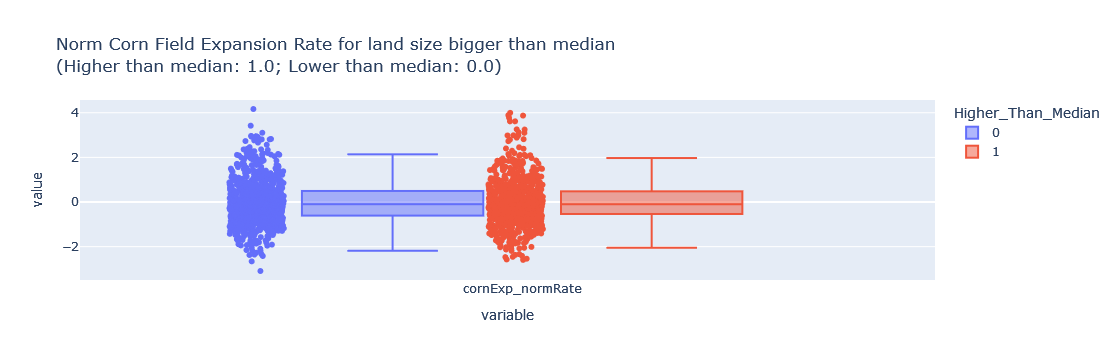

In [1239]:
import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["cornExp_normRate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Norm Corn Field Expansion Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

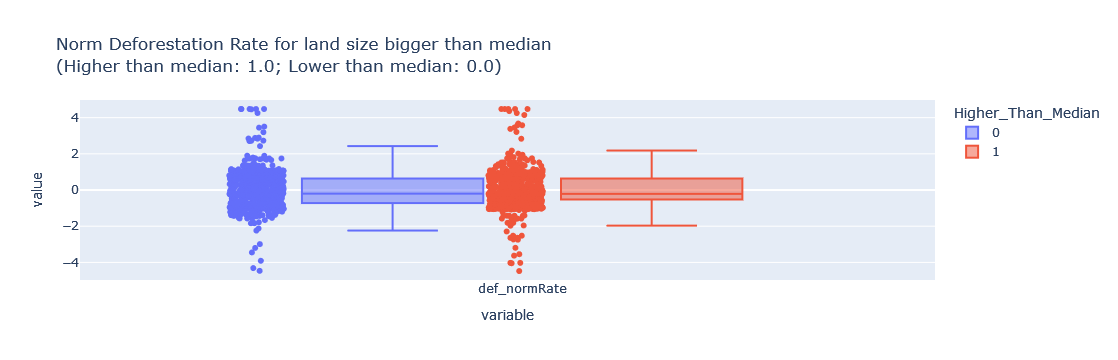

In [1241]:
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["def_normRate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Norm Deforestation Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [1262]:
print(np.percentile(last_df['cornExp_normRate'], 25), last_df['cornExp_normRate'].median(), np.percentile(last_df['cornExp_normRate'], 75))

-0.5738576743399765 -0.09860288726594393 0.4874254320466348


In [1264]:
print(np.percentile(last_df['def_normRate'], 25), last_df['def_normRate'].median(), np.percentile(last_df['def_normRate'], 75))

-0.5828525285361581 -0.21008540770426912 0.6356252518357027


In [1479]:
#reg for non normalized rates
import statsmodels.api as sm
X = sm.add_constant(positive_df[["cornExp_Rate"]])

# Dependent variable (Y)
Y = positive_df["def_Rate"]

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               def_Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                  0.005271
Date:                Wed, 16 Oct 2024   Prob (F-statistic):              0.942
Time:                        14:50:12   Log-Likelihood:                 61.528
No. Observations:                 319   AIC:                            -119.1
Df Residuals:                     317   BIC:                            -111.5
Df Model:                           1                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1021      0.013      8.051      0.000       0.077       0.127
cornExp_Rate  2.646e-05      0.000      0.073      0.942      -0.001       0.001
==============================================================================
Omnibus:                       46.812   Durbin-Watson:                   0.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.551
Skew:                           0.495   Prob(JB):                     5.17e-46
Kurtosis:                       6.835   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

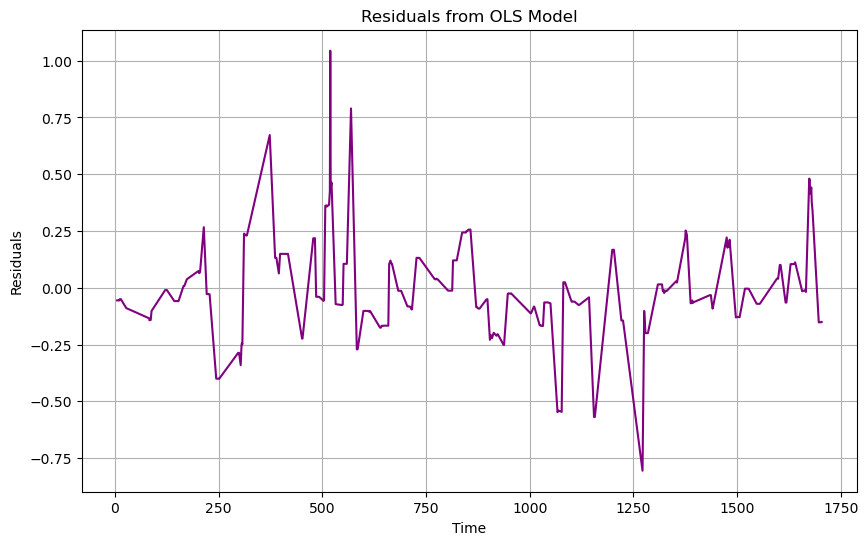

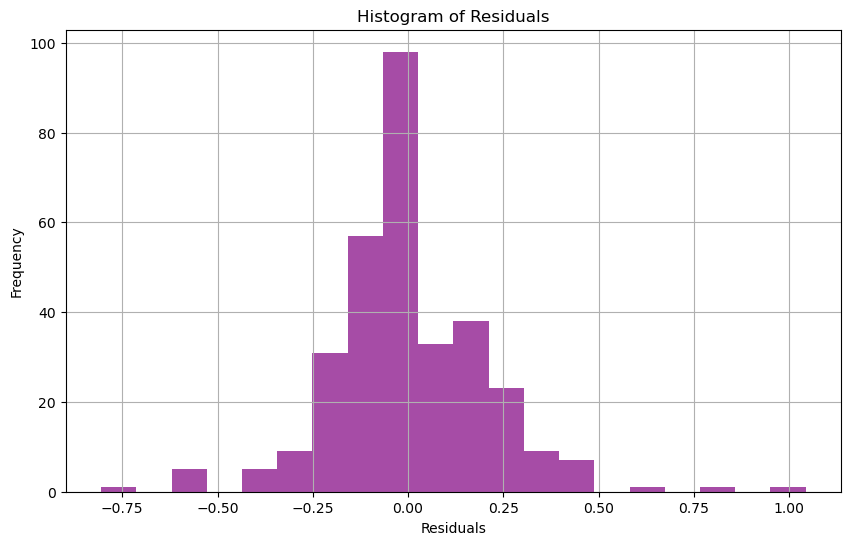

In [1481]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [1483]:
#Reg for normalised rates
import statsmodels.api as sm
X = sm.add_constant(positive_df[["cornExp_normRate"]])

# Dependent variable (Y)
Y = positive_df["def_normRate"]

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           def_normRate   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.914
Date:                Wed, 16 Oct 2024   Prob (F-statistic):             0.0888
Time:                        14:50:15   Log-Likelihood:                -291.13
No. Observations:                 319   AIC:                             586.3
Df Residuals:                     317   BIC:                             593.8
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8597      0.055     15.573      0.000       0.752       0.968
cornExp_normRate    -0.0713      0.042     -1.707      0.088      -0.153       0.011
==============================================================================
Omnibus:                      223.233   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2570.306
Skew:                           2.808   Prob(JB):                         0.00
Kurtosis:                      15.721   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

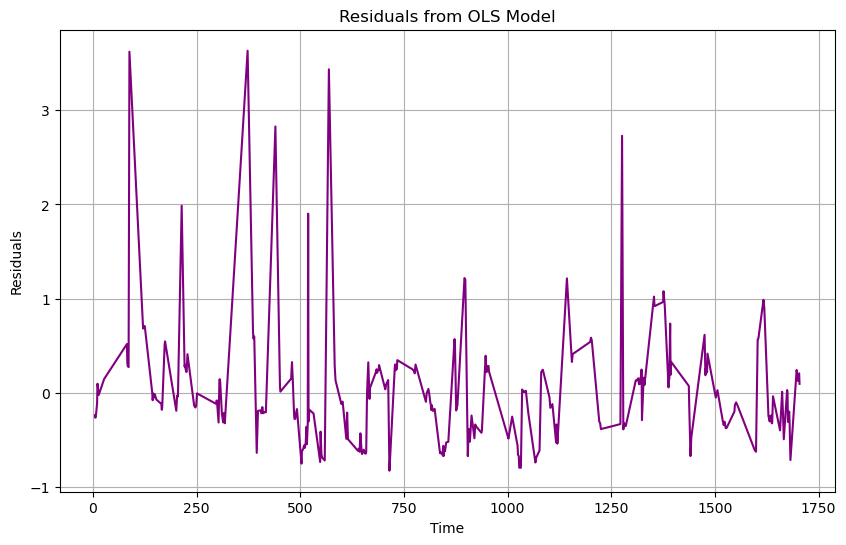

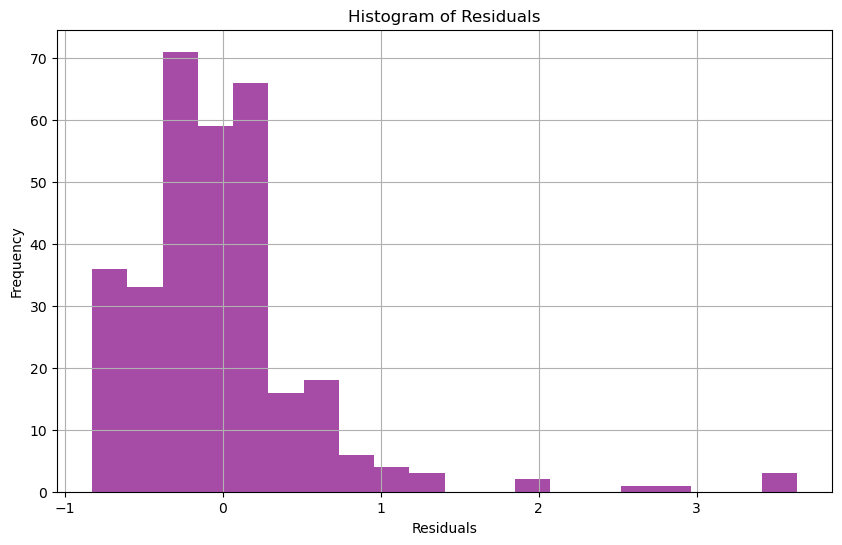

In [1485]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

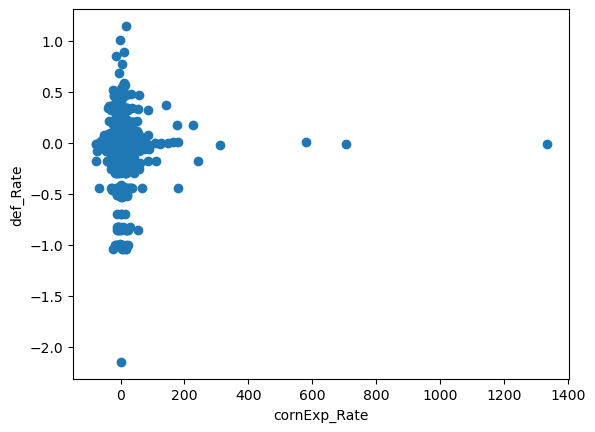

In [1455]:
plt.figure()

plt.scatter(last_df['cornExp_Rate'], last_df['def_Rate'])
plt.xlabel('cornExp_Rate')
#plt.xlim(-50,50)
plt.ylabel('def_Rate')
#plt.ylim(-0.05,0.05)
plt.show()

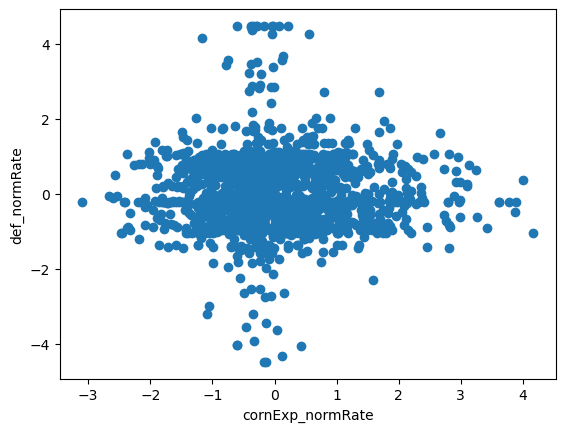

In [1467]:
plt.figure()

plt.scatter(last_df['cornExp_normRate'], last_df['def_normRate'])
plt.xlabel('cornExp_normRate')
plt.ylabel('def_normRate')
plt.show()

# **Summary: What is the effect of agricultural land expansion rate of corn fields on deforestation rate of countries by controlling for land size of countries?**

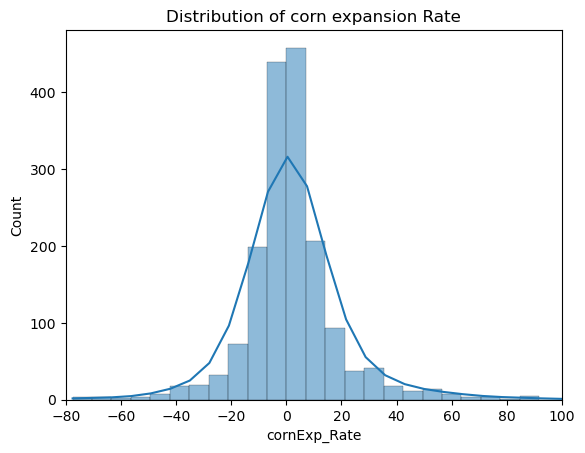

In [1648]:
plt.figure()
sns.histplot(last_df['cornExp_Rate'], bins=200, kde=True, edgecolor='black')
plt.xlim(-80,100)
plt.title('Distribution of corn expansion Rate')
plt.show()

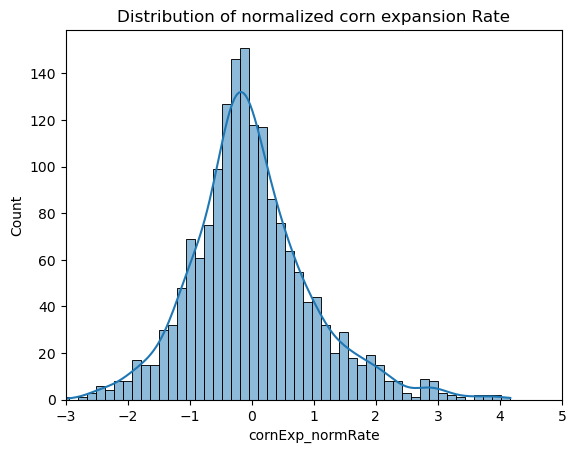

In [1650]:
plt.figure()
sns.histplot(last_df['cornExp_normRate'], bins=50, kde=True, edgecolor='black')
plt.xlim(-3,5)
plt.title('Distribution of normalized corn expansion Rate')
plt.show()

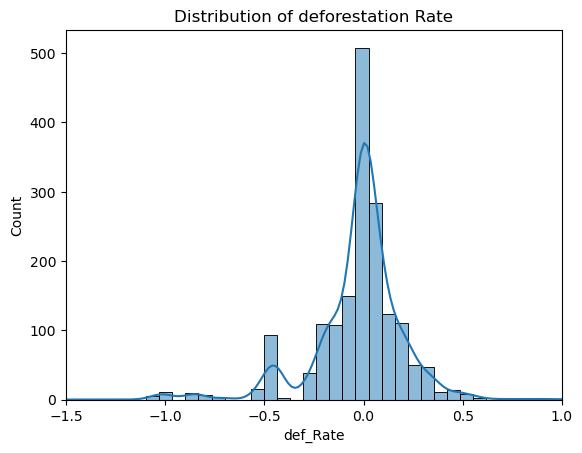

In [1652]:
plt.figure()
sns.histplot(last_df['def_Rate'], bins=50, kde=True, edgecolor='black')
plt.xlim(-1.5,1)
plt.title('Distribution of deforestation Rate')
plt.show()

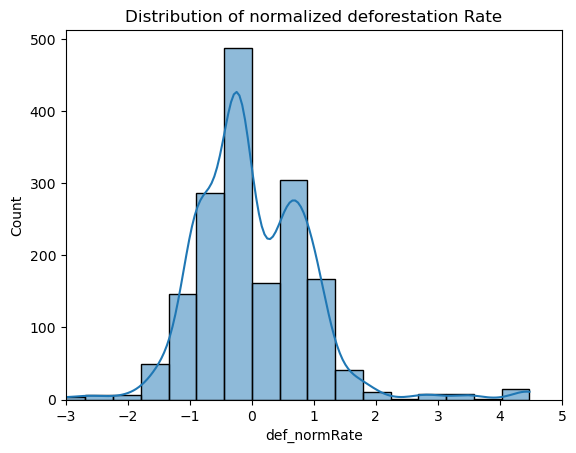

In [1654]:
plt.figure()
sns.histplot(last_df['def_normRate'], bins=20, kde=True, edgecolor='black')
plt.xlim(-3,5)
plt.title('Distribution of normalized deforestation Rate')
plt.show()

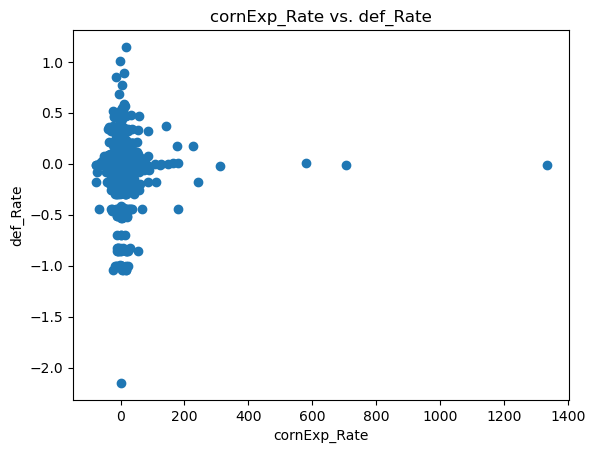

In [1656]:
plt.figure()
plt.scatter(last_df['cornExp_Rate'], last_df['def_Rate'])
plt.xlabel('cornExp_Rate')
plt.ylabel('def_Rate')
plt.title('cornExp_Rate vs. def_Rate')
plt.show()

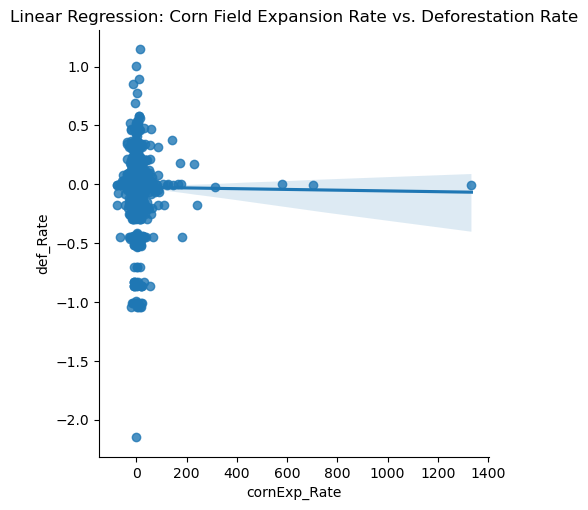

In [1601]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='cornExp_Rate', y='def_Rate', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Corn Field Expansion Rate vs. Deforestation Rate')

# Show the plot
plt.show()

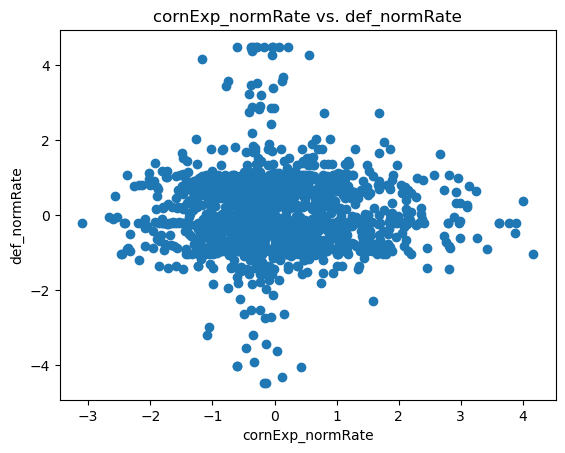

In [1564]:
plt.figure()
plt.scatter(last_df['cornExp_normRate'], last_df['def_normRate'])
plt.xlabel('cornExp_normRate')
plt.ylabel('def_normRate')
plt.title('cornExp_normRate vs. def_normRate')
plt.show()

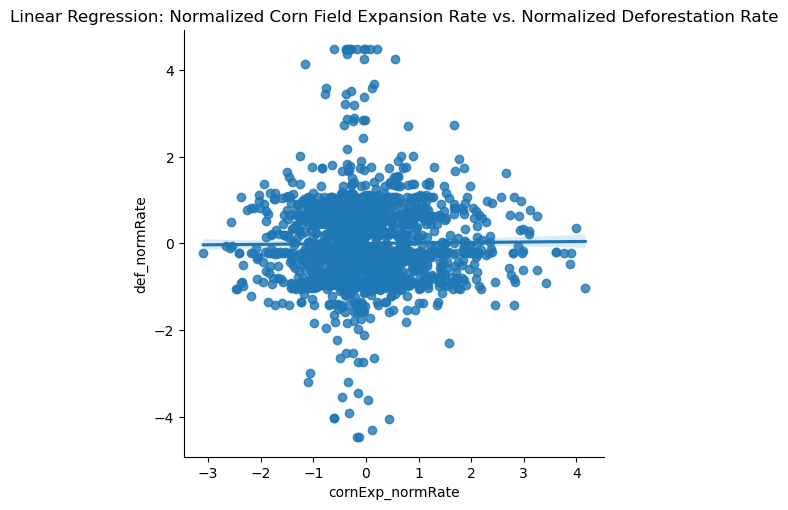

In [1603]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='cornExp_normRate', y='def_normRate', data=last_df)

# Set the title of the plot
plt.title('Linear Regression: Normalized Corn Field Expansion Rate vs. Normalized Deforestation Rate')

# Show the plot
plt.show()

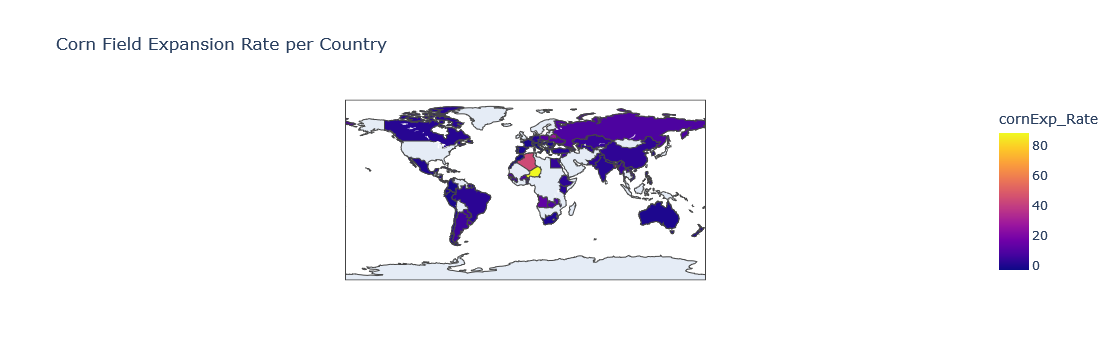

In [1630]:
df_avg_cornExp = pd.DataFrame(last_df.groupby("country")["cornExp_Rate"].mean()).reset_index()
df_avg_cornExp['iso3'] = df_avg_cornExp['country'].apply(get_iso3)
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_cornExpRate, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='cornExp_Rate',  # deforestation rates
                    hover_name='country',
                    title = 'Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

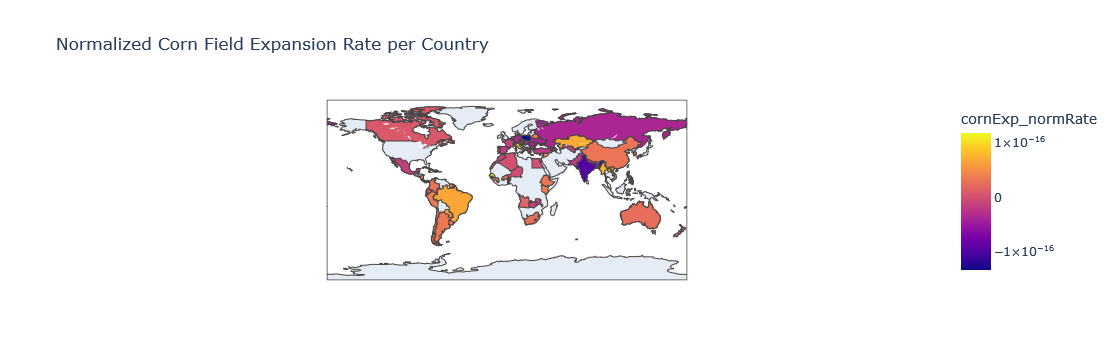

In [1632]:
df_avg_NormcornExp = pd.DataFrame(last_df.groupby("country")["cornExp_normRate"].mean()).reset_index()
df_avg_NormcornExp['iso3'] = df_avg_NormcornExp['country'].apply(get_iso3)
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_NormcornExp, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='cornExp_normRate',  # deforestation rates
                    hover_name='country',
                    title = 'Normalized Corn Field Expansion Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

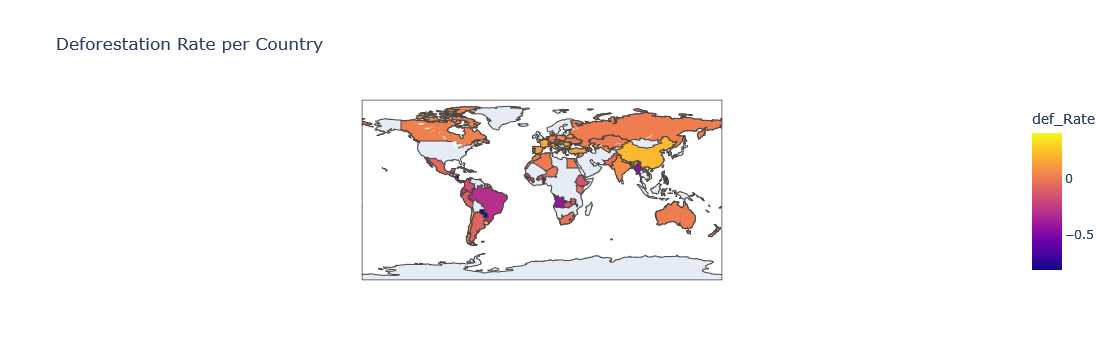

In [1636]:
df_avg_defrate = pd.DataFrame(last_df.groupby("country")["def_Rate"].mean()).reset_index()
df_avg_defrate['iso3'] = df_avg_defrate['country'].apply(get_iso3)
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_defrate, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='def_Rate',  # deforestation rates
                    hover_name='country',
                    title = 'Deforestation Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

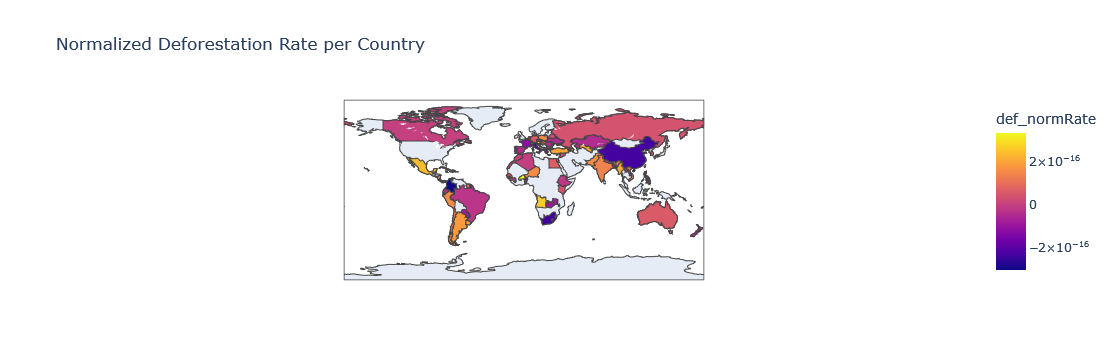

In [1638]:
df_avg_NormDefrate = pd.DataFrame(last_df.groupby("country")["def_normRate"].mean()).reset_index()
df_avg_NormDefrate['iso3'] = df_avg_NormDefrate['country'].apply(get_iso3)
# Now plot the map with Plotly Express
fig = px.choropleth(df_avg_NormDefrate, 
                    locations='iso3',  # ISO-3 country codes
                    locationmode='ISO-3',
                    color='def_normRate',  # deforestation rates
                    hover_name='country',
                    title = 'Normalized Deforestation Rate per Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

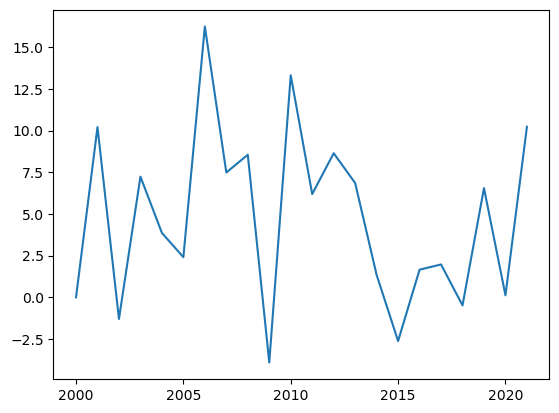

In [1640]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("year")["cornExp_Rate"].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['year'], df_avg_globalyear['cornExp_Rate'])
plt.title('Mean of Corn Expansion Field Rate over the Years')
plt.show()

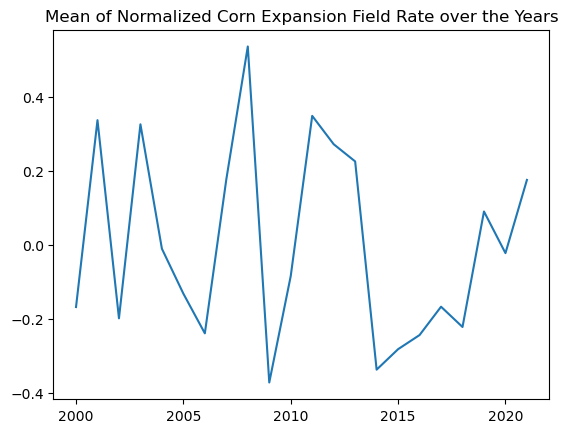

In [1642]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("year")["cornExp_normRate"].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['year'], df_avg_globalyear['cornExp_normRate'])
plt.title('Mean of Normalized Corn Expansion Field Rate over the Years')
plt.show()

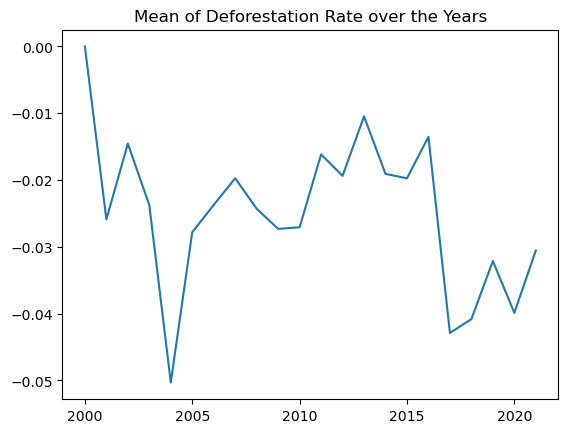

In [1644]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("year")["def_Rate"].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['year'], df_avg_globalyear['def_Rate'])
plt.title('Mean of Deforestation Rate over the Years')
plt.show()

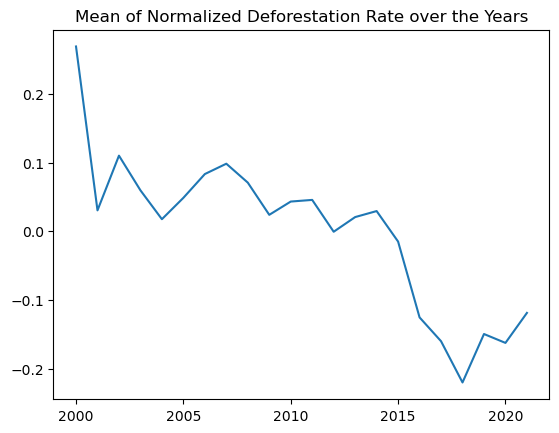

In [1646]:
df_avg_globalyear = pd.DataFrame(last_df.groupby("year")["def_normRate"].mean()).reset_index()
#df_avg_globalyear['iso3'] = df_avg_globalyear['country'].apply(get_iso3)
plt.figure()
plt.plot(df_avg_globalyear['year'], df_avg_globalyear['def_normRate'])
plt.title('Mean of Normalized Deforestation Rate over the Years')
plt.show()

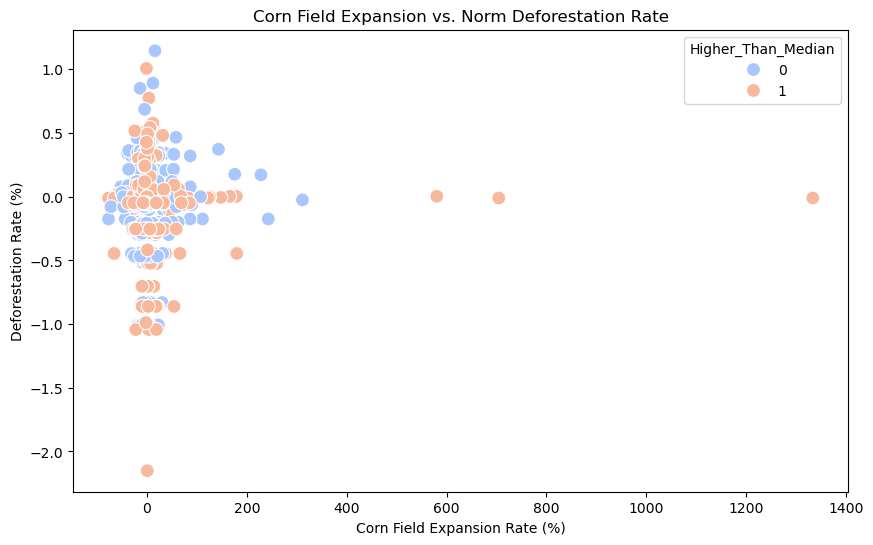

In [1571]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='cornExp_Rate', 
                y='def_Rate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Corn Field Expansion vs. Norm Deforestation Rate')
plt.xlabel('Corn Field Expansion Rate (%)')
plt.ylabel('Deforestation Rate (%)')

# Display the plot
plt.show()

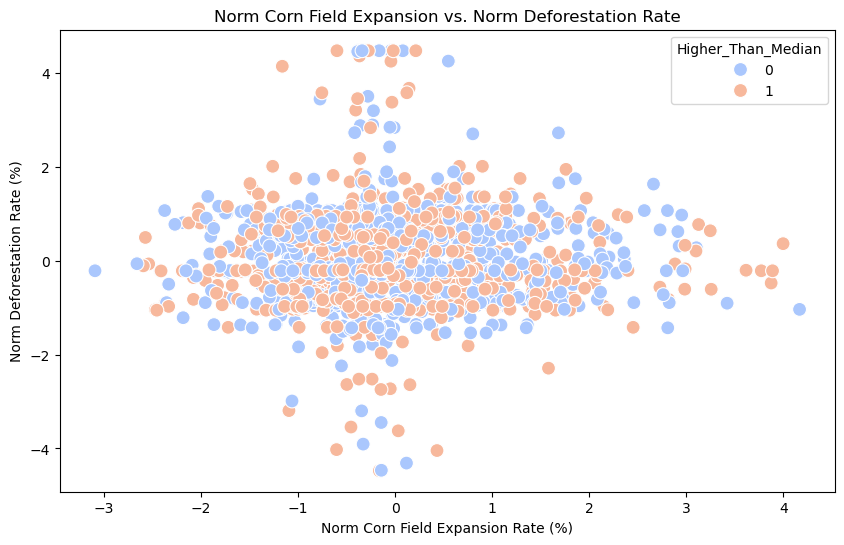

In [1573]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df, 
                x='cornExp_normRate', 
                y='def_normRate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Norm Corn Field Expansion vs. Norm Deforestation Rate')
plt.xlabel('Norm Corn Field Expansion Rate (%)')
plt.ylabel('Norm Deforestation Rate (%)')

# Display the plot
plt.show()

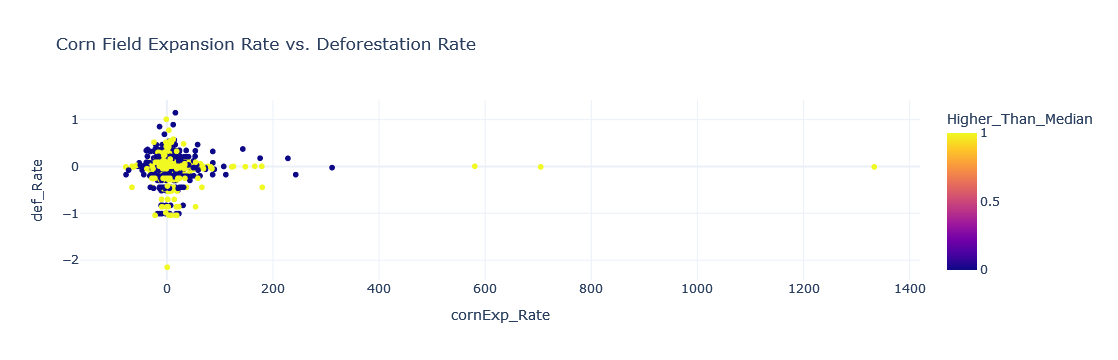

In [1577]:
import plotly.express as px

# Assuming you have your 'positive_df' DataFrame with 'Country', 'Average_Corn_Field_Expansion_Rate(%)',
# 'Average_Deforestation_Rate(%)', and 'Higher_Than_Median'

# Create an interactive scatter plot
fig = px.scatter(
    last_df, 
    x='cornExp_Rate', 
    y='def_Rate', 
    color='Higher_Than_Median', 
    hover_name='country',  # Display country name on hover
    title='Corn Field Expansion Rate vs. Deforestation Rate',
    labels={
        'Norm_Corn_Field_Expansion_Rate': 'Corn Field Expansion Rate (%)',
        'Norm_Deforestation_Rate': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()

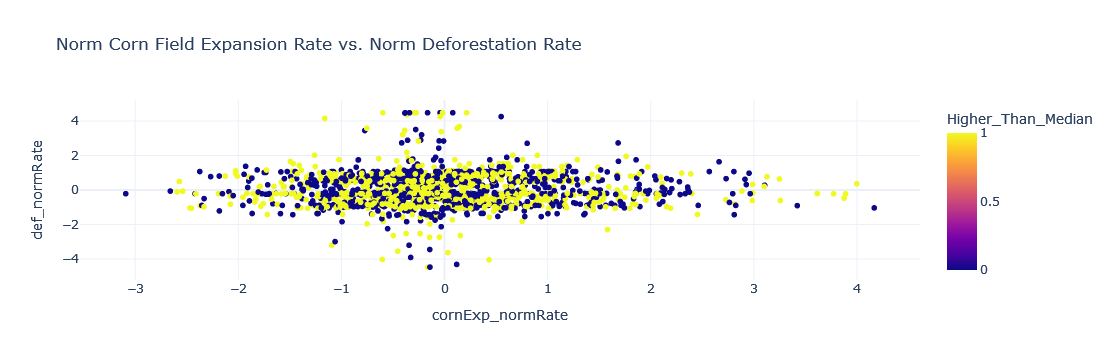

In [1579]:
import plotly.express as px

# Assuming you have your 'positive_df' DataFrame with 'Country', 'Average_Corn_Field_Expansion_Rate(%)',
# 'Average_Deforestation_Rate(%)', and 'Higher_Than_Median'

# Create an interactive scatter plot
fig = px.scatter(
    last_df, 
    x='cornExp_normRate', 
    y='def_normRate', 
    color='Higher_Than_Median', 
    hover_name='country',  # Display country name on hover
    title='Norm Corn Field Expansion Rate vs. Norm Deforestation Rate',
    labels={
        'Norm_Corn_Field_Expansion_Rate': 'Corn Field Expansion Rate (%)',
        'Norm_Deforestation_Rate': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()

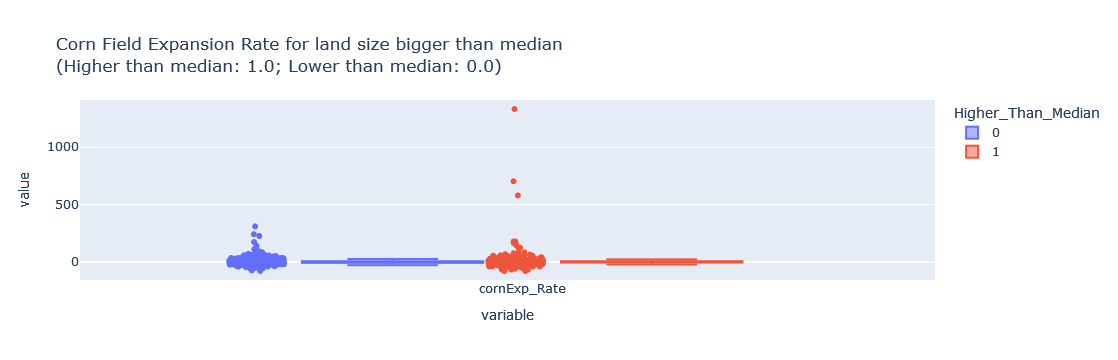

In [1581]:
import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["cornExp_Rate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Corn Field Expansion Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

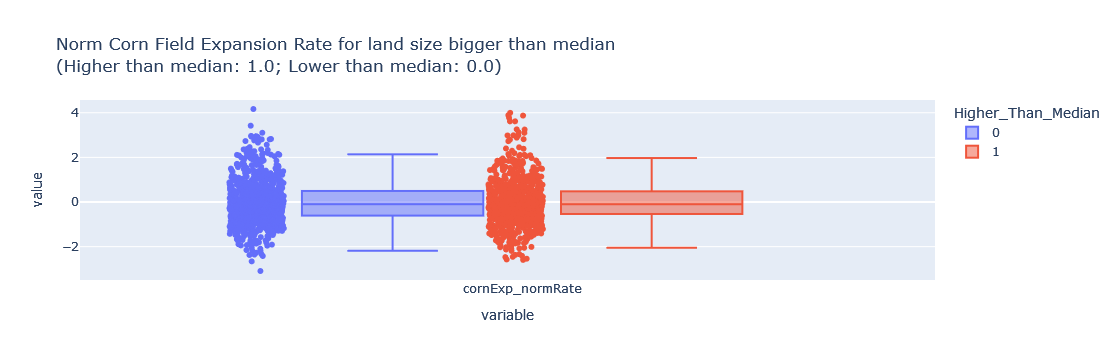

In [1583]:
import plotly.express as px
fig_box = px.box(last_df,                                           # Specify data frame
                 y=["cornExp_normRate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Norm Corn Field Expansion Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

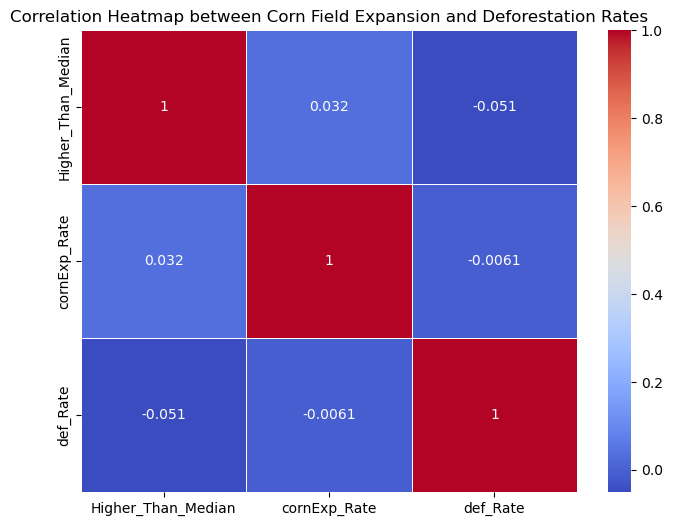

In [1585]:
df_features = last_df[['Higher_Than_Median','cornExp_Rate', 'def_Rate']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap between Corn Field Expansion and Deforestation Rates')
plt.show()

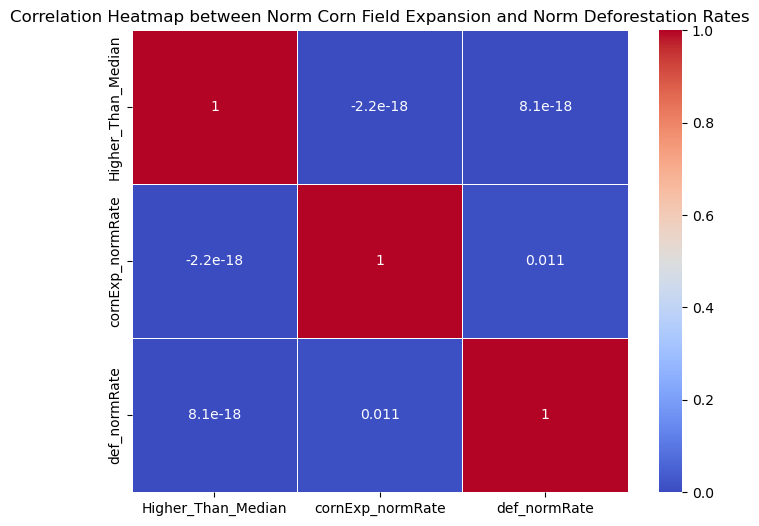

In [1589]:
df_features = last_df[['Higher_Than_Median','cornExp_normRate', 'def_normRate']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap between Norm Corn Field Expansion and Norm Deforestation Rates')
plt.show()

## **For non normalized rates**

In [1676]:
#reg for non normalized rates
import statsmodels.api as sm
X = sm.add_constant(last_df[["cornExp_Rate"]])

# Dependent variable (Y)
Y = last_df["def_Rate"]

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               def_Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2097
Date:                Wed, 16 Oct 2024   Prob (F-statistic):              0.647
Time:                        16:31:00   Log-Likelihood:                 45.742
No. Observations:                1716   AIC:                            -87.48
Df Residuals:                    1714   BIC:                            -76.59
Df Model:                           1                                         
Covariance Type:                  HC3                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0248      0.006     -4.344      0.000      -0.036      -0.014
cornExp_Rate  -3.18e-05   6.95e-05     -0.458      0.647      -0.000       0.000
==============================================================================
Omnibus:                      604.354   Durbin-Watson:                   0.268
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4921.880
Skew:                          -1.420   Prob(JB):                         0.00
Kurtosis:                      10.795   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

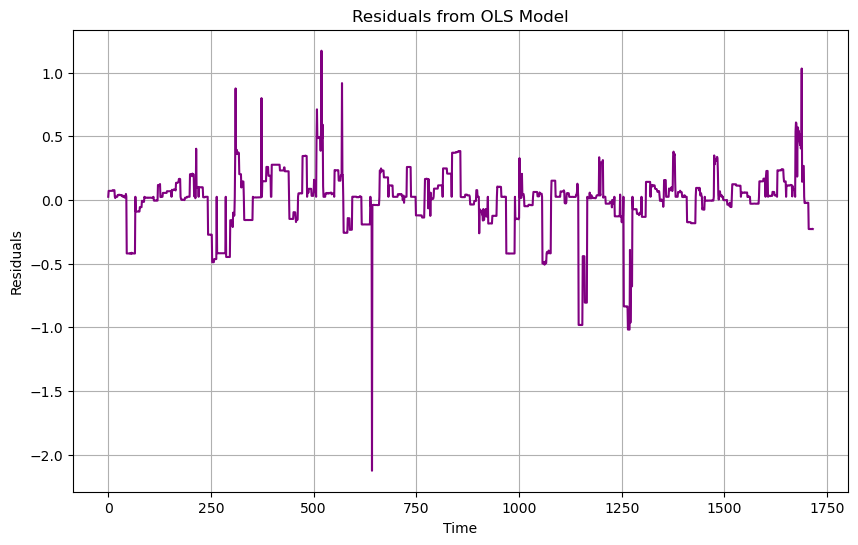

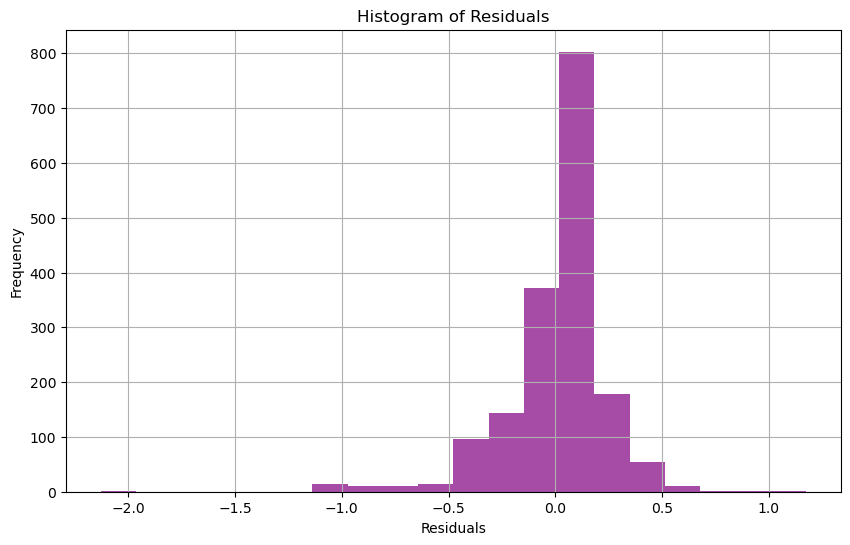

In [1678]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **For normalized rates**

In [1681]:
#Reg for normalised rates
import statsmodels.api as sm
X = sm.add_constant(last_df[["cornExp_normRate"]])

# Dependent variable (Y)
Y = last_df["def_normRate"]

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           def_normRate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3098
Date:                Wed, 16 Oct 2024   Prob (F-statistic):              0.578
Time:                        16:31:06   Log-Likelihood:                -2394.9
No. Observations:                1716   AIC:                             4794.
Df Residuals:                    1714   BIC:                             4805.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.908e-17      0.024   8.08e-16      1.000      -0.046       0.046
cornExp_normRate     0.0108      0.019      0.557      0.578      -0.027       0.049
==============================================================================
Omnibus:                      288.997   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1717.406
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       7.727   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

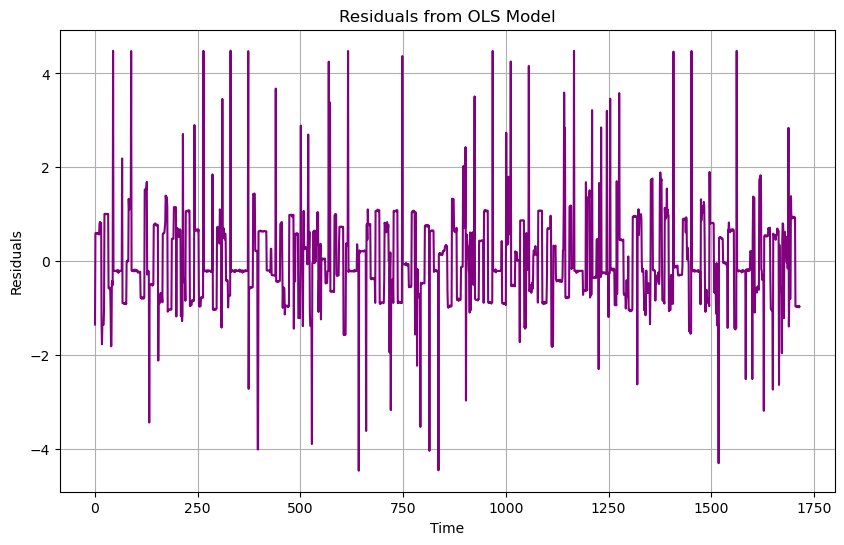

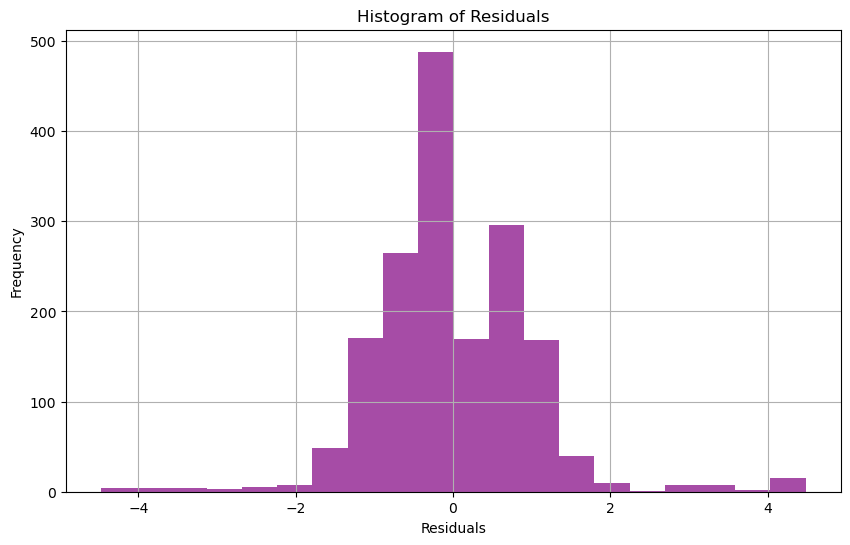

In [1683]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **For normalized rates - H = 0**

In [1700]:
#Reg for normalised rates
#import statsmodels.api as sm
X = sm.add_constant(last_df[last_df['Higher_Than_Median'] == 0]['cornExp_normRate'])

# Dependent variable (Y)
Y = last_df[last_df['Higher_Than_Median'] == 0]['cornExp_normRate']

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cornExp_normRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.829e+33
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:06:50   Log-Likelihood:                 29760.
No. Observations:                 858   AIC:                        -5.952e+04
Df Residuals:                     856   BIC:                        -5.951e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3.469e-18   7.18e-18      0.483      0.629   -1.06e-17    1.75e-17
cornExp_normRate     1.0000   1.44e-17   6.95e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       51.175   Durbin-Watson:                   2.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.631
Skew:                          -0.439   Prob(JB):                     1.54e-19
Kurtosis:                       4.286   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

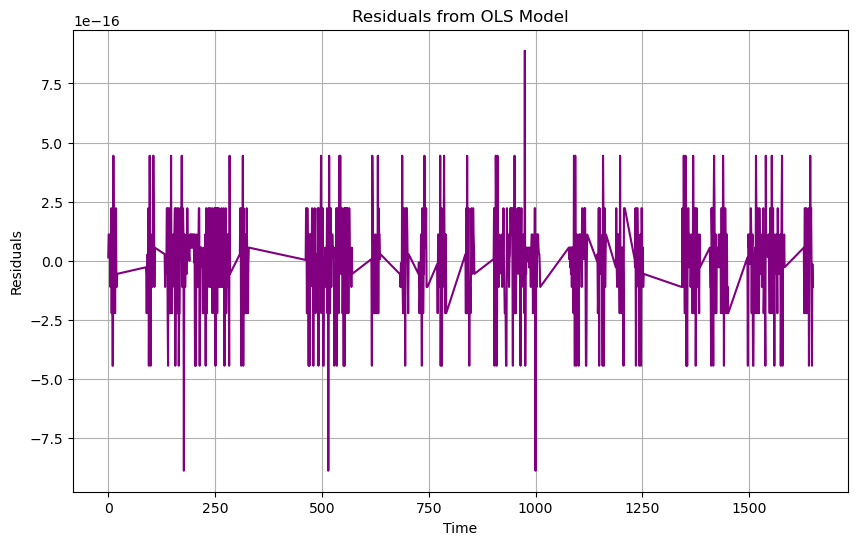

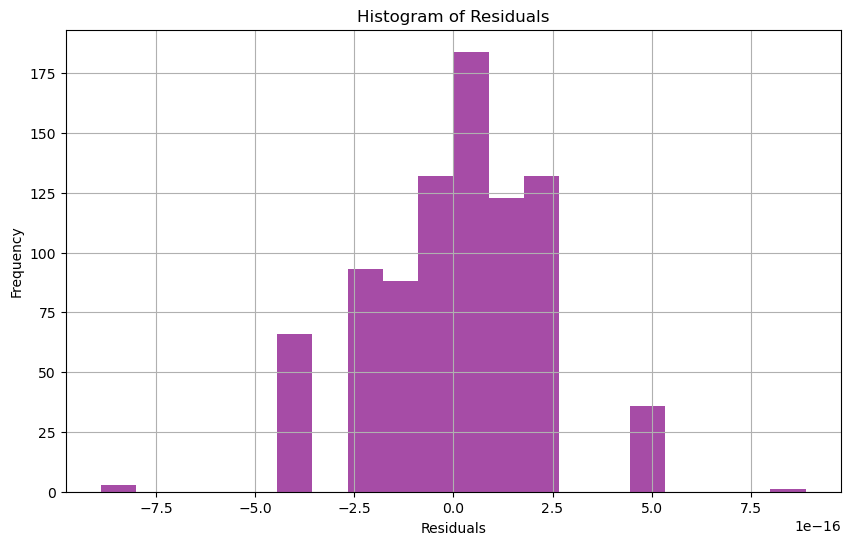

In [1702]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [1704]:
#Reg for normalised rates
#import statsmodels.api as sm
X = sm.add_constant(last_df[last_df['Higher_Than_Median'] == 1]['cornExp_normRate'])

# Dependent variable (Y)
Y = last_df[last_df['Higher_Than_Median'] == 1]['cornExp_normRate']

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit(cov_type='HC3')

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       cornExp_normRate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.765e+38
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:06:57   Log-Likelihood:                 32131.
No. Observations:                 858   AIC:                        -6.426e+04
Df Residuals:                     856   BIC:                        -6.425e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.082e-17   4.51e-19    -46.205      0.000   -2.17e-17   -1.99e-17
cornExp_normRate     1.0000   7.53e-20   1.33e+19      0.000       1.000       1.000
==============================================================================
Omnibus:                      150.402   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.006
Skew:                           1.136   Prob(JB):                     1.66e-43
Kurtosis:                       2.411   Cond. No.                         1.02
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

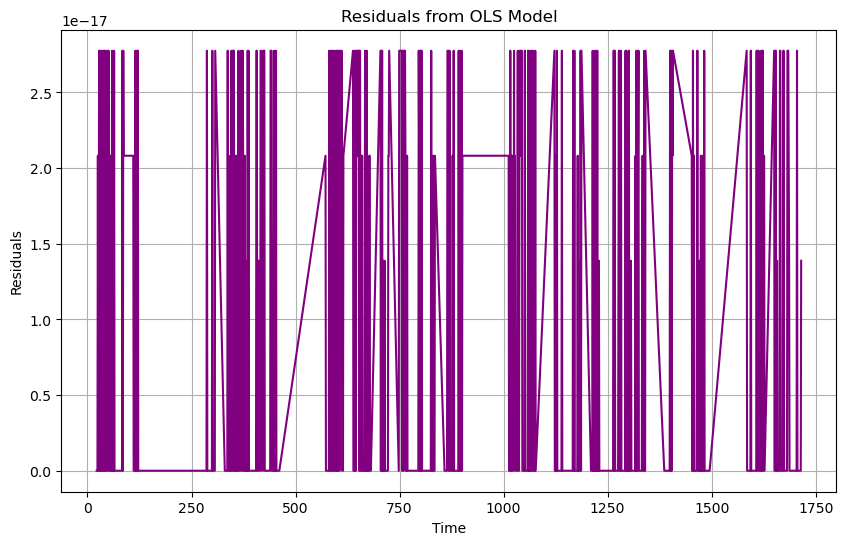

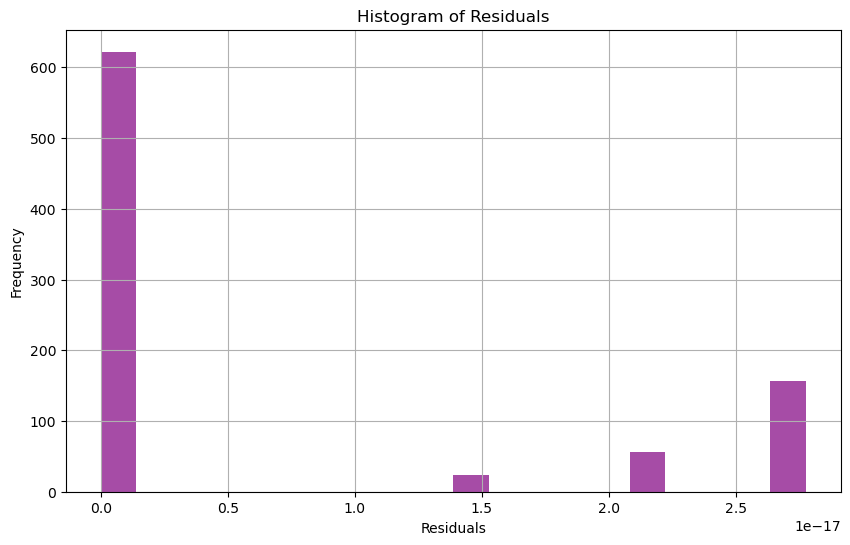

In [1706]:
residuals = ols_model.resid
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from OLS Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Autre : Tests d'autocorrélation**

In [1316]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

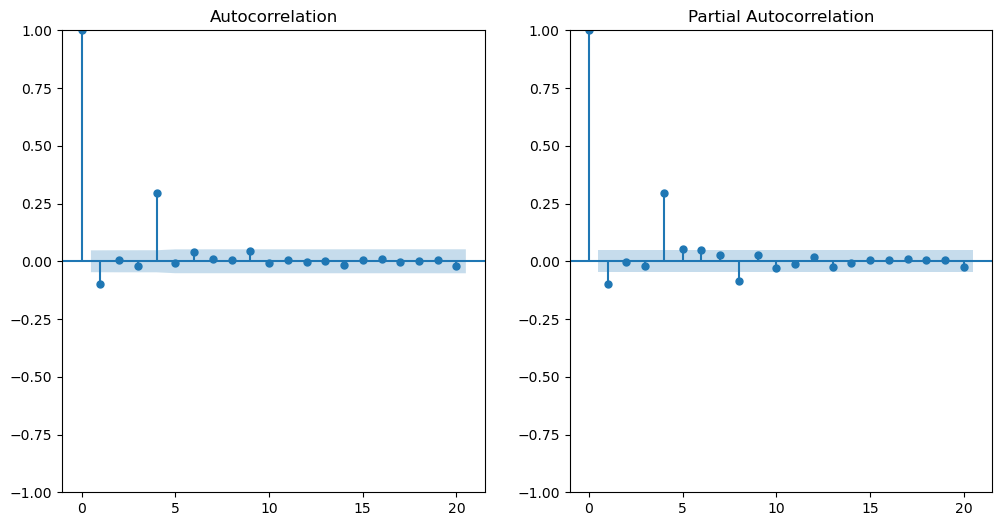

In [1318]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(last_df['cornExp_Rate'], lags=20, ax=plt.gca())  # ACF plot
plt.subplot(122)
plot_pacf(last_df['cornExp_Rate'], lags=20, ax=plt.gca())  # PACF plot
plt.show()

In [1348]:
aic_values = []
bic_values = []
max_lag = 20  # Maximum number of lags to test

for lag in range(1, max_lag + 1):
    model = sm.tsa.AutoReg(last_df['cornExp_normRate'], lag).fit()
    aic_values.append(model.aic)
    bic_values.append(model.bic)

# Step 3: Choose the lag with the lowest AIC or BIC
optimal_lag_aic = aic_values.index(min(aic_values)) + 1
optimal_lag_bic = bic_values.index(min(bic_values)) + 1

print(f"Optimal lag based on AIC: {optimal_lag_aic}")
print(f"Optimal lag based on BIC: {optimal_lag_bic}")

Optimal lag based on AIC: 20
Optimal lag based on BIC: 16


In [1357]:
print(sm.tsa.AutoReg(last_df['cornExp_Rate'], 20).fit().aic,
sm.tsa.AutoReg(last_df['cornExp_Rate'], 16).fit().bic)

17603.501891575943 17732.245852133958


In [1419]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming 'time_series_data' is your time series
# Fit an ARIMA model (or AR, ARMA based on your needs)
model = sm.tsa.ARIMA(last_df['cornExp_Rate'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Get the residuals from the fitted model
residuals = fitted_model.resid

# Apply the Ljung-Box test on the residuals
ljung_box_results = acorr_ljungbox(residuals, lags=[4], return_df=True)

# Print the results
print(ljung_box_results)
print(fitted_model.summary())

   lb_stat  lb_pvalue
4  2.42987   0.657236
                               SARIMAX Results                                
Dep. Variable:           cornExp_Rate   No. Observations:                 1716
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -8887.898
Date:                Wed, 16 Oct 2024   AIC                          17787.796
Time:                        14:15:58   BIC                          17820.483
Sample:                             0   HQIC                         17799.891
                               - 1716                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7524      2.500      1.901      0.057      -0.148       9.653
ar.L1         -0.0911      0.011     -8.647      0.000      -0.112      -0.070
ar.L2   

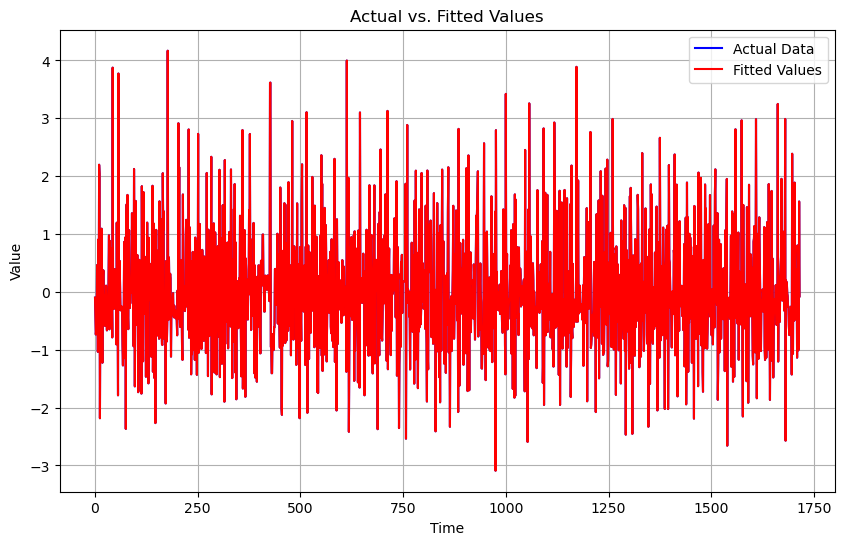

In [1421]:
model = sm.tsa.ARIMA(last_df['cornExp_normRate'], order=(4, 0, 0))  # p, d, q are your chosen ARIMA orders
fitted_model = model.fit()

# Forecast or predict the in-sample values (fitted values)
fitted_values = fitted_model.fittedvalues

# Plot the actual data and the fitted values
plt.figure(figsize=(10, 6))
plt.plot(last_df['cornExp_normRate'], label="Actual Data", color="blue")
plt.plot(last_df['cornExp_normRate'], label="Fitted Values", color="red")
plt.title("Actual vs. Fitted Values")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

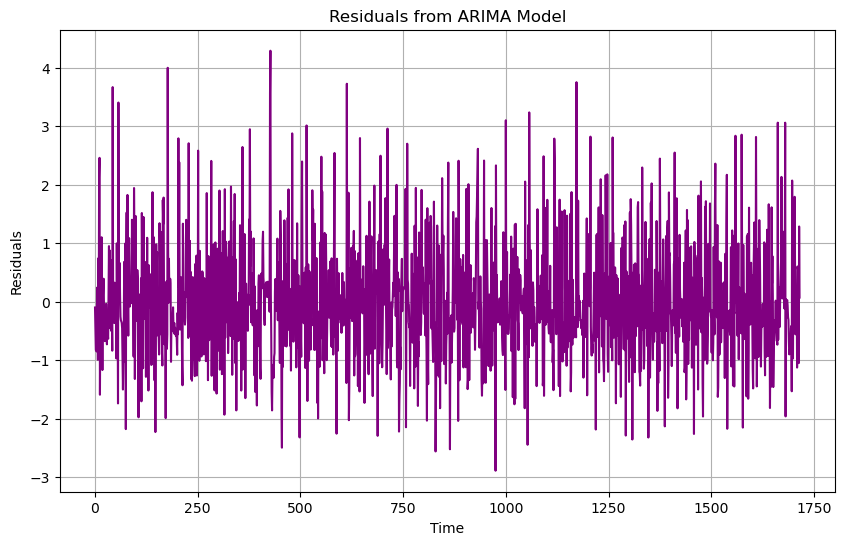

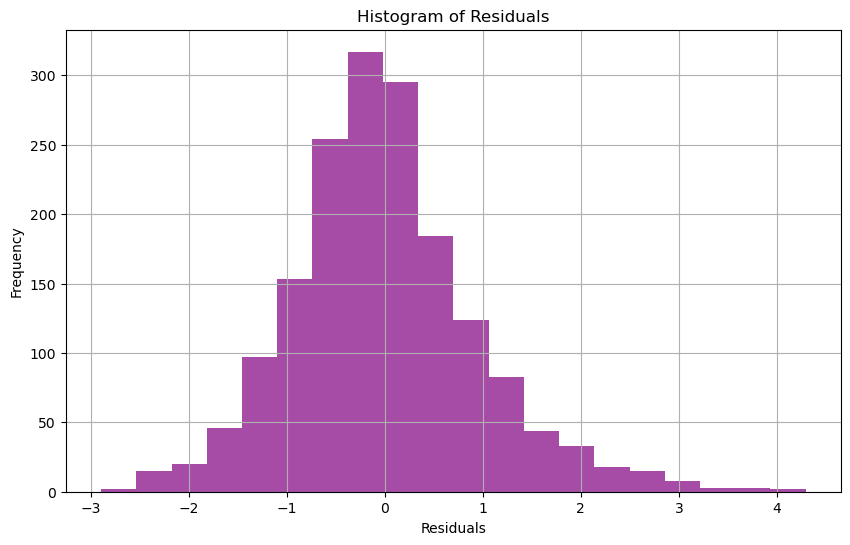

In [1423]:
residuals = fitted_model.resid

# Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label="Residuals", color="purple")
plt.title("Residuals from ARIMA Model")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Plot the histogram of residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color="purple", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

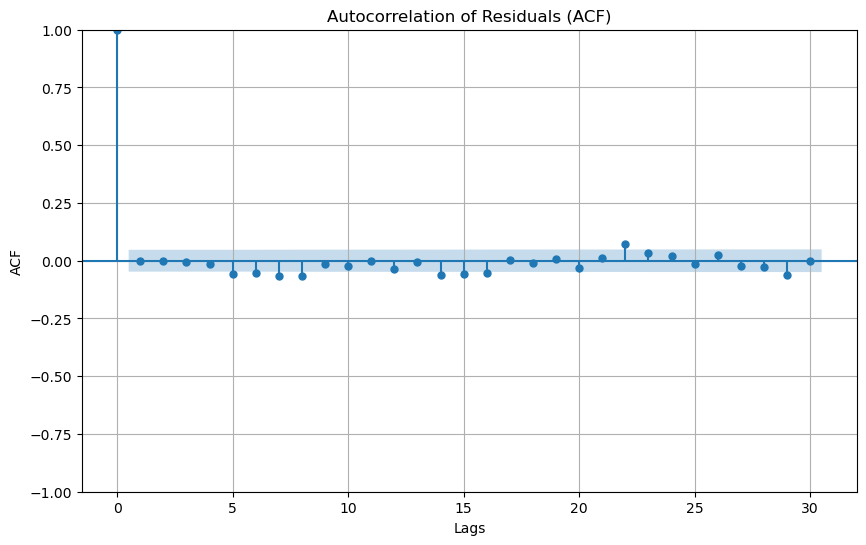

      lb_stat  lb_pvalue
10  26.819797   0.002781


In [1425]:
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)

# Plot ACF of residuals
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title("Autocorrelation of Residuals (ACF)")
plt.xlabel("Lags")
plt.ylabel("ACF")
plt.grid(True)
plt.show()

# Print Ljung-Box test results
print(ljung_box_results)

# Analysis for the data not averaged

In [1248]:
plt.figure(figsize=(10,6))
sns.histplot(df_final['Log_Def_Rate'], bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Deforestation Rate')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Deforestation rate for countries')

# Show the plot
plt.show()

KeyError: 'Log_Def_Rate'

<Figure size 1000x600 with 0 Axes>

In [143]:
merged_df['Log_Def_Rate'].skew()

-2.3640332418382584

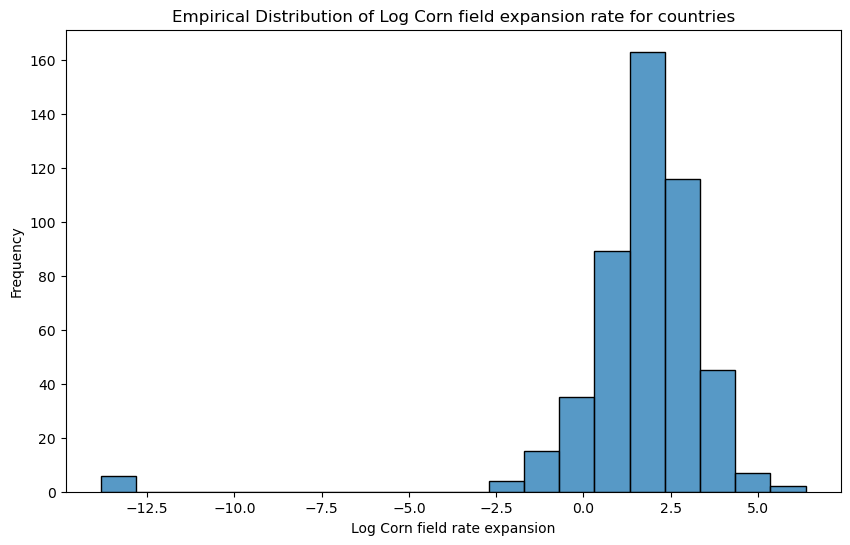

In [144]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Log_Corn_Rate'], bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Log Corn field rate expansion')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Log Corn field expansion rate for countries')

# Show the plot
plt.show()

In [145]:
merged_df['Log_Corn_Rate'].skew()

-4.488252911444163

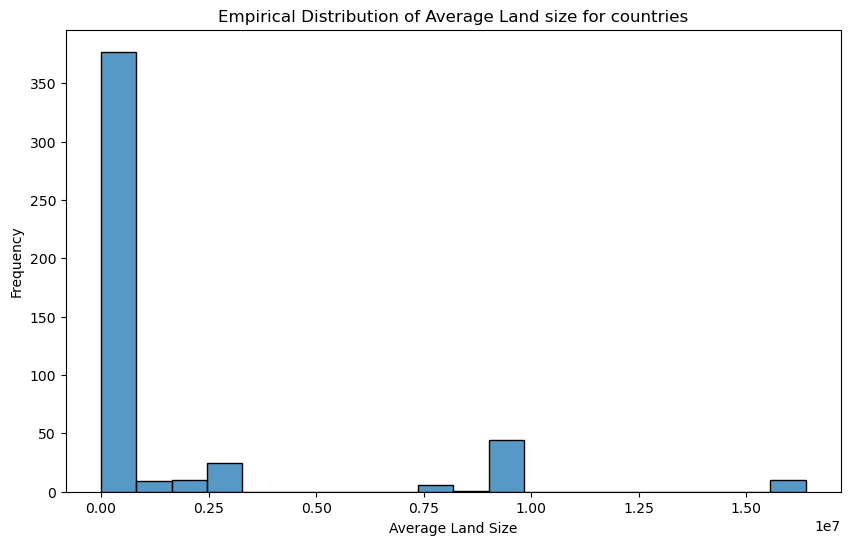

In [146]:
plt.figure(figsize=(10,6))
sns.histplot(merged_df['Average_Land_Size'], bins=20, kde=False, edgecolor='black')

# Add labels and title
plt.xlabel('Average Land Size')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Average Land size for countries')

# Show the plot
plt.show()

In [147]:
merged_df['Average_Land_Size'].skew()

2.533863822470756

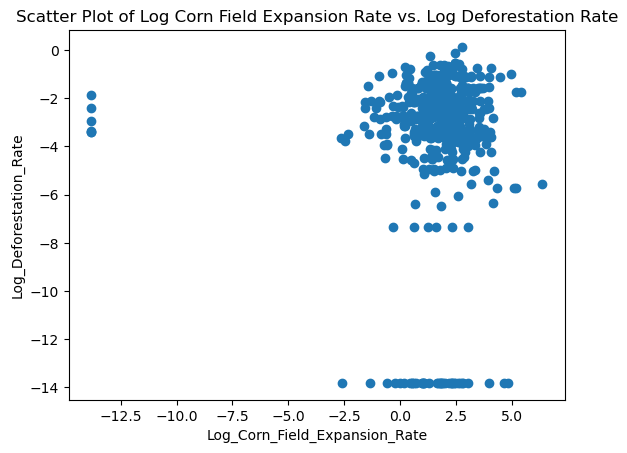

In [148]:
# Create a scatter plot
plt.scatter(merged_df['Log_Corn_Rate'], merged_df['Log_Def_Rate'])

# Set the labels for the axes
plt.xlabel('Log_Corn_Field_Expansion_Rate')
plt.ylabel('Log_Deforestation_Rate')

# Set the title of the plot
plt.title('Scatter Plot of Log Corn Field Expansion Rate vs. Log Deforestation Rate')

# Calculate the linear regression
x = merged_df['Log_Corn_Rate']
y = merged_df['Log_Def_Rate']

# Show the plot
plt.show()

/Users/zeliadecaillet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



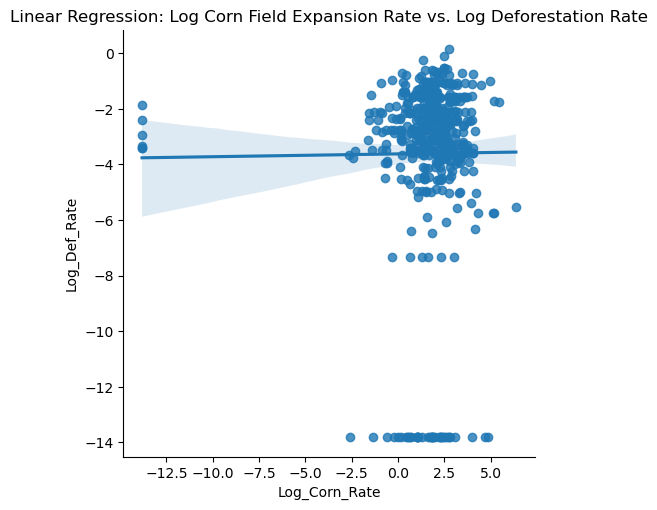

In [149]:
# Create a scatter plot with a linear regression line
sns.lmplot(x='Log_Corn_Rate', y='Log_Def_Rate', data=merged_df)

# Set the title of the plot
plt.title('Linear Regression: Log Corn Field Expansion Rate vs. Log Deforestation Rate')

# Show the plot
plt.show()

In [150]:
# Finding the median of Average_Land_Size
median_land_size = last_df['Average_Land_Size'].median()

# Creating a dummy variable for whether the land size is higher than the median
merged_df['Higher_Than_Median'] = merged_df['Average_Land_Size'].apply(lambda val: 1 if (val>median_land_size) else 0)

merged_df.head()

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_18239/2166518175.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name Country Code  Year  Average_Deforestation_Rate  Def_Rate  \
79      Austria          AUT  2001                   46.542002  0.030368   
80      Belgium          BEL  2001                   22.112186  0.074538   
81  Switzerland          CHE  2001                   30.363420  0.098449   
82        Chile          CHL  2001                   21.395017  0.122147   
83        China          CHN  2001                   19.104968  0.251495   

    Log_Def_Rate iso3  Average_Corn_Field_Expansion_Rate  Corn_Rate  \
79     -3.494320  AUT                             194904   3.781642   
80     -2.596438  BEL                              40600  13.407821   
81     -2.318202  CHE                              24329  10.556212   
82     -2.102524  CHL                              82550  19.162757   
83     -1.380327  CHN                           24310506   5.303066   

    Log_Corn_Rate  Average_Land_Size  Higher_Than_Median  
79       1.330159       8.252000e+04                   0  
80       2.595838       3.028000e+04                   0  
81       2.356715       3.951413e+04                   0  
82       2.952969       7.435320e+05                   1  
83       1.668285       9.388212e+06                   1

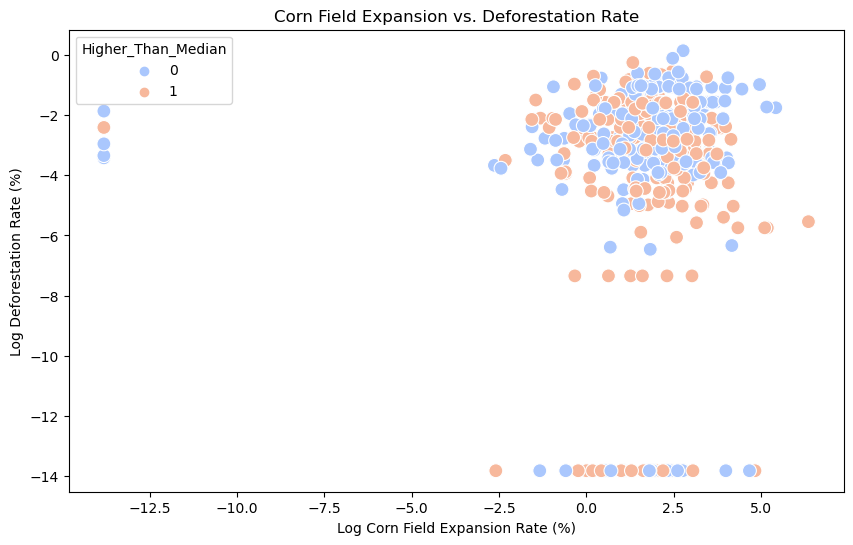

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, 
                x='Log_Corn_Rate', 
                y='Log_Def_Rate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Corn Field Expansion vs. Deforestation Rate')
plt.xlabel('Log Corn Field Expansion Rate (%)')
plt.ylabel('Log Deforestation Rate (%)')

# Display the plot
plt.show()

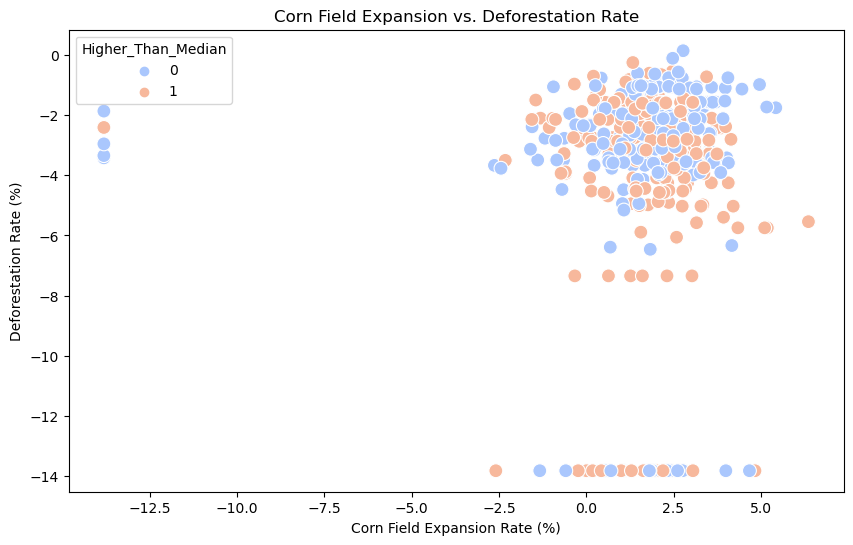

In [152]:
#Filtered data (only positive values)
#positive_df = merged_df[(merged_df["Log_Def_Rate"]>0) &(merged_df["Log_Corn_Rate"]>0)  ]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, 
                x='Log_Corn_Rate', 
                y='Log_Def_Rate', 
                hue='Higher_Than_Median', 
                palette='coolwarm', 
                s=100)

# Adding labels and title
plt.title('Corn Field Expansion vs. Deforestation Rate')
plt.xlabel('Corn Field Expansion Rate (%)')
plt.ylabel('Deforestation Rate (%)')

# Display the plot
plt.show()

In [153]:
import plotly.express as px

# Assuming you have your 'positive_df' DataFrame with 'Country', 'Average_Corn_Field_Expansion_Rate(%)',
# 'Average_Deforestation_Rate(%)', and 'Higher_Than_Median'

# Create an interactive scatter plot
fig = px.scatter(
    merged_df, 
    x='Log_Corn_Rate', 
    y='Log_Def_Rate', 
    color='Higher_Than_Median', 
    hover_name='Country Name',  # Display country name on hover
    title='Corn Field Expansion vs. Deforestation Rate',
    labels={
        'Log_Corn_Field_Expansion_Rate(%)': 'Corn Field Expansion Rate (%)',
        'Log_Deforestation_Rate(%)': 'Deforestation Rate (%)'
    },
    size_max=100,
    template="plotly_white"
)

# Show the interactive plot
fig.show()

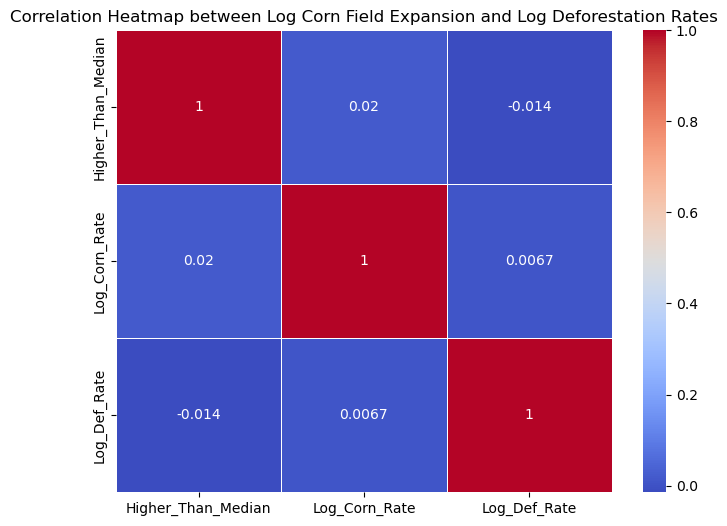

In [154]:
df_features = merged_df[['Higher_Than_Median','Log_Corn_Rate', 'Log_Def_Rate']]

# Calculating the correlation matrix
correlation_matrix = df_features.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the plot
plt.title('Correlation Heatmap between Log Corn Field Expansion and Log Deforestation Rates')
plt.show()

In [155]:
import plotly.express as px
fig_box = px.box(merged_df,                                           # Specify data frame
                 y=["Log_Corn_Rate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Log Corn Field Expansion Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [156]:
fig_box = px.box(merged_df,                                           # Specify data frame
                 y=["Log_Def_Rate"],                       # Select posrecip and negrecip variables
                 points="all",                                     # Include all observations as data points
                 color = 'Higher_Than_Median',                                # Color (and group by) column "Cluster"
                 labels = {"Cluster": "Altruism"},                 # Rename "Cluster" as "Altruism" in our legend
                 title = """Average Deforestation Rate for land size bigger than median 
                 <br>(Higher than median: 1.0; Lower than median: 0.0)""")       # Always add a title!
fig_box.update_layout(autosize=False, width = 800)                # Specify width (by default, full notebook cell)
fig_box

In [157]:
import statsmodels.api as sm
X = sm.add_constant(merged_df[["Log_Corn_Rate"]])

# Dependent variable (Y)
Y = merged_df["Log_Def_Rate"]

# Fit the OLS regression model
ols_model = sm.OLS(Y, X).fit()

# Display the OLS regression results
ols_results_extended = ols_model.summary()
ols_results_extended

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Log_Def_Rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02186
Date:                Tue, 15 Oct 2024   Prob (F-statistic):              0.883
Time:                        22:01:48   Log-Likelihood:                -1256.2
No. Observations:                 482   AIC:                             2516.
Df Residuals:                     480   BIC:                             2525.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.6213      0.188    -19.283      0.000      -3.990      -3.252
Log_Corn_Rate     0.0102      0.069      0.148      0.883      -0.125       0.146
==============================================================================
Omnibus:                      237.129   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              895.323
Skew:                          -2.357   Prob(JB):                    3.83e-195
Kurtosis:                       7.729   Cond. No.                         3.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""